<a href="https://colab.research.google.com/github/paolonervi/ILE_RPG/blob/main/portafogli_volatilita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn
import datetime
import random

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
<ipython-input-2-d168930f9365>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Analisi su indici

In [ ]:
indici=[["S&P500","^GSPC"],["FTSE UK","^FTSE"],["Russell 2000 USA small caps","^RUT"],
     ["STOXX 50 Europa","^STOXX50E"],["Nikkei Giaoppone","^N225"],["Hang Seng HK","^HSI"],
     ["SSE composite Cina","000001.SS"],["Bond US 1 anno","^IRX"],["Bond US 10 anni","^TNX"]]
bond_tickers=["^IRX","^TNX"]
indici.append(["Bitcoin","BTC-EUR"])

nomi=list(np.array(indici)[:,0])
tickers=list(np.array(indici)[:,1])

In [ ]:
dati=yf.download(tickers)["Adj Close"]

[*********************100%%**********************]  10 of 10 completed


In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
dati=dati.reindex(tickers, axis=1)

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25636 entries, 1927-12-30 to 2024-02-24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ^GSPC      24152 non-null  float64
 1   ^FTSE      10141 non-null  float64
 2   ^RUT       9186 non-null   float64
 3   ^STOXX50E  4240 non-null   float64
 4   ^N225      14542 non-null  float64
 5   ^HSI       9171 non-null   float64
 6   000001.SS  6454 non-null   float64
 7   ^IRX       16048 non-null  float64
 8   ^TNX       15549 non-null  float64
 9   BTC-EUR    3448 non-null   float64
dtypes: float64(10)
memory usage: 2.2 MB


In [ ]:
dati

Ticker            ^GSPC        ^FTSE         ^RUT    ^STOXX50E         ^N225  \
Date                                                                           
1927-12-30    17.660000          NaN          NaN          NaN           NaN   
1928-01-03    17.760000          NaN          NaN          NaN           NaN   
1928-01-04    17.719999          NaN          NaN          NaN           NaN   
1928-01-05    17.549999          NaN          NaN          NaN           NaN   
1928-01-06    17.660000          NaN          NaN          NaN           NaN   
...                 ...          ...          ...          ...           ...   
2024-02-20  4975.509766  7719.200195  2004.140015  4760.279785  38363.609375   
2024-02-21  4981.799805  7662.500000  1994.739990  4775.310059  38262.160156   
2024-02-22  5087.029785  7684.500000  2013.839966  4855.359863  39098.679688   
2024-02-23  5088.799805  7706.299805  2016.689941  4872.569824           NaN   
2024-02-24          NaN          NaN          NaN          NaN           NaN   

Ticker              ^HSI    000001.SS   ^IRX   ^TNX       BTC-EUR  
Date                                                               
1927-12-30           NaN          NaN    NaN    NaN           NaN  
1928-01-03           NaN          NaN    NaN    NaN           NaN  
1928-01-04           NaN          NaN    NaN    NaN           NaN  
1928-01-05           NaN          NaN    NaN    NaN           NaN  
1928-01-06           NaN          NaN    NaN    NaN           NaN  
...                  ...          ...    ...    ...           ...  
2024-02-20  16247.509766  2922.729980  5.213  4.275  48051.406250  
2024-02-21  16503.099609  2950.956055  5.235  4.325  48367.378906  
2024-02-22  16742.949219  2988.357910  5.233  4.327  47908.992188  
2024-02-23  16725.859375  3004.881104  5.240  4.260  47392.250000  
2024-02-24           NaN          NaN    NaN    NaN  47524.523438  

[25636 rows x 10 columns]

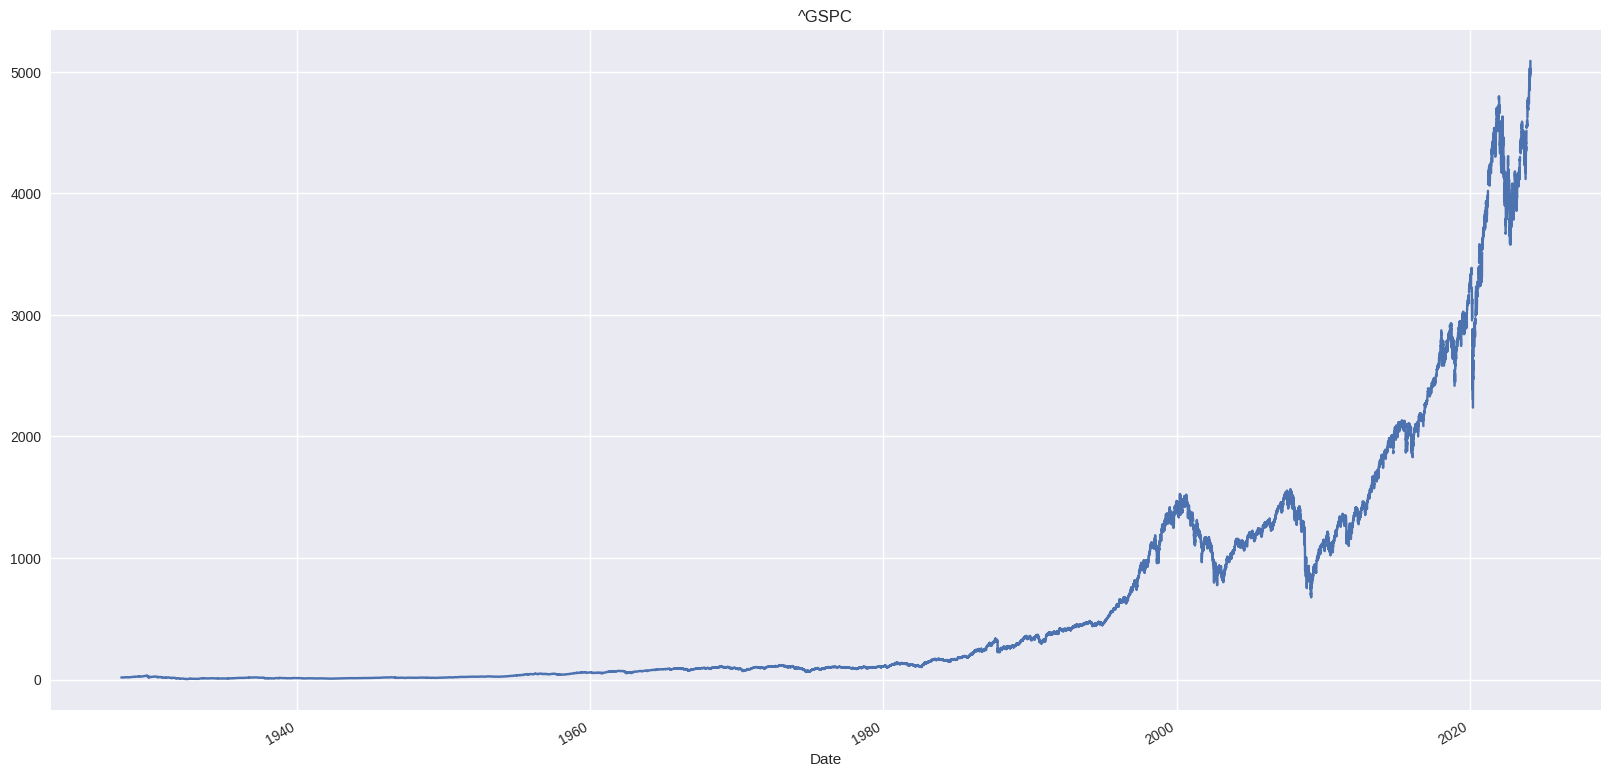

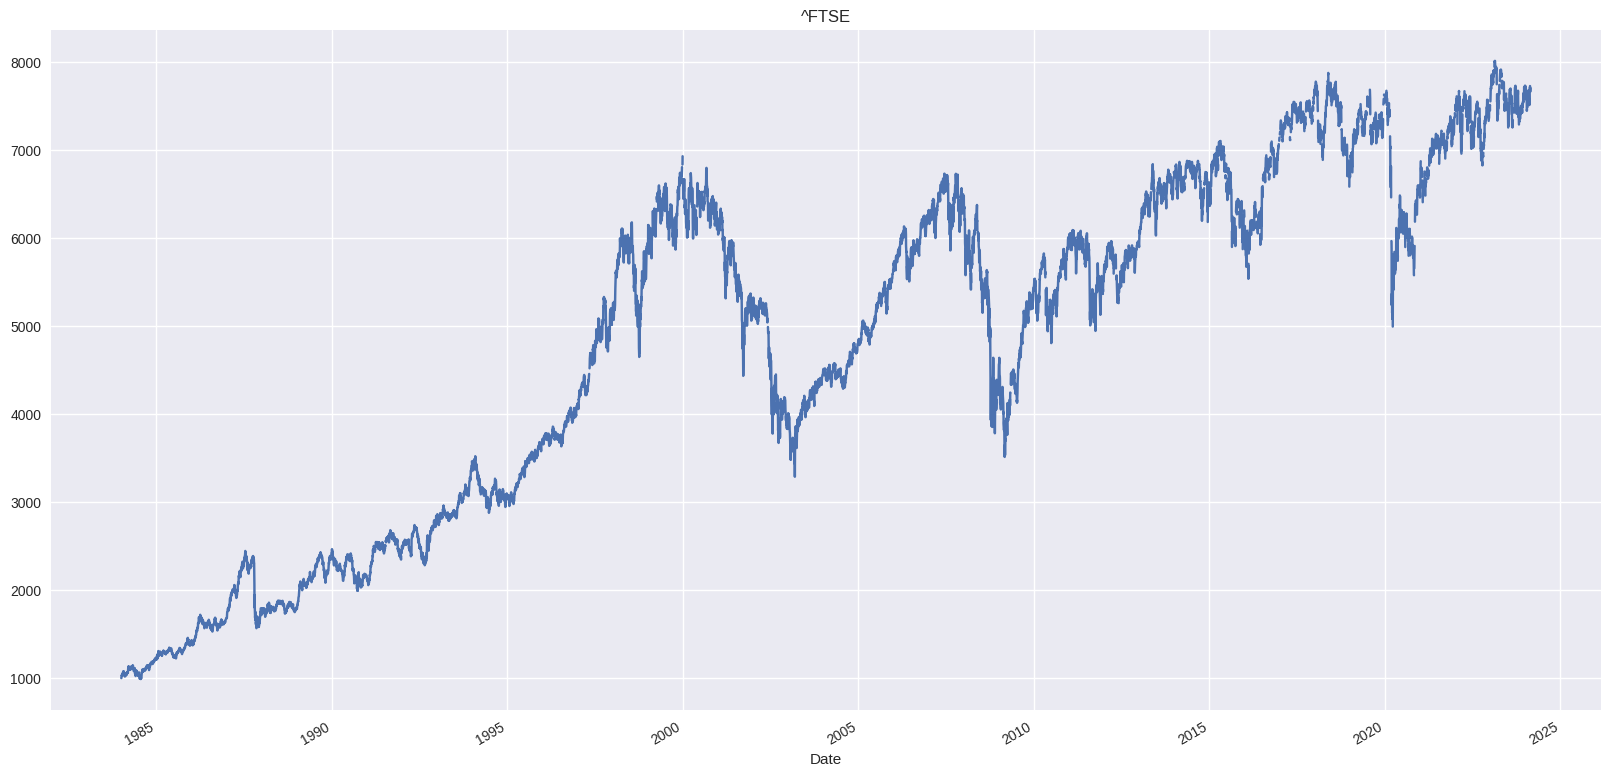

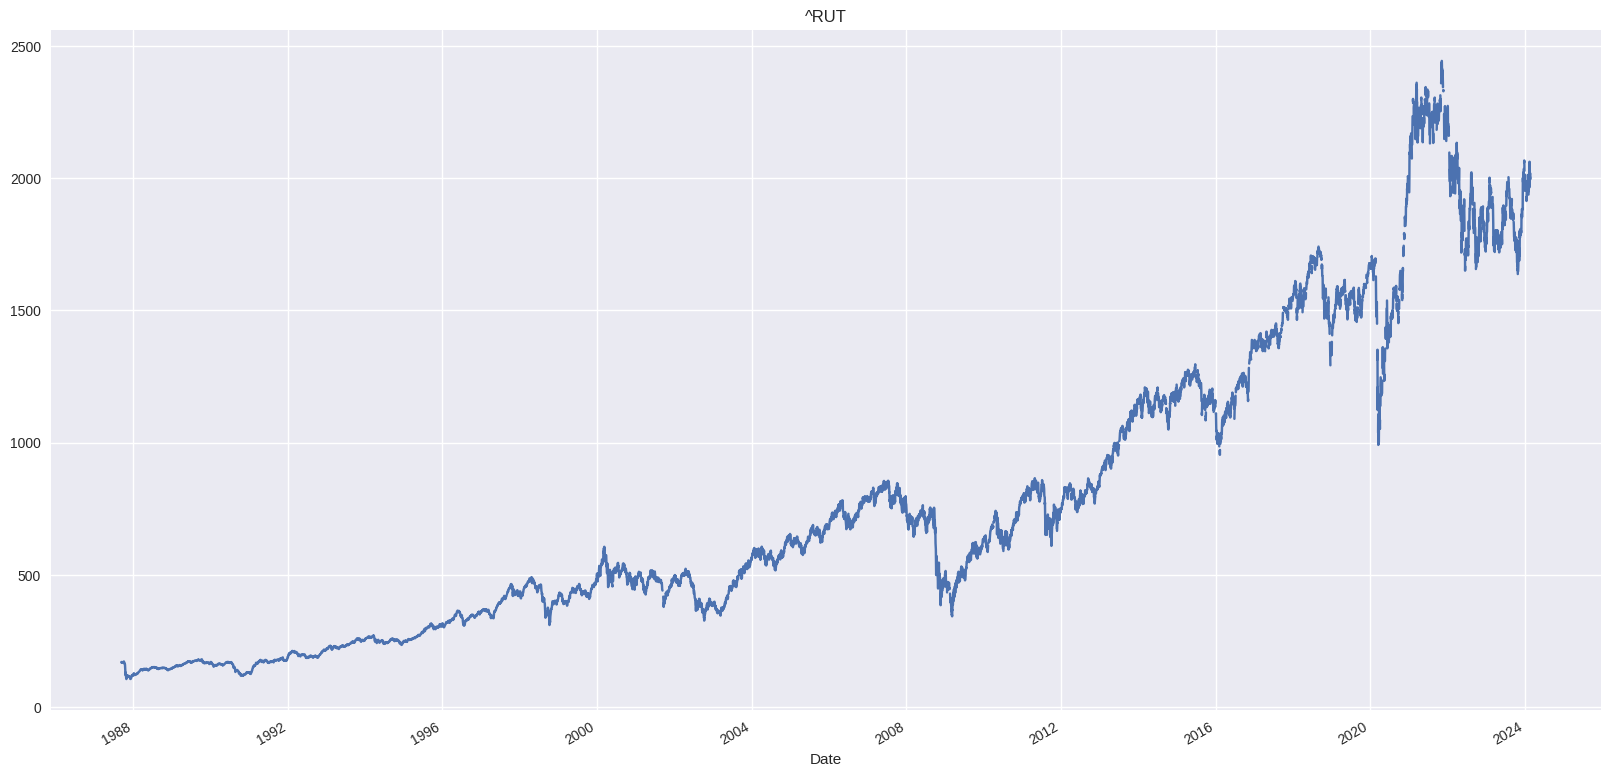

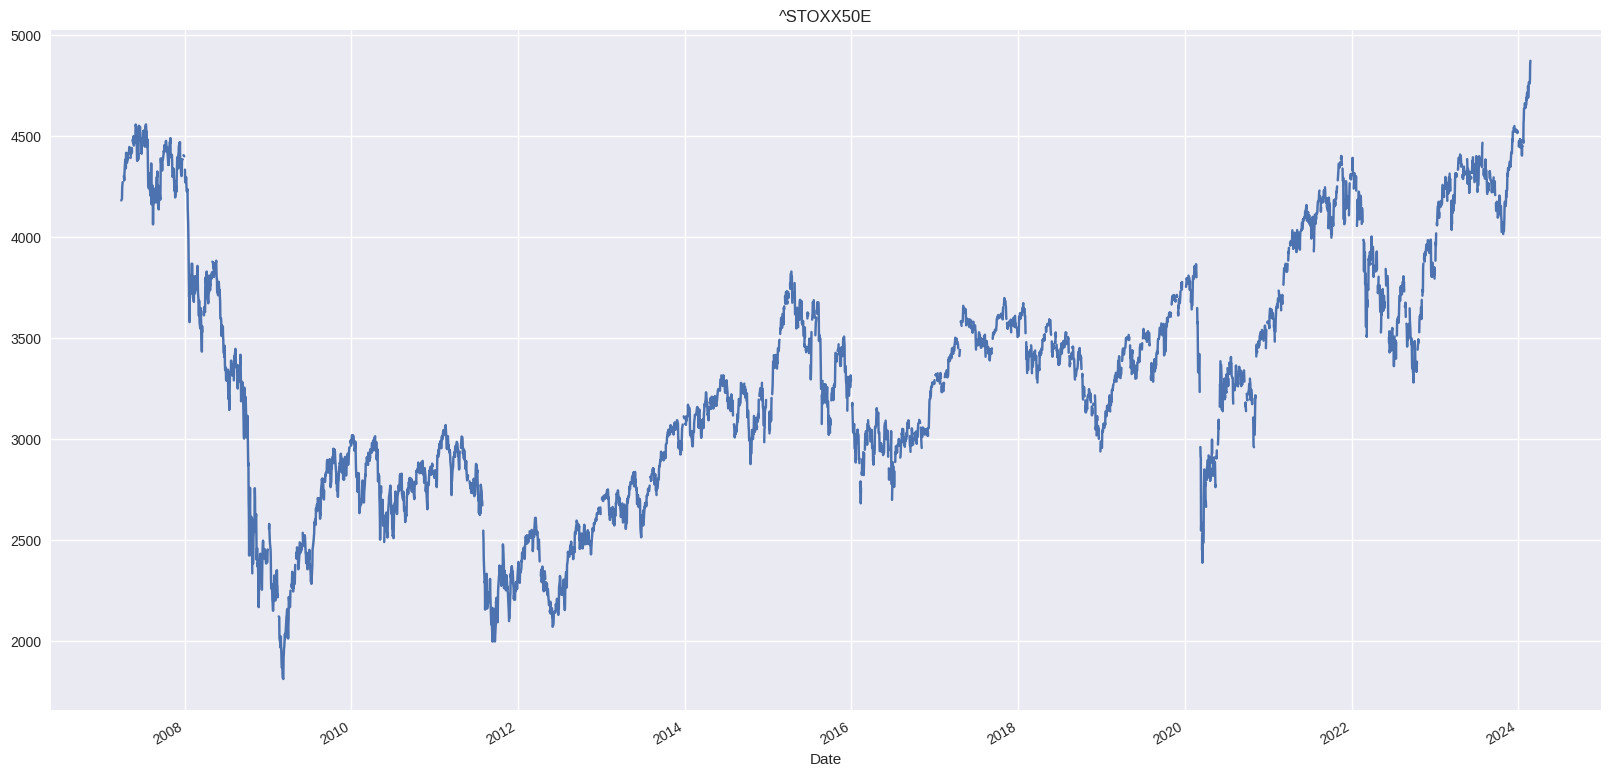

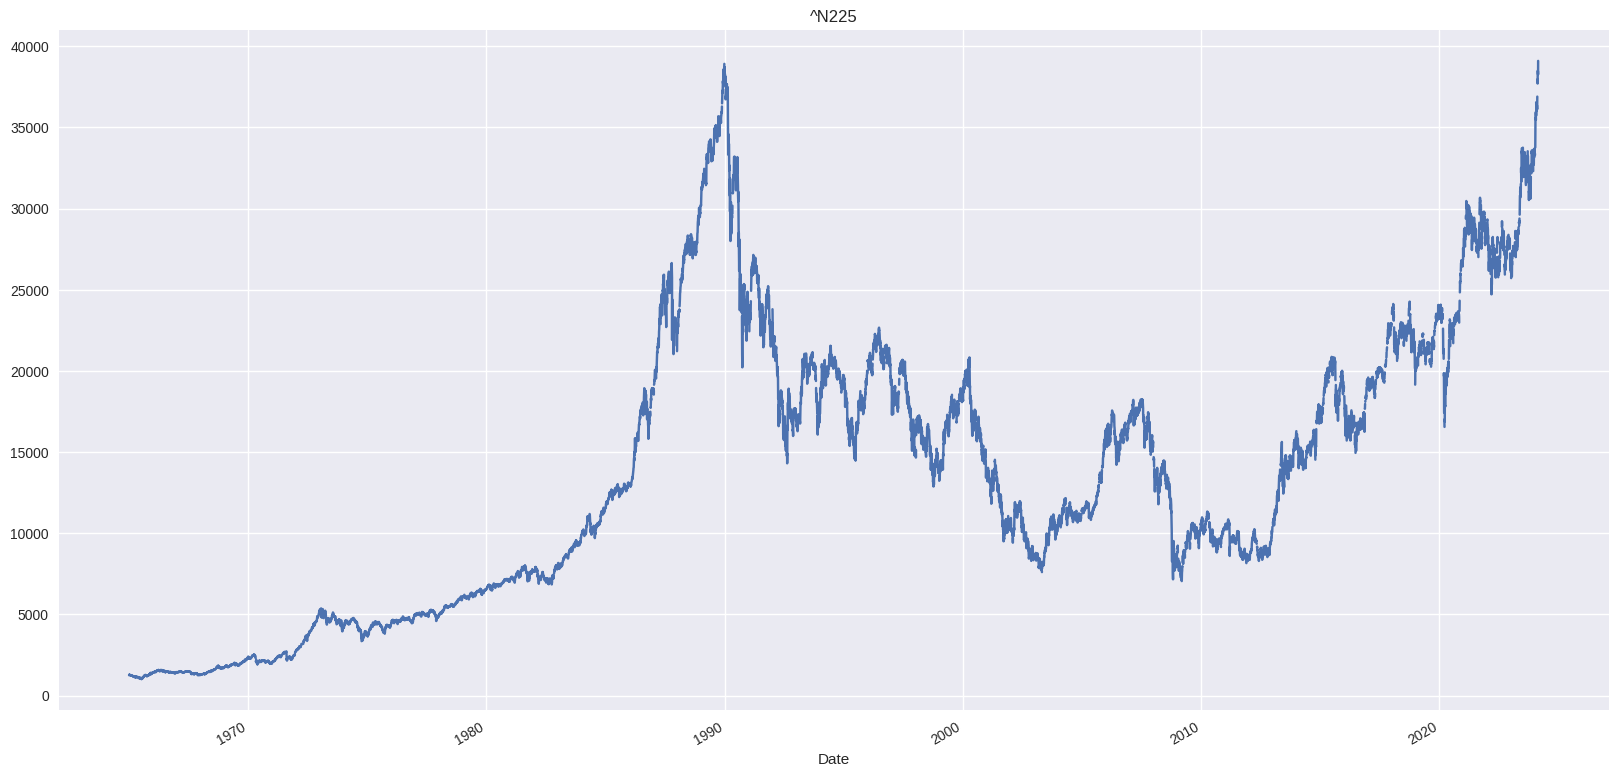

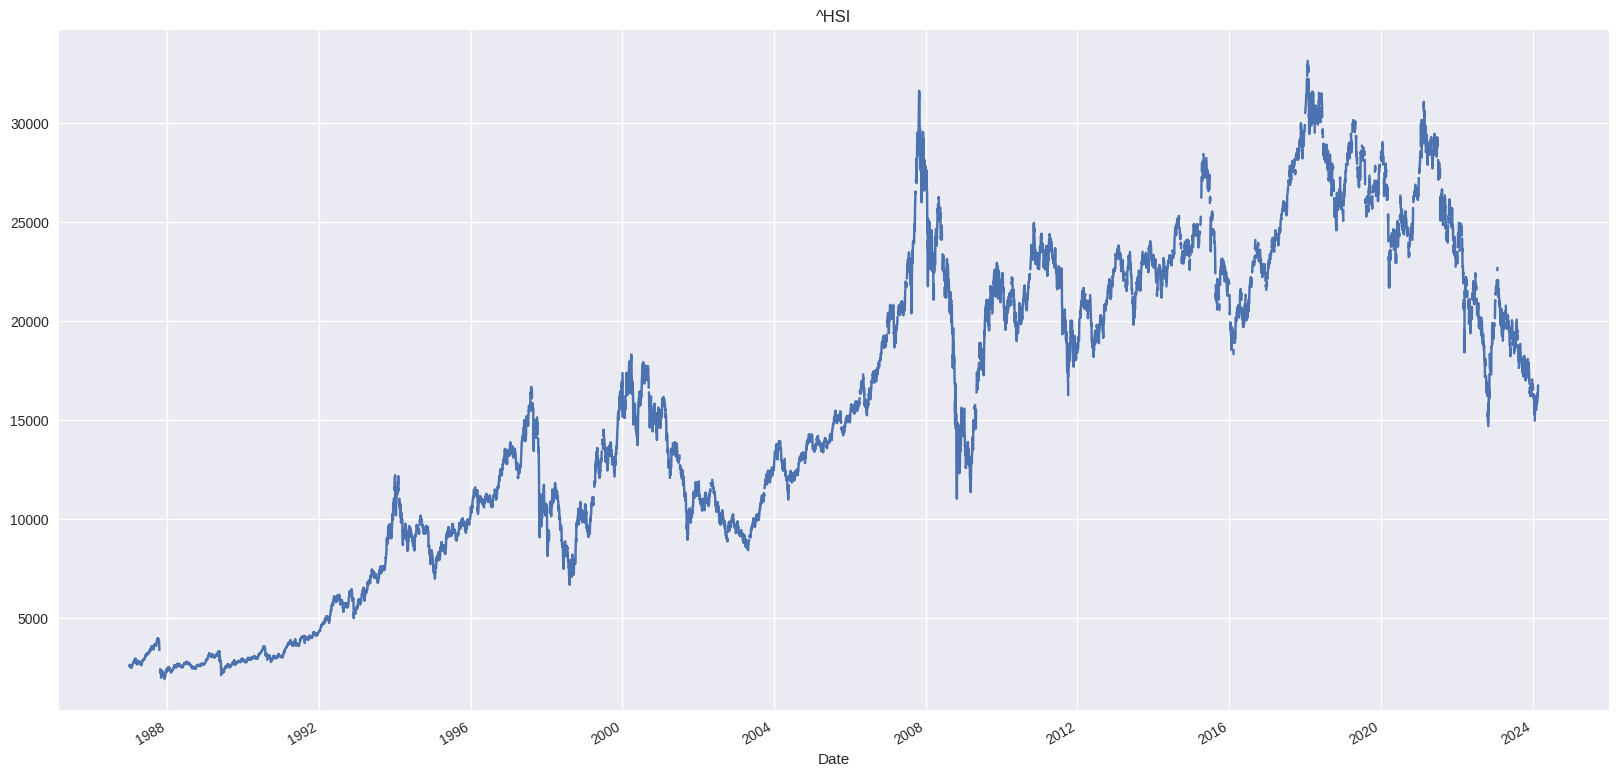

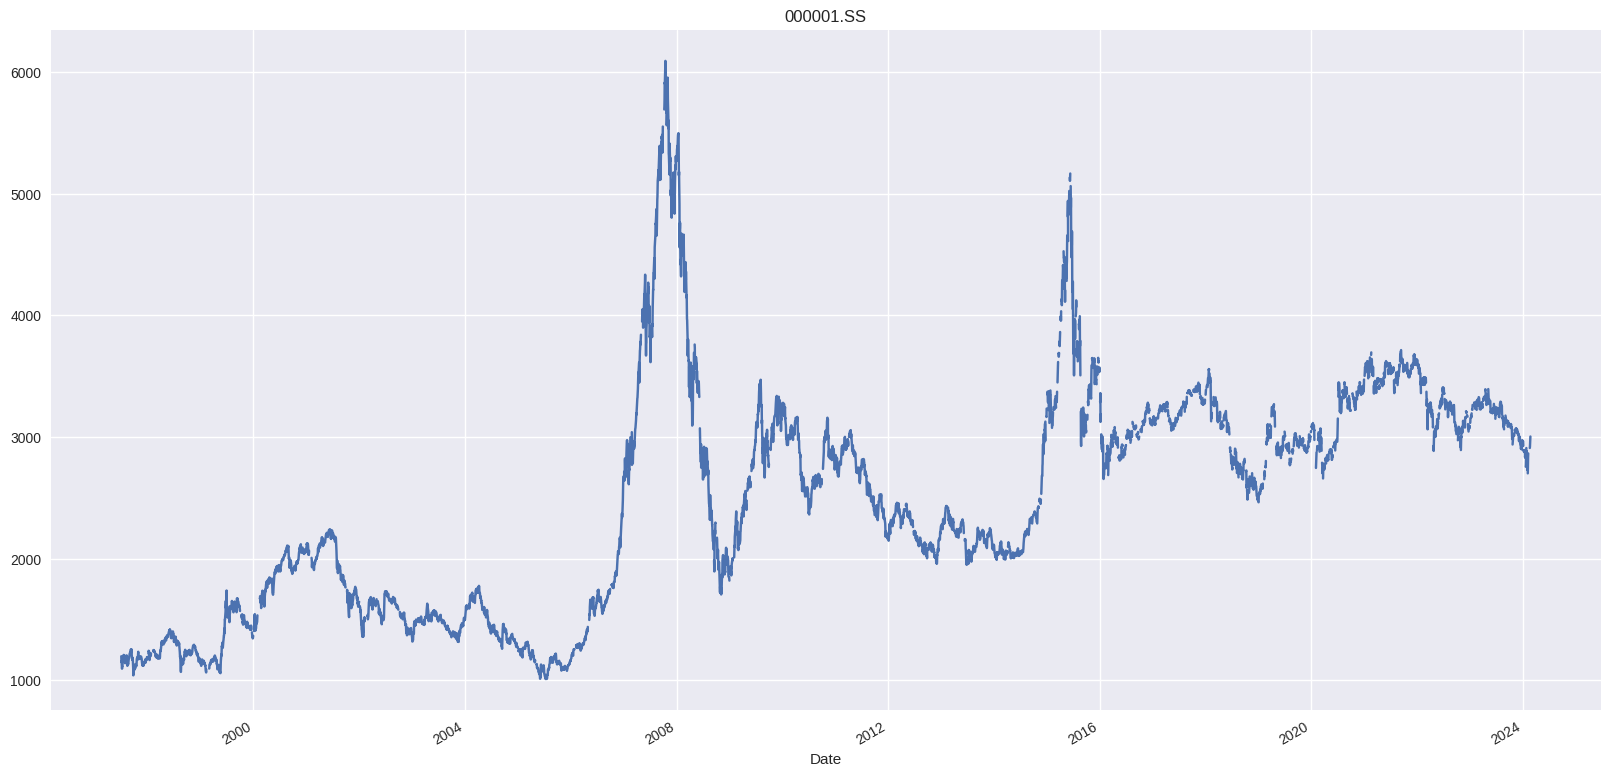

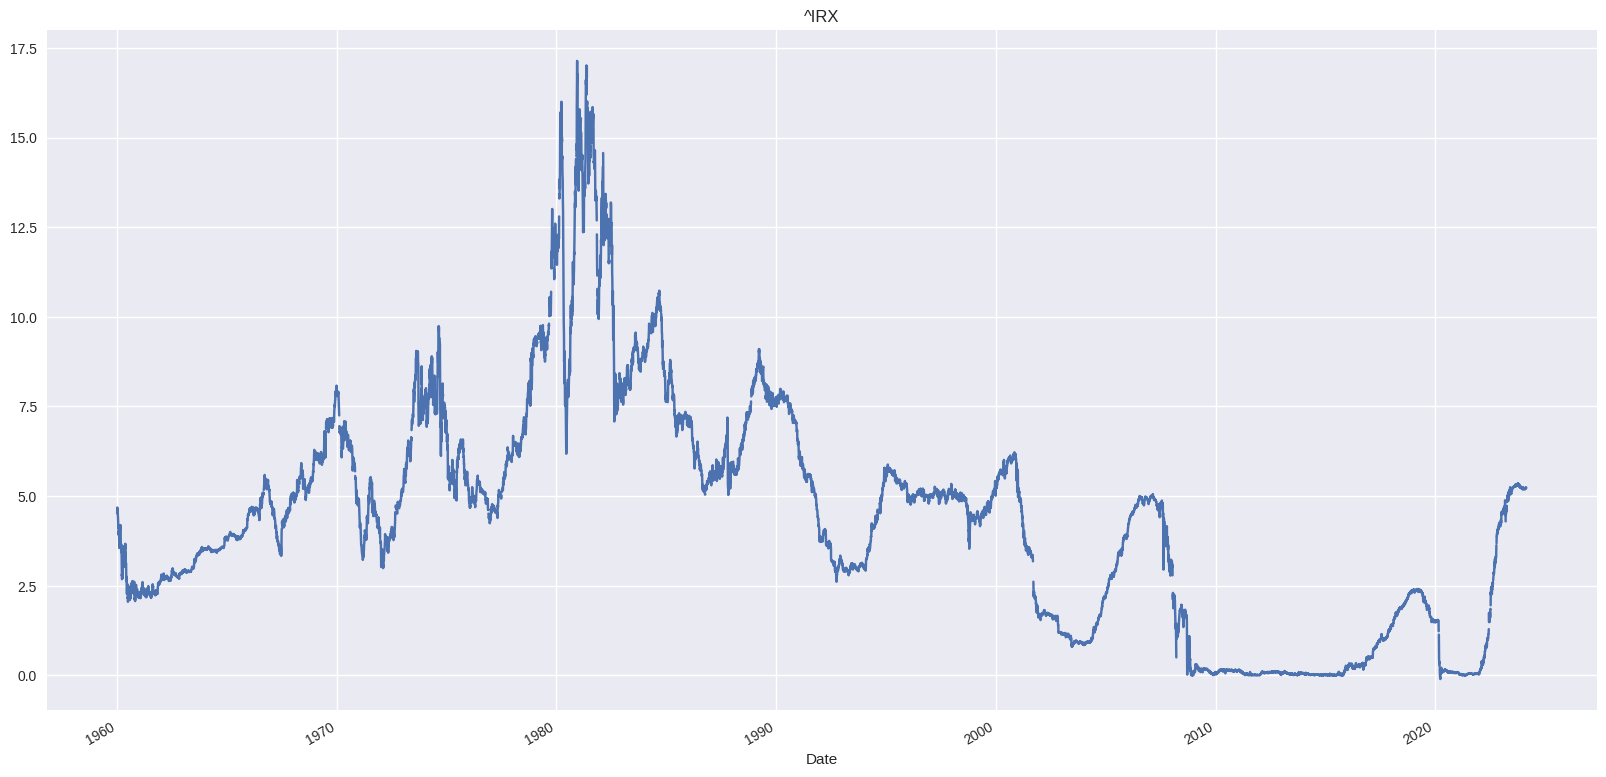

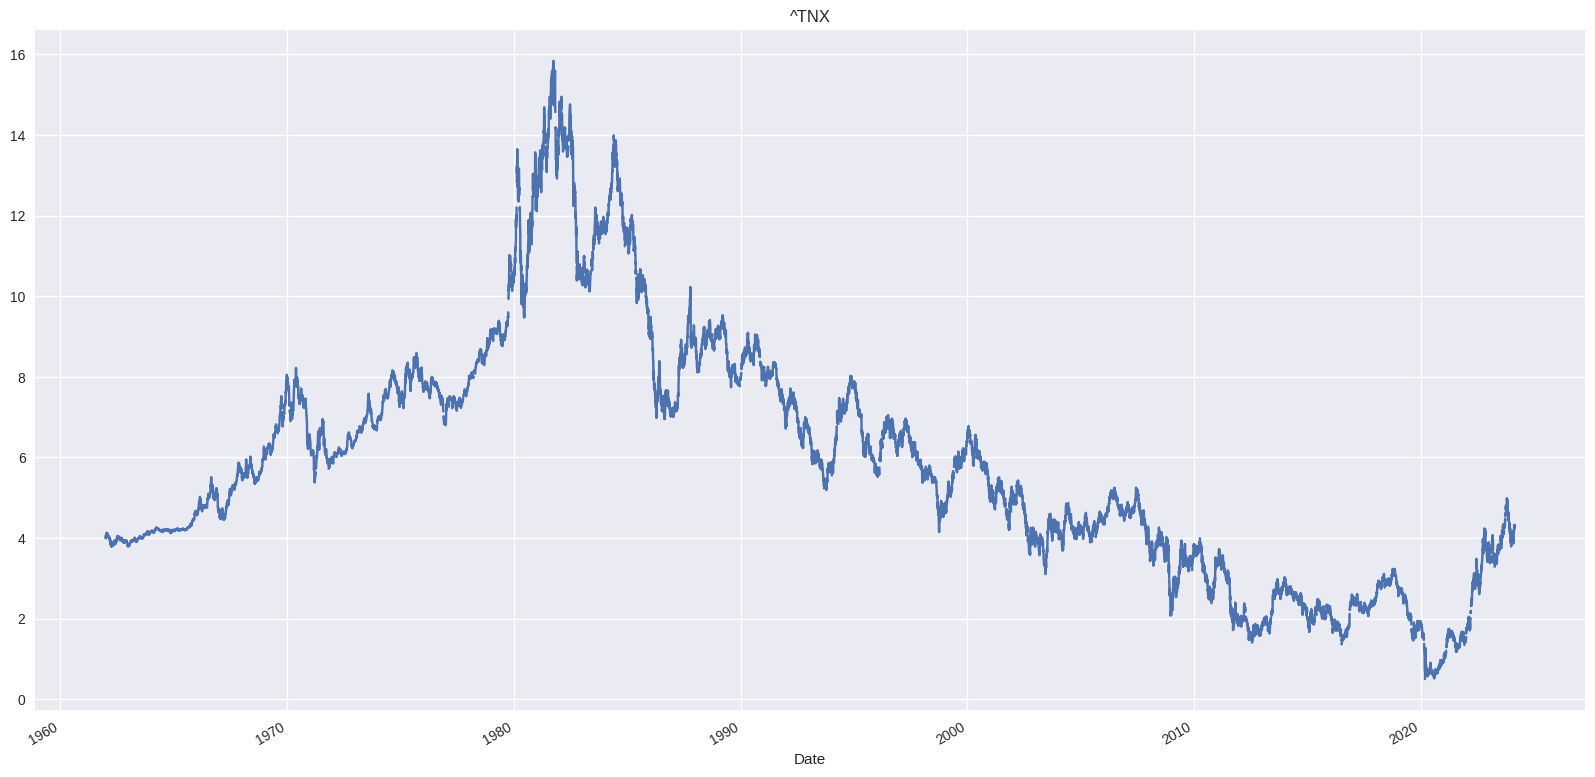

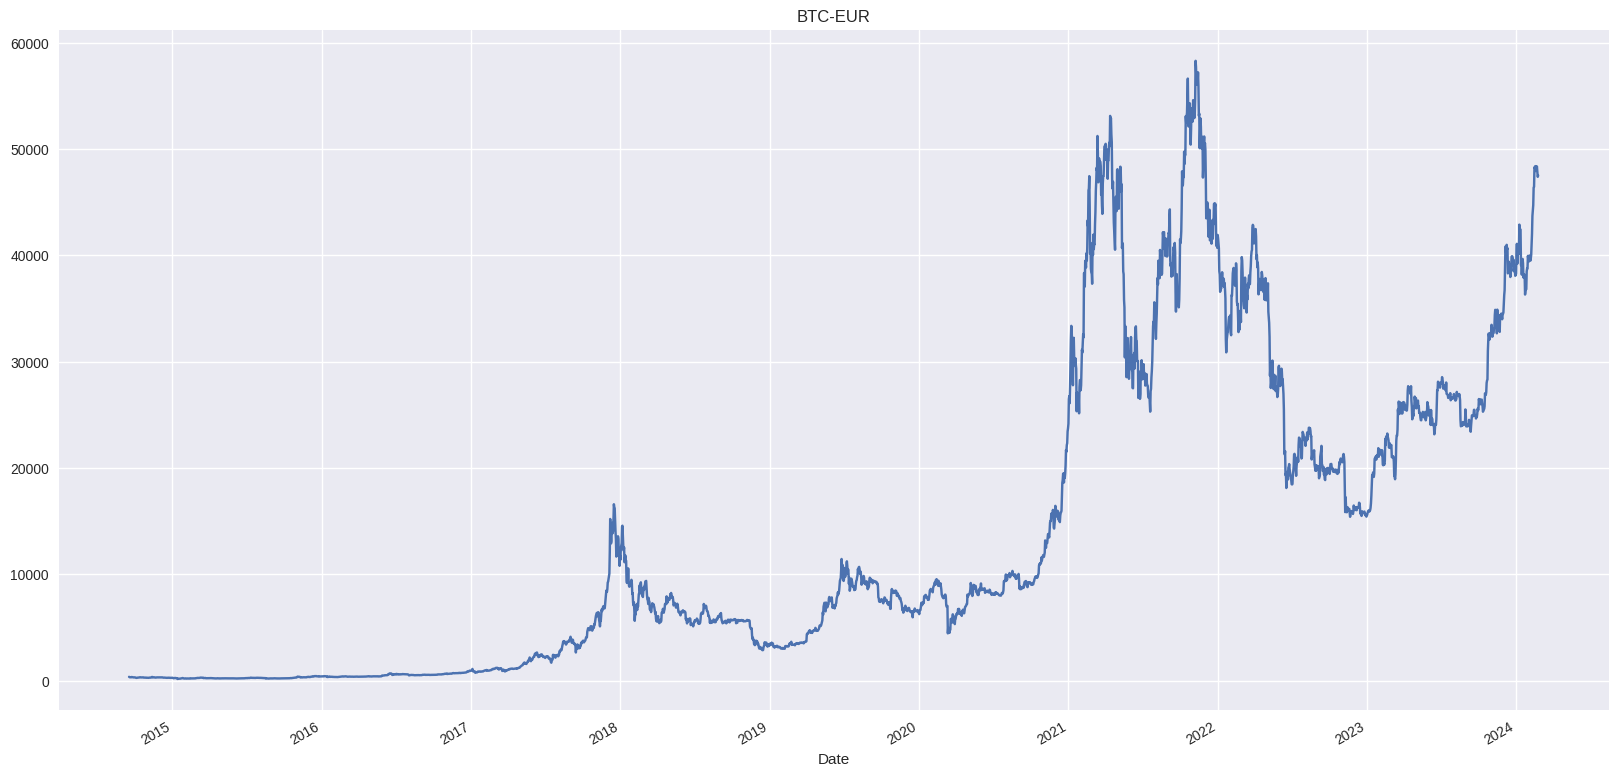

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,10))
  plt.show()

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
# DEVO SISTEMARE I DATI SULLE OBBLIGAZIONI CHE NON SONO I PREZZI MA I RENDIMENTI!!!
rendimenti[bond_tickers] = (1+dati[bond_tickers]/100)**(1/253)-1

(rendimenti.mean()+1)**253-1

Ticker
^GSPC        0.075706
^FTSE        0.060286
^RUT         0.083721
^STOXX50E    0.027573
^N225        0.073738
^HSI         0.076172
000001.SS    0.053847
^IRX         0.041527
^TNX         0.056188
BTC-EUR      0.701355
dtype: float64

<Axes: xlabel='Ticker', ylabel='Ticker'>

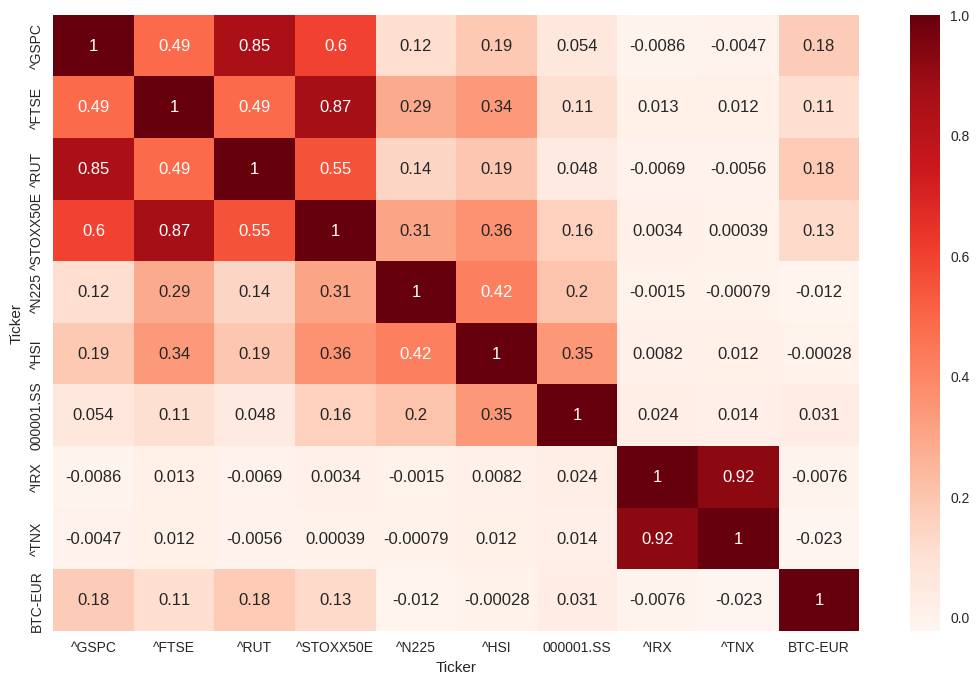

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 90.0
3 720.0
4 5040.0
5 30240.0
6 151200.0
7 604800.0
8 1814400.0
9 3628800.0


<ipython-input-12-db9c0b8d2220>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x=np.math.factorial(len(dati.columns))
<ipython-input-12-db9c0b8d2220>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(i,x/np.math.factorial(len(dati.columns)-i))


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


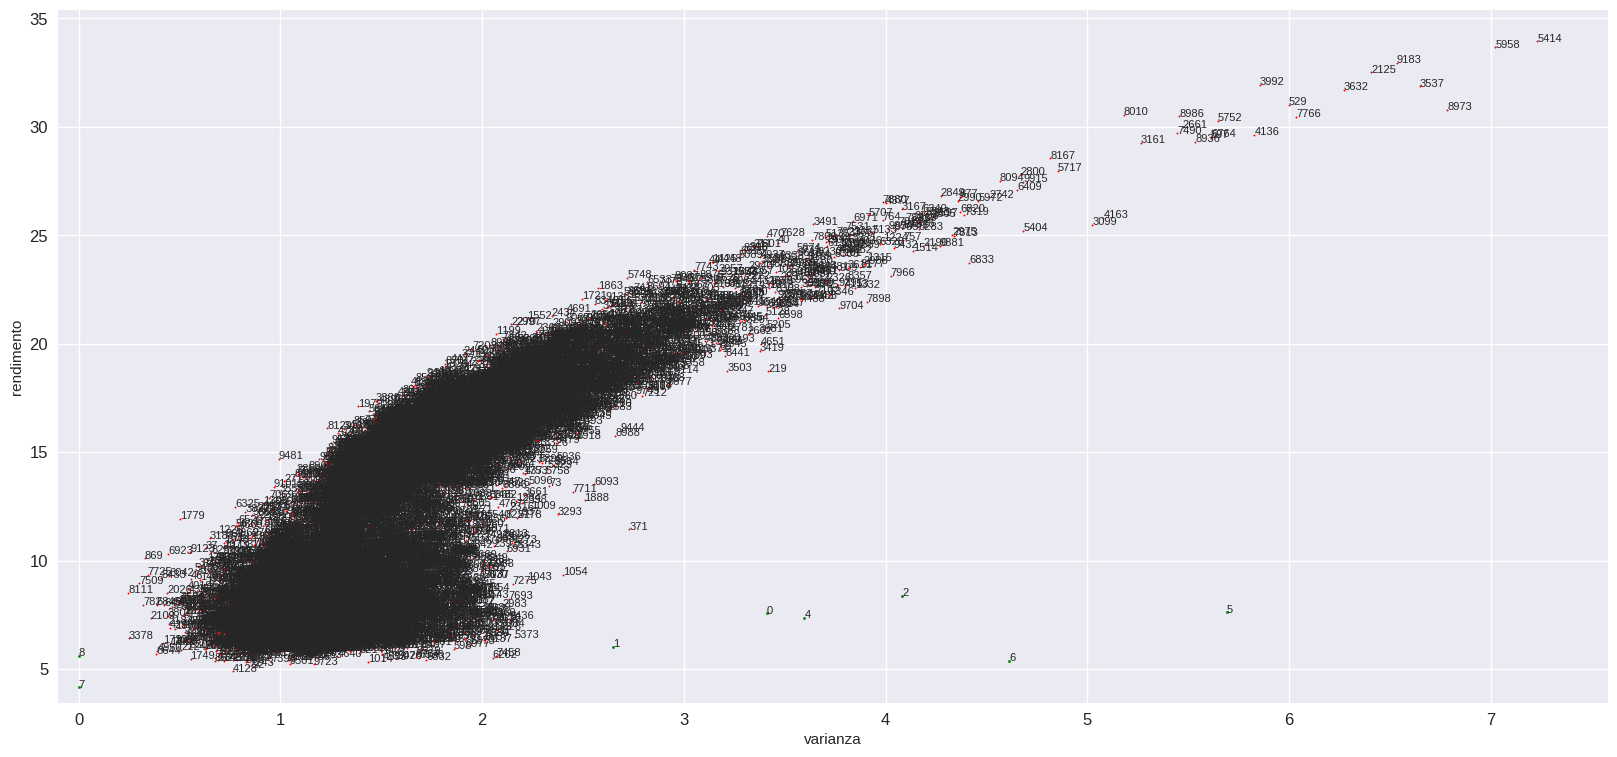

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella.loc[9594]

rendimento                     15.427911
varianza                        1.584031
quasi Sharpe                    9.739652
S&P500                          5.142871
FTSE UK                        15.058820
Russell 2000 USA small caps     1.861606
STOXX 50 Europa                13.715149
Nikkei Giaoppone                0.169199
Hang Seng HK                   14.350824
SSE composite Cina              4.085416
Bond US 1 anno                 15.776902
Bond US 10 anni                14.433408
Bitcoin                        15.405804
Name: 9594, dtype: float64

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  S&P500  FTSE UK  \
0    7.570563   3.410308      2.219906   100.0      0.0   
1    6.028632   2.650817      2.274254     0.0    100.0   
2    8.372125   4.081717      2.051128     0.0      0.0   
3    2.757312   3.996904      0.689862     0.0      0.0   
4    7.373800   3.597552      2.049671     0.0      0.0   
5    7.617249   5.691298      1.338403     0.0      0.0   
6    5.384735   4.612264      1.167482     0.0      0.0   
7    4.152747   0.000361  11500.604427     0.0      0.0   
8    5.618844   0.000316  17780.143403     0.0      0.0   
9   70.135460  34.217112      2.049719     0.0      0.0   

   Russell 2000 USA small caps  STOXX 50 Europa  Nikkei Giaoppone  \
0                          0.0              0.0               0.0   
1                          0.0              0.0               0.0   
2                        100.0              0.0               0.0   
3                          0.0            100.0               0.0   
4                          0.0              0.0             100.0   
5                          0.0              0.0               0.0   
6                          0.0              0.0               0.0   
7                          0.0              0.0               0.0   
8                          0.0              0.0               0.0   
9                          0.0              0.0               0.0   

   Hang Seng HK  SSE composite Cina  Bond US 1 anno  Bond US 10 anni  Bitcoin  
0           0.0                 0.0             0.0              0.0      0.0  
1           0.0                 0.0             0.0              0.0      0.0  
2           0.0                 0.0             0.0              0.0      0.0  
3           0.0                 0.0             0.0              0.0      0.0  
4           0.0                 0.0             0.0              0.0      0.0  
5         100.0                 0.0             0.0              0.0      0.0  
6           0.0               100.0             0.0              0.0      0.0  
7           0.0                 0.0           100.0              0.0      0.0  
8           0.0                 0.0             0.0            100.0      0.0  
9           0.0                 0.0             0.0              0.0    100.0

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(5414,
 rendimento                     33.944326
 varianza                        7.231347
 quasi Sharpe                    4.694053
 S&P500                         12.215214
 FTSE UK                         4.324184
 Russell 2000 USA small caps    11.848691
 STOXX 50 Europa                 5.843296
 Nikkei Giaoppone               11.888956
 Hang Seng HK                    3.951840
 SSE composite Cina              0.721255
 Bond US 1 anno                  2.188094
 Bond US 10 anni                 4.151243
 Bitcoin                        42.867226
 Name: 5414, dtype: float64)

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(8111,
 rendimento                      8.519543
 varianza                        0.246885
 quasi Sharpe                   34.508176
 S&P500                          3.192119
 FTSE UK                         2.058114
 Russell 2000 USA small caps     6.730703
 STOXX 50 Europa                 1.263937
 Nikkei Giaoppone                9.676199
 Hang Seng HK                    0.196741
 SSE composite Cina              7.764021
 Bond US 1 anno                 32.914577
 Bond US 10 anni                31.541522
 Bitcoin                         4.662067
 Name: 8111, dtype: float64)

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(8111,
 rendimento                      8.519543
 varianza                        0.246885
 quasi Sharpe                   34.508176
 S&P500                          3.192119
 FTSE UK                         2.058114
 Russell 2000 USA small caps     6.730703
 STOXX 50 Europa                 1.263937
 Nikkei Giaoppone                9.676199
 Hang Seng HK                    0.196741
 SSE composite Cina              7.764021
 Bond US 1 anno                 32.914577
 Bond US 10 anni                31.541522
 Bitcoin                         4.662067
 Name: 8111, dtype: float64)

# Analisi su ETF azionari geografici

In [ ]:
# escludo: replica swap, leva, settoriali, ESG e similari, strategie di trading, sotto 100M di capitalizzazione, identici ad altri indici
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Core MSCI World","SWDA",0.20,True],["iShares Core MSCI Emerging Markets IMI","EIMI",0.18,True],
     ["iShares Nasdaq 100","CSNDX",0.33,False],["iShares MSCI ACWI","IUSQ",0.20,True],["Vanguard FTSE All-World","VWCE",0.22,True],
     ["iShares Core DAX","EXS1",0.16,False],["Lyxor Core STOXX Europe 600 (DR)","MEUD",0.07,True],["iShares Core MSCI Europe","SMEA",0.12,True],
     ["Xtrackers MSCI USA","XD9U",0.07,False],["Xtrackers MSCI Emerging Markets","XMME",0.18,True],["iShares Core EURO STOXX 50","CSSX5E",0.10,True],
     ["iShares Edge MSCI World Value Factor","IWVL",0.30,True],["iShares Core MSCI Japan IMI","SJPA",0.15,False],["iShares Core MSCI EMU","CSEMU",0.12,True],
     ["iShares Edge MSCI World Minimum Volatility","MVOL",0.30,True],["iShares Edge MSCI Europe Value Factor","IEVL",0.25,True],
     ["iShares Core MSCI Pacific ex Japan","CSPXJ",0.20,True],["Xtrackers S&P 500 Equal Weight","XDEW",0.20,False],["iShares MSCI World Small Cap","IUSN",0.35,True],
     ["iShares Edge MSCI World Quality Factor","IWQU",0.30,True],["iShares MSCI EM Asia","CSEMAS",0.20,True],["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],
     ["SPDR S&P 400 US Mid Cap","SPY4",0.30,False],["iShares Edge S&P 500 Minimum Volatility","MVUS",0.20,False],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],
     ["Xtrackers MSCI China","XCS6",0.65,False],["Amundi CAC 40","C40",0.25,False],["Xtrackers MSCI Europe Small Cap","XXSC",0.30,True],
     ["Vanguard FTSE North America","VNRA",0.10,True],["Amundi ETF MSCI Europe Value Factor","VCEU",0.23,True],["Amundi MSCI Europe Quality Factor","QCEU",0.23,True],
     ["iShares MSCI Australia","SAUS",0.50,False],["Amundi ETF MSCI World ex EMU","CM9",0.35,True],
     ["Franklin FTSE Korea","FLXK",0.09,False],["WisdomTree US Quality Dividend Growth","DGRA",0.33,False],["Lyxor MSCI Brazil","BRA",0.65,False],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC",0.15,True],["Vanguard FTSE Emerging Markets","VFEA",0.22,True],["iShares Edge MSCI World Size Factor","IWSZ",0.30,False],
     ["Amundi Japan Topix","XAMY",0.20,False],["Vanguard FTSE Developed Europe ex UK","VERE",0.10,False],["Fidelity US Quality Income","FUSA",0.25,False],
     ["Franklin FTSE China","FLXC",0.19,False],["iShares MSCI UK Small Cap","SXRD",0.58,False],["Franklin FTSE India","FLXI",0.19,False],
     ["iShares Nikkei 225","CSNKY",0.48,False],["Amundi MSCI Nordic","CN1",0.25,False],["iShares Edge MSCI Europe Multifactor","IFSE",0.45,True],
     ["Amundi MSCI Europe Minimum Volatility Factor","MIVO",0.23,True],["iShares MSCI EMU Large Cap","EMUL",0.49,True],["Xtrackers MSCI North America High Dividend Yield","XDND",0.39,False],
     ["Amundi ETF MSCI Switzerland","18MN",0.25,False],["iShares MSCI EMU Mid Cap","IS3H",0.49,True],["iShares MSCI Korea","CSKR",0.65,False],
     ["SPDR MSCI Europe Small Cap","SMCX",0.30,True],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],
     ["iShares Edge MSCI USA Size Factor","QDVC",0.20,False],["SPDR MSCI USA Value Weighted","ZPRU",0.20,False],["Xtrackers MSCI Taiwan","XMTW",0.65,False]]
# da esludere: tutti quelli che pur avendo un indice diverso si sovrappongono e tutti quelli globali che hanno sotto coperto da altri con ter dignitosi e quelli "excluding" se non servono
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Nasdaq 100","CSNDX",0.33,False],["iShares Core DAX","EXS1",0.16,False],["iShares Core MSCI Japan IMI","SJPA",0.15,False],
     ["iShares Edge MSCI Europe Value Factor","IEVL",0.25,True],["iShares MSCI China A"],["iShares Core MSCI Pacific ex Japan","CSPXJ",0.20,True],
     ["Xtrackers S&P 500 Equal Weight","XDEW",0.20,False],["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],
     ["SPDR S&P 400 US Mid Cap","SPY4",0.30,False],["iShares Edge S&P 500 Minimum Volatility","MVUS",0.20,False],["iShares MSCI India"],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],["Amundi CAC 40","C40",0.25,False],["Xtrackers MSCI Europe Small Cap","XXSC",0.30,True],
     ["Amundi ETF MSCI Europe Value Factor","VCEU",0.23,True],["Amundi MSCI Europe Quality Factor","QCEU",0.23,True],["iShares MSCI Australia","SAUS",0.50,False],
     ["Franklin FTSE Korea","FLXK",0.09,False],["WisdomTree US Quality Dividend Growth","DGRA",0.33,False],
     ["Lyxor MSCI Brazil","BRA",0.65,False],["iShares MSCI UK Small Cap","SXRD",0.58,False],["Amundi MSCI Nordic","CN1",0.25,False],
     ["Amundi MSCI Europe Minimum Volatility Factor","MIVO",0.23,True],["iShares MSCI EMU Large Cap","EMUL",0.49,True],["Xtrackers MSCI North America High Dividend Yield","XDND",0.39,False],
     ["iShares MSCI EMU Mid Cap","IS3H",0.49,True],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],["iShares Edge MSCI USA Size Factor","QDVC",0.20,False],
     ["SPDR MSCI USA Value Weighted","ZPRU",0.20,False],["Xtrackers MSCI Taiwan","XMTW",0.65,False]]
# escludiamo anche le versioni su base di criteri contabili e quelle lievemente sovrapposte (addio Nasdaq), tengo solo le small caps Russell
etf=[["iShares Core S&P 500","CSSPX",0.07,False],["iShares Core DAX","EXS1",0.16,False],["iShares Core MSCI Japan IMI","SJPA",0.15,False],
     ["UBS ETF (LU) MSCI UK","UKGBPB",0.20,False],
     ["UBS ETF (LU) MSCI Switzerland 20/35","SW2CHB",0.20,False],["SPDR Russell 2000 US Small Cap","R2US",0.30,False],["iShares MSCI Canada","CSCA",0.48,False],
     ["Amundi CAC 40","C40",0.25,False],["iShares MSCI Australia","SAUS",0.50,False],["Franklin FTSE Korea","FLXK",0.09,False],
     ["Lyxor MSCI Brazil","BRA",0.65,False],["Amundi MSCI Nordic","CN1",0.25,False],["Xtrackers MSCI Mexico","XMEX",0.65,False],["Lyxor MSCI Eastern Europe ex Russia","EST",0.50,False],
     ["Xtrackers MSCI Taiwan","XMTW",0.65,False]]


nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
ter=list(np.array(etf)[:,2])
globali=list(np.array(etf)[:,3])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]


In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
ERROR:yfinance:
12 Failed downloads:
ERROR:yfinance:['XMEX.F', 'SW2CHB.F', 'SAUS.F', 'R2US.F', 'CSCA.F', 'CSSPX.F', 'UKGBPB.F', 'C40.F', 'SJPA.F', 'XMTW.F', 'EST.F', 'CN1.F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  15 of 15 completed
ERROR:yfinance:
11 Failed downloads:
ERROR:yfinance:['UKGBPB.PA', 'SAUS.PA', 'SW2CHB.PA', 'CSSPX.PA', 'BRA.PA', 'FLXK.PA', 'XMEX.PA', 'EST.PA', 'EXS1.PA', 'SJPA.PA', 'XMTW.PA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati

Ticker           CSSPX        EXS1       SJPA     UKGBPB     SW2CHB  \
Date                                                                  
2008-01-02         NaN         NaN        NaN        NaN        NaN   
2008-01-03         NaN         NaN        NaN        NaN        NaN   
2008-01-04         NaN         NaN        NaN        NaN        NaN   
2008-01-07         NaN         NaN        NaN        NaN        NaN   
2008-01-08         NaN         NaN        NaN        NaN        NaN   
...                ...         ...        ...        ...        ...   
2024-02-19  488.480011  142.960007  49.820000  34.134998  27.030001   
2024-02-20  483.010010  142.839996  49.285000  34.134998  27.059999   
2024-02-21  482.329987  143.139999  49.325001  33.939999  27.010000   
2024-02-22  492.299988  145.339996  49.889999  33.939999  26.855000   
2024-02-23  494.079987  145.679993  50.119999  34.290001  27.045000   

Ticker           R2US        CSCA         C40       SAUS       FLXK  \
Date                                                                  
2008-01-02        NaN         NaN   55.610001        NaN        NaN   
2008-01-03        NaN         NaN   55.570000        NaN        NaN   
2008-01-04        NaN         NaN   54.570000        NaN        NaN   
2008-01-07        NaN         NaN   54.630001        NaN        NaN   
2008-01-08        NaN         NaN   55.060001        NaN        NaN   
...               ...         ...         ...        ...        ...   
2024-02-19  53.639999  170.009995  124.760002  44.200001  31.415001   
2024-02-20  53.020000  168.850006  125.720001  44.029999  31.415001   
2024-02-21  52.599998  168.149994  125.839996  43.740002  31.004999   
2024-02-22  53.020000  168.149994  127.559998  43.970001  31.334999   
2024-02-23  53.020000  170.289993  128.399994  44.224998  31.334999   

Ticker            BRA         CN1   XMEX        EST   XMTW  
Date                                                        
2008-01-02        NaN         NaN    NaN        NaN  11.81  
2008-01-03        NaN         NaN    NaN        NaN  11.46  
2008-01-04        NaN         NaN    NaN        NaN  11.45  
2008-01-07        NaN         NaN    NaN        NaN  11.45  
2008-01-08        NaN         NaN    NaN        NaN  11.14  
...               ...         ...    ...        ...    ...  
2024-02-19  21.629999  656.700012  6.635  23.565001    NaN  
2024-02-20  21.770000  653.200012  6.625  23.889999    NaN  
2024-02-21  21.875000  650.099976  6.642  23.850000    NaN  
2024-02-22  21.844999  658.599976  6.548  24.070000    NaN  
2024-02-23  21.490000  657.599976  6.520  24.275000    NaN  

[4136 rows x 15 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4136 entries, 2008-01-02 to 2024-02-23
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CSSPX   3503 non-null   float64
 1   EXS1    4071 non-null   float64
 2   SJPA    3588 non-null   float64
 3   UKGBPB  2637 non-null   float64
 4   SW2CHB  2618 non-null   float64
 5   R2US    2058 non-null   float64
 6   CSCA    3596 non-null   float64
 7   C40     4130 non-null   float64
 8   SAUS    2500 non-null   float64
 9   FLXK    1207 non-null   float64
 10  BRA     1260 non-null   float64
 11  CN1     3949 non-null   float64
 12  XMEX    3363 non-null   float64
 13  EST     1260 non-null   float64
 14  XMTW    2771 non-null   float64
dtypes: float64(15)
memory usage: 646.0 KB


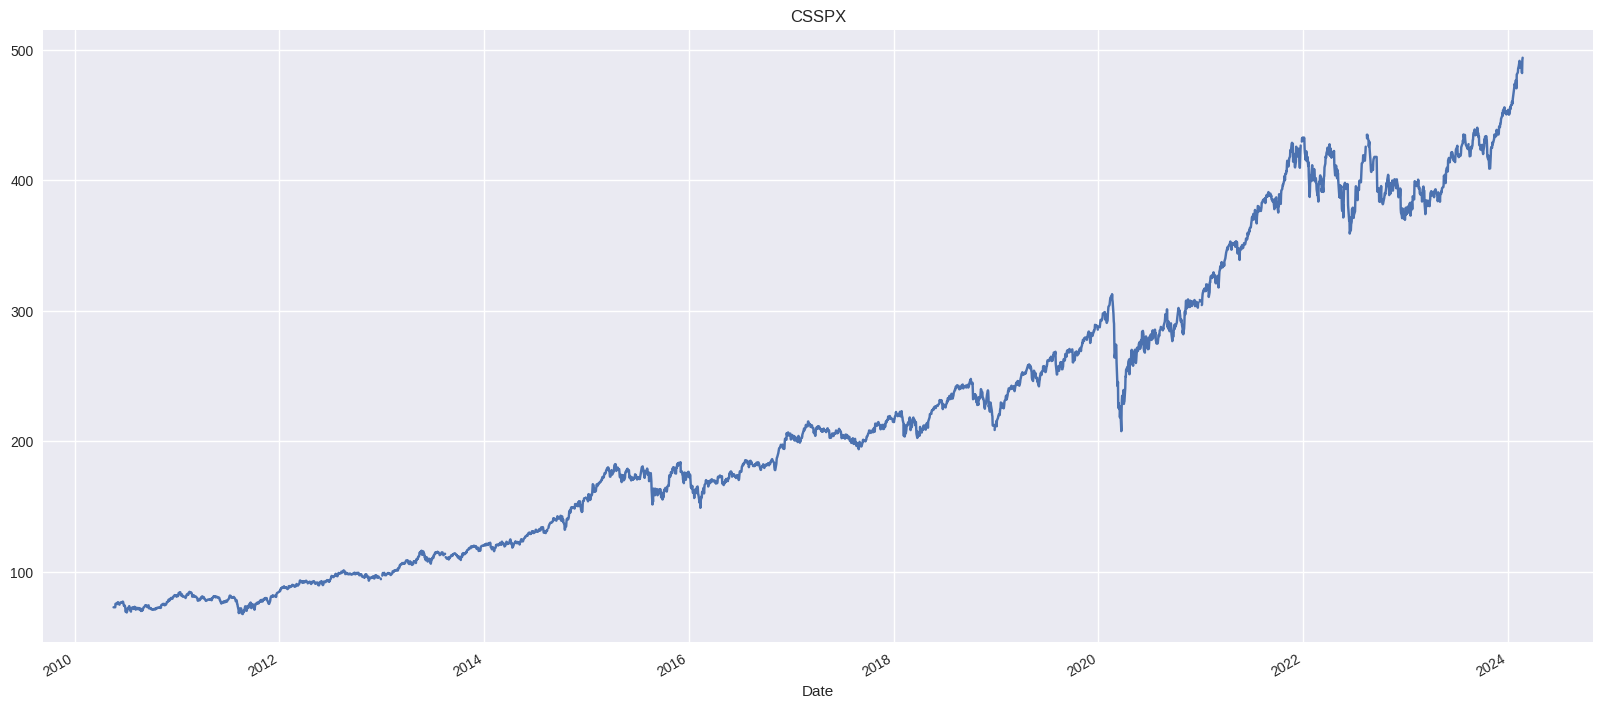

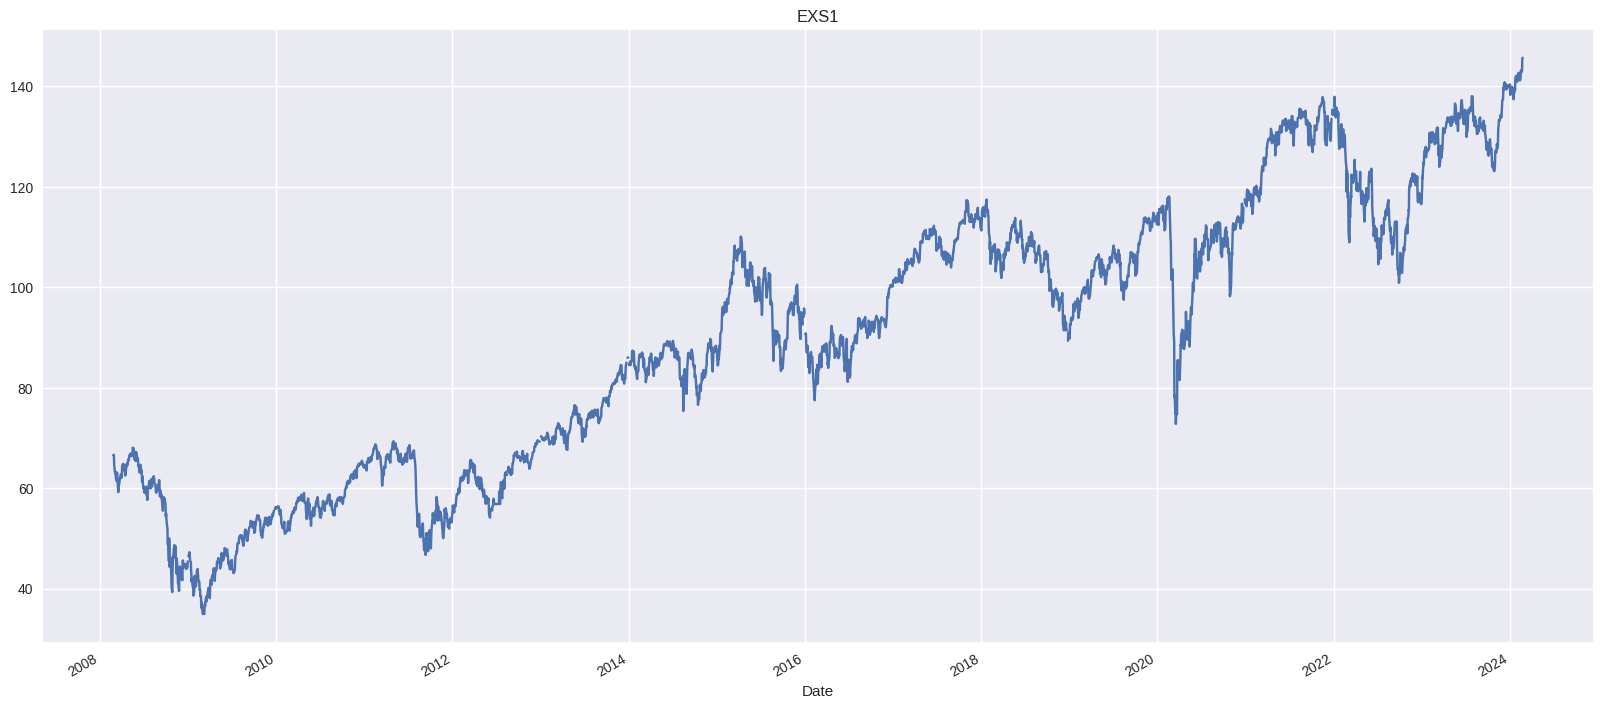

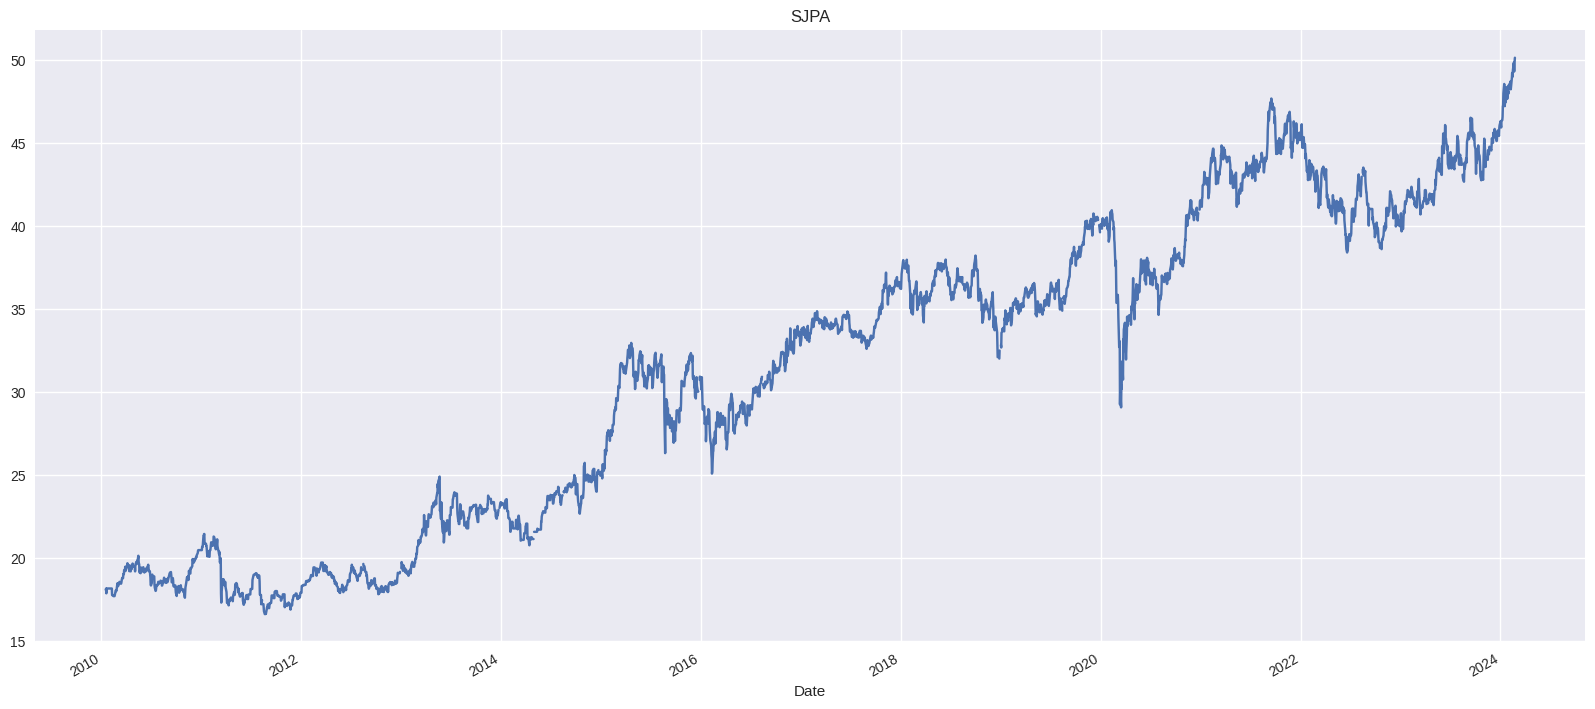

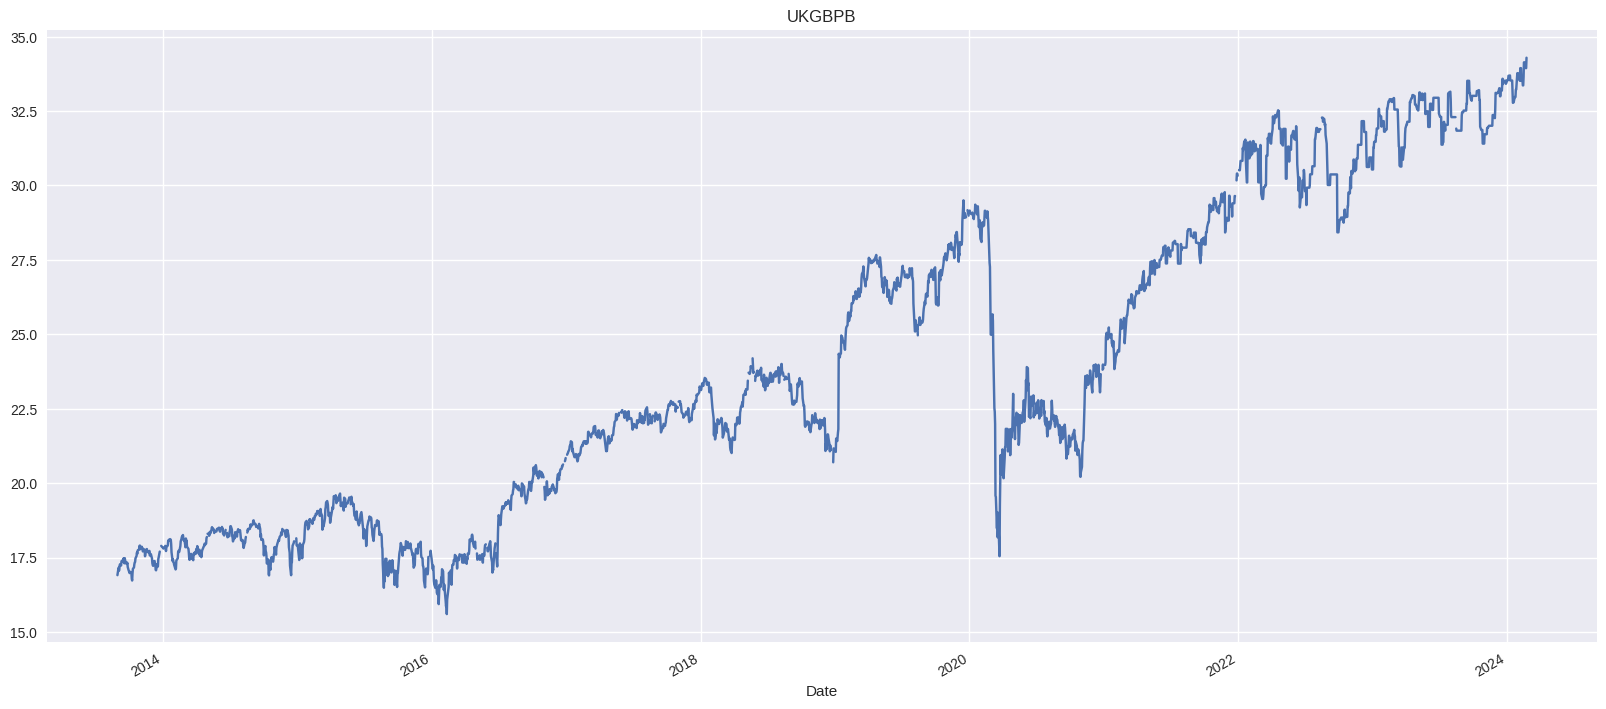

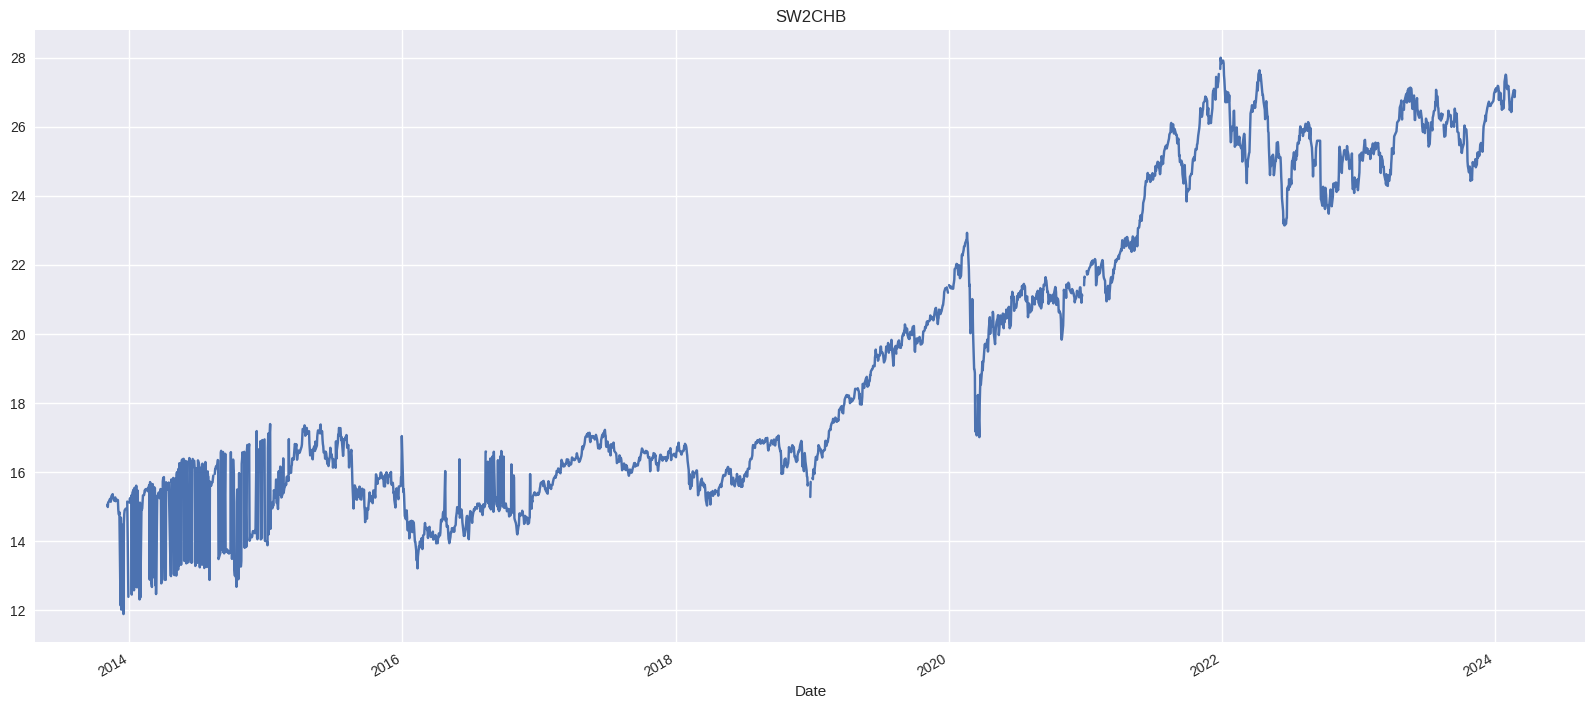

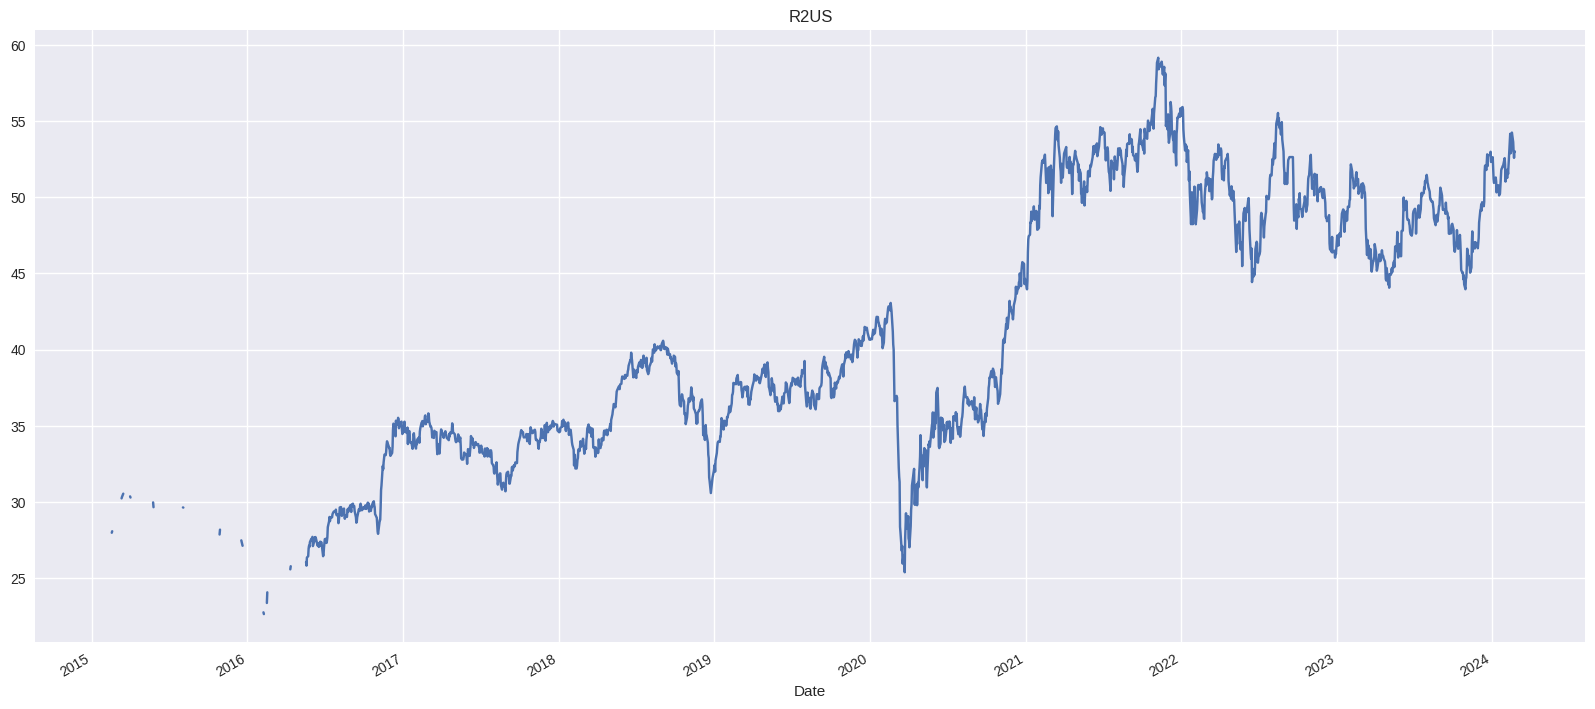

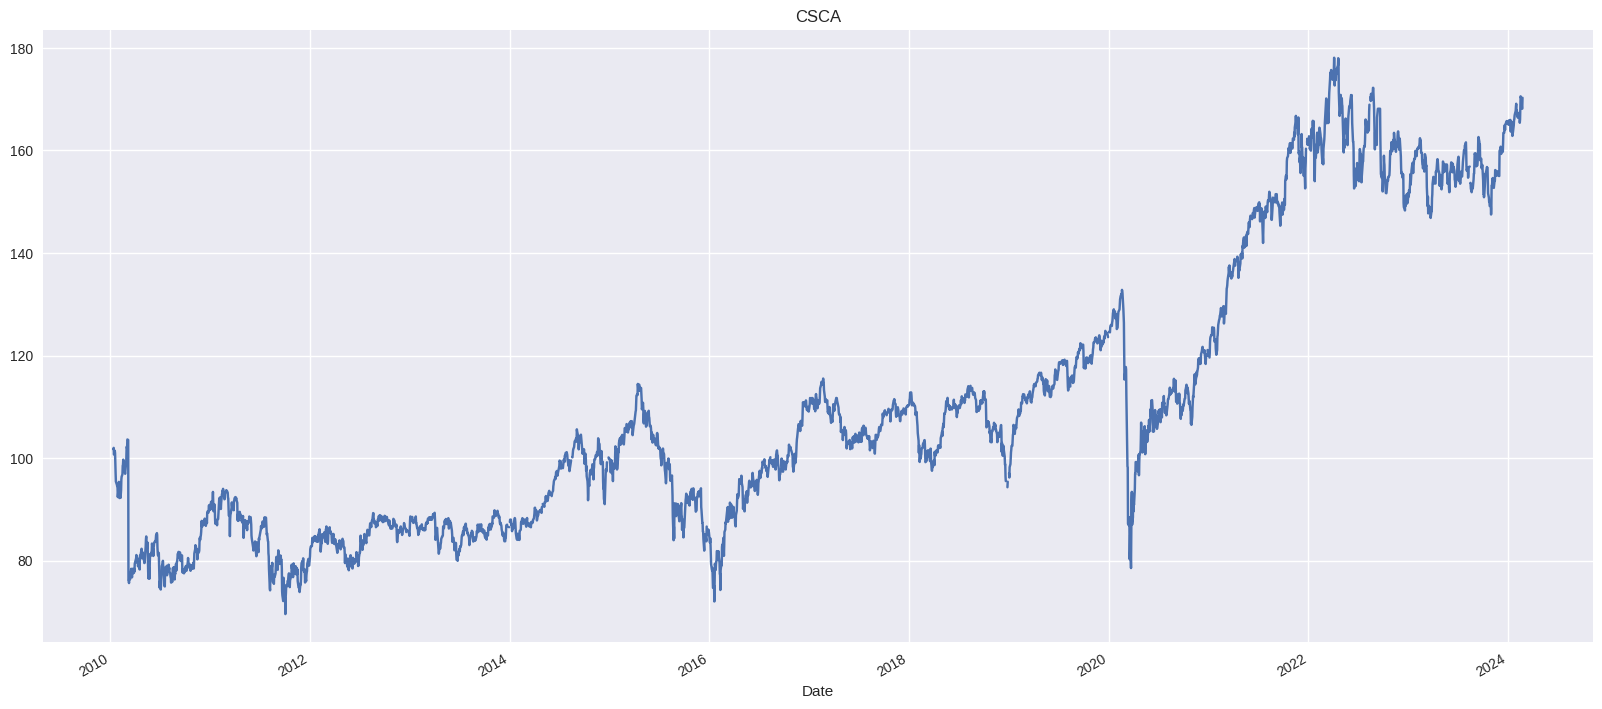

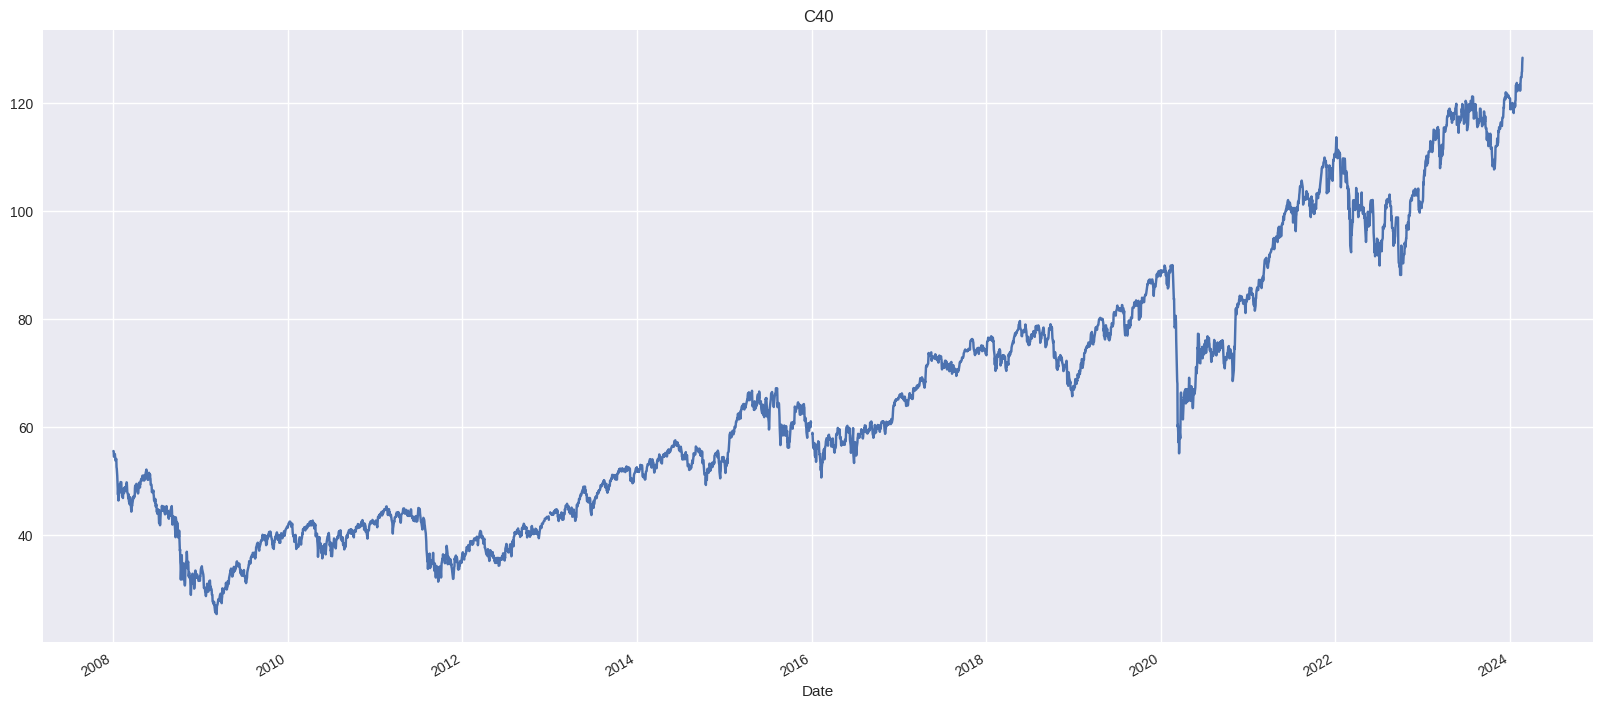

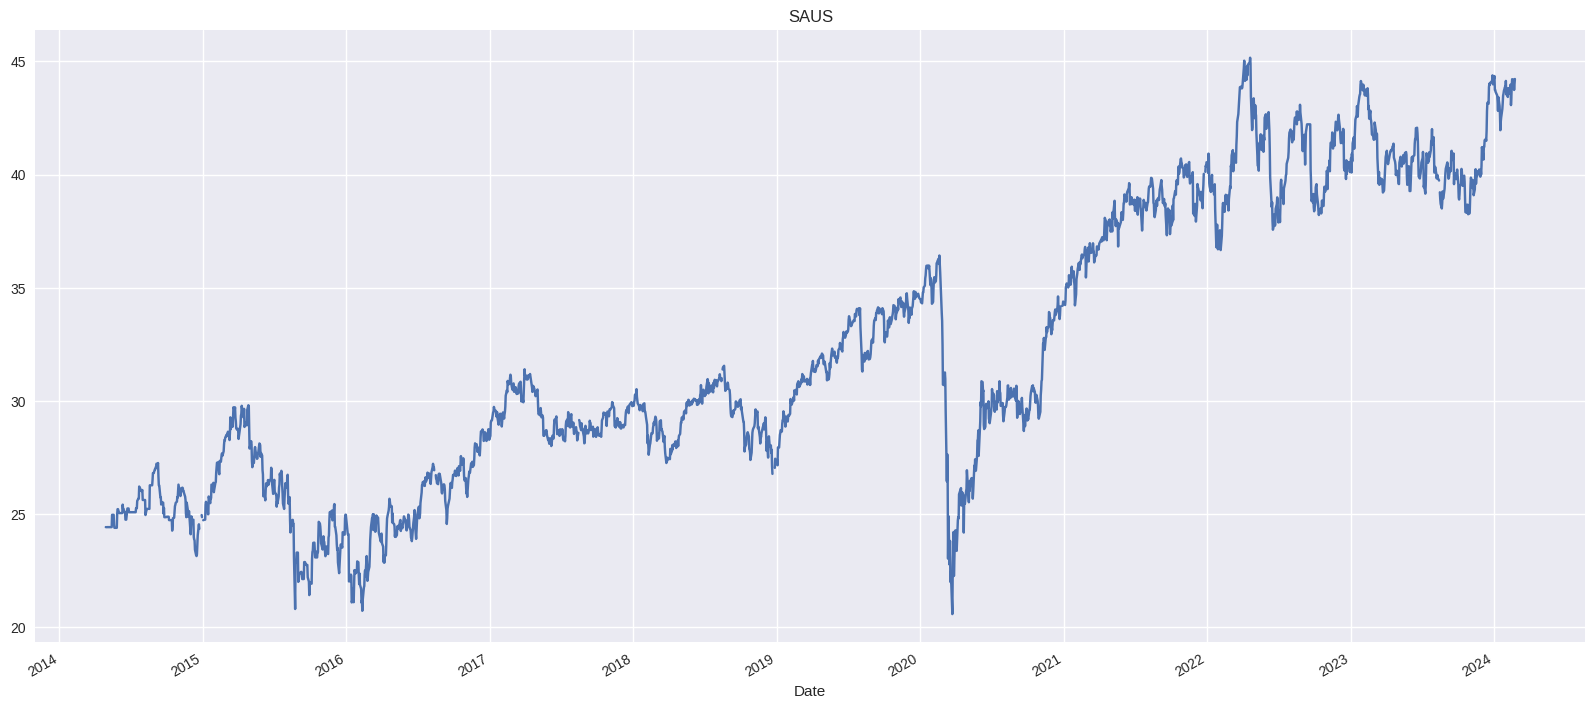

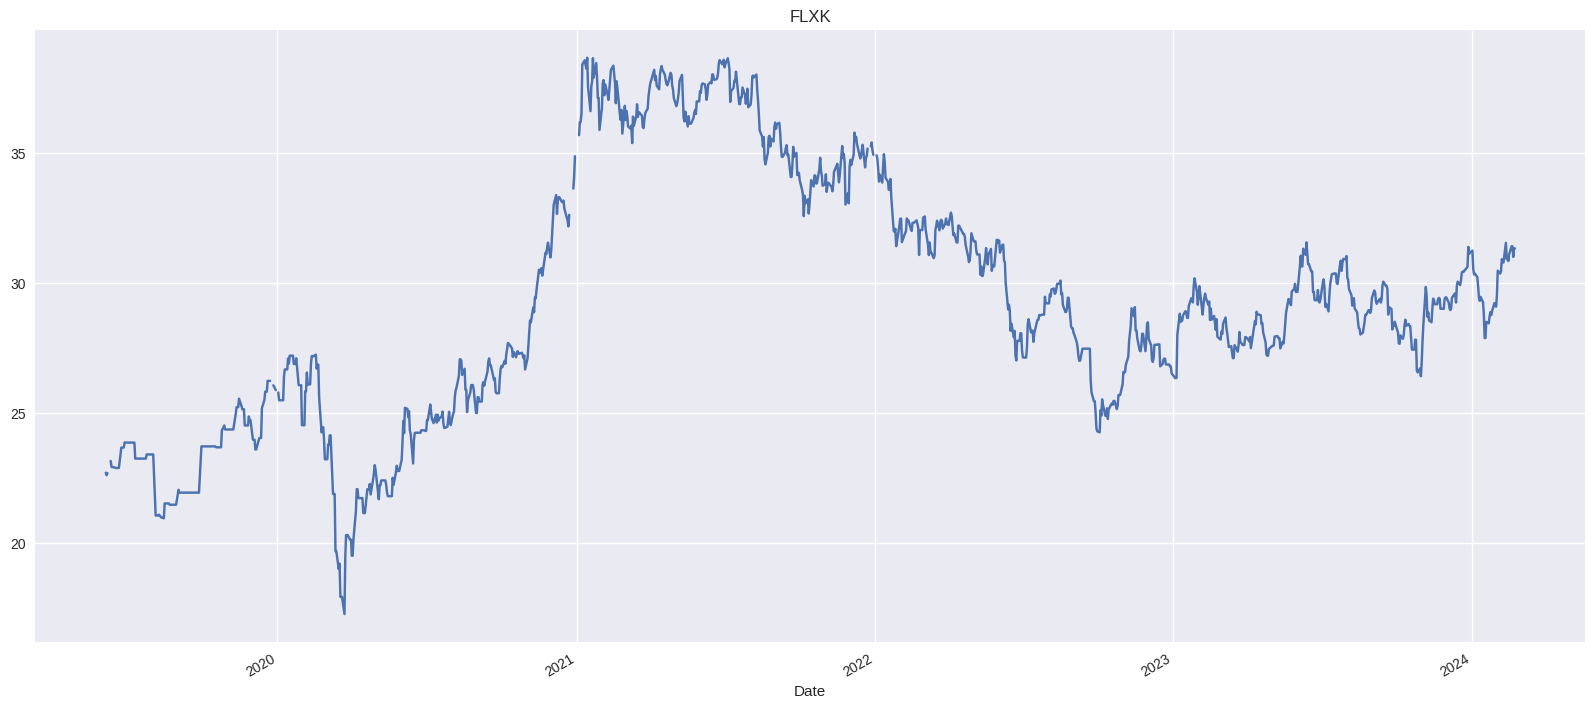

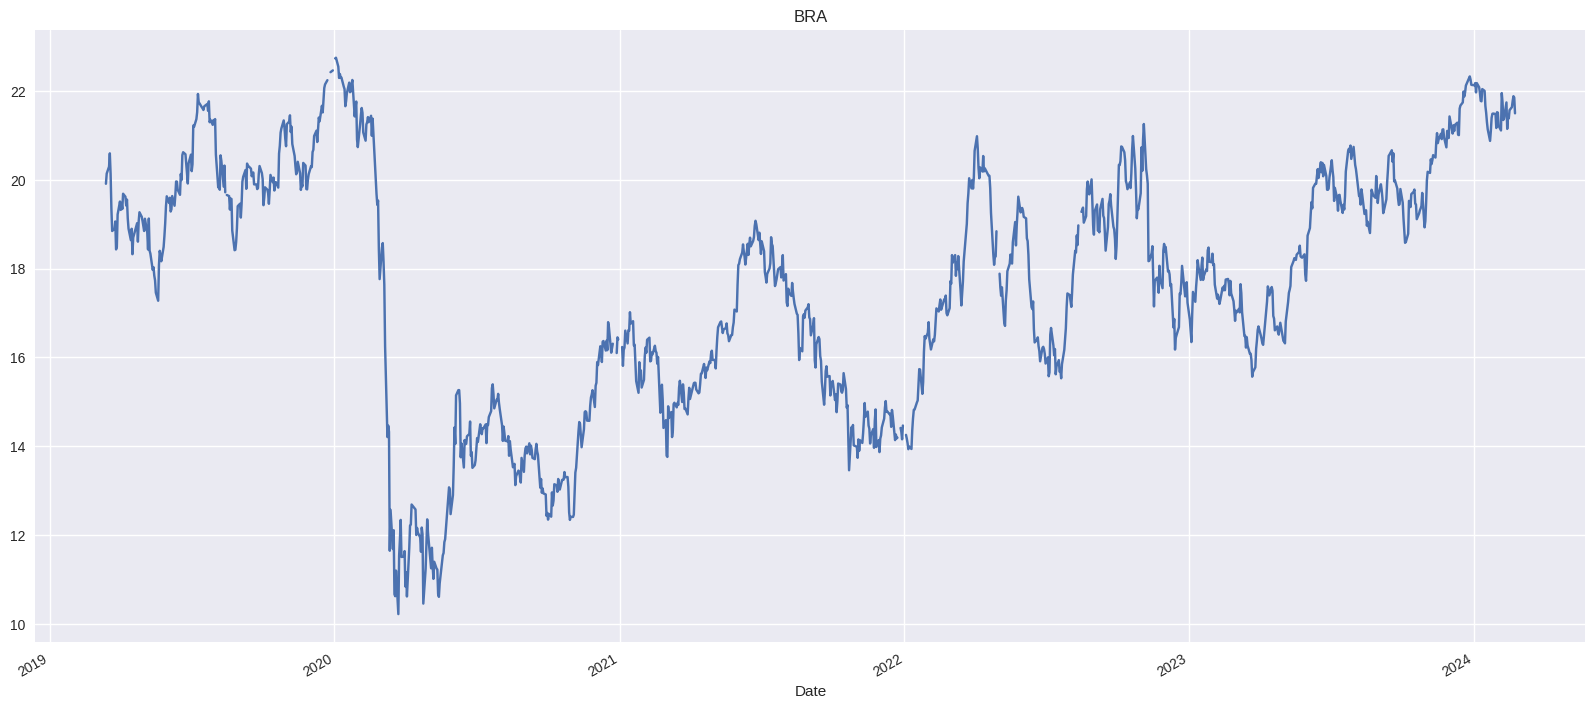

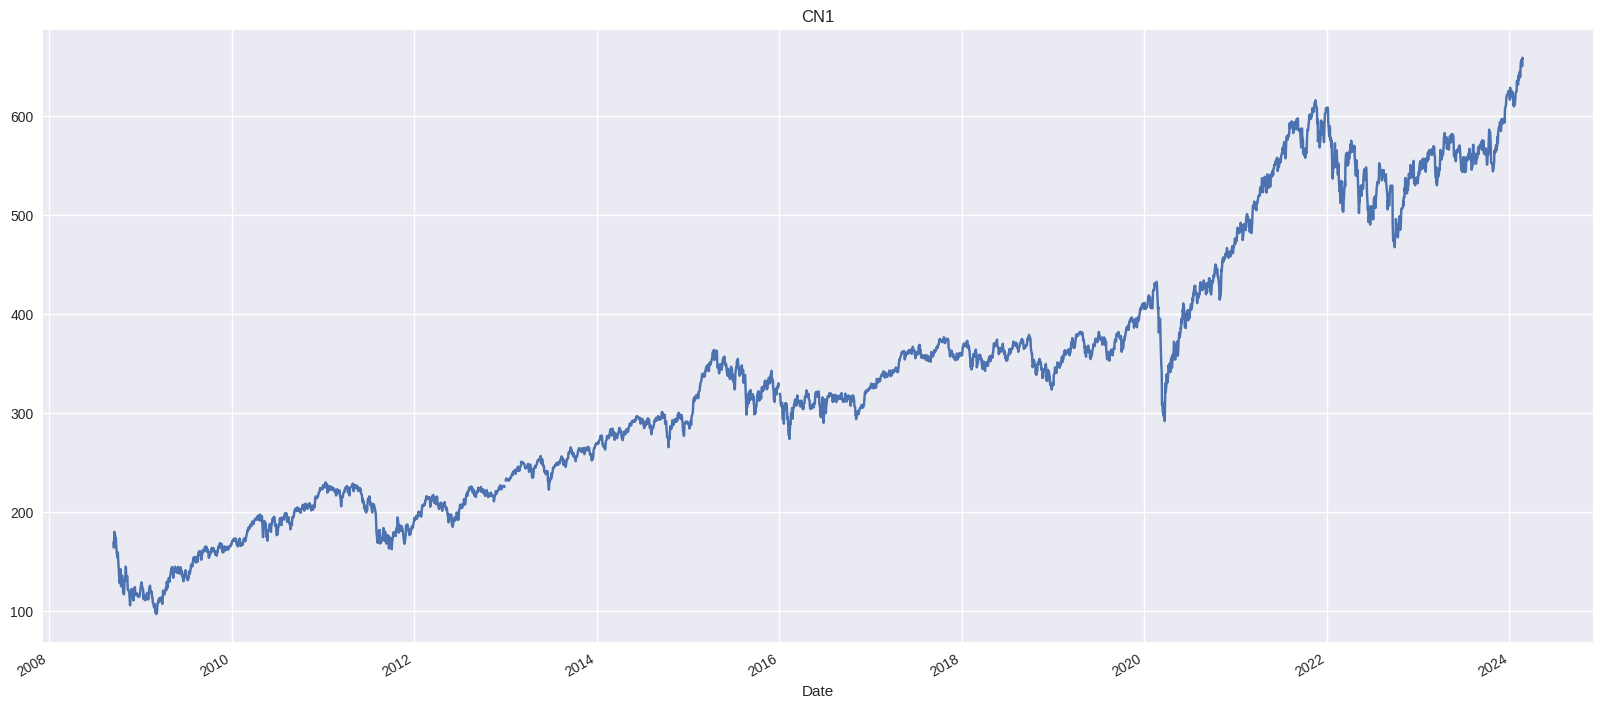

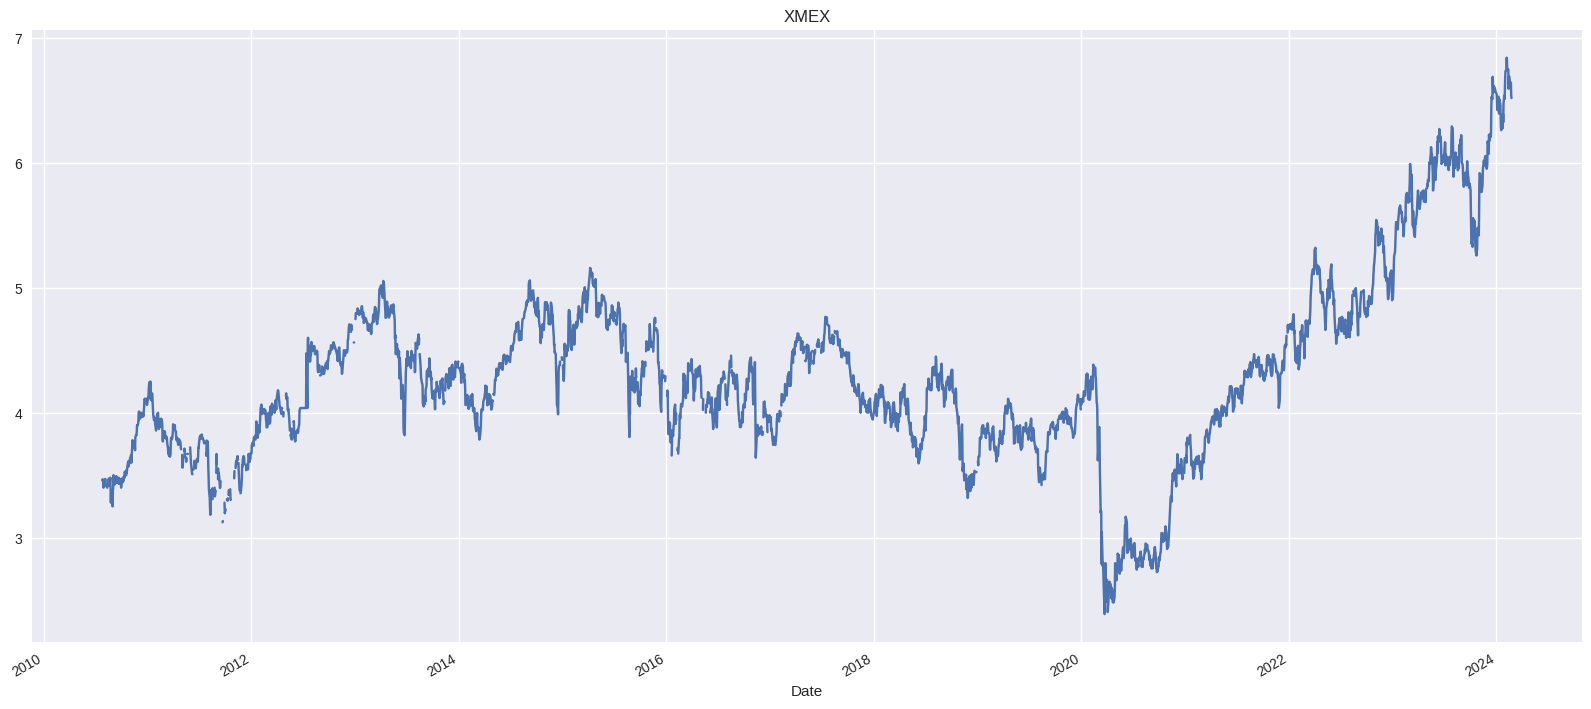

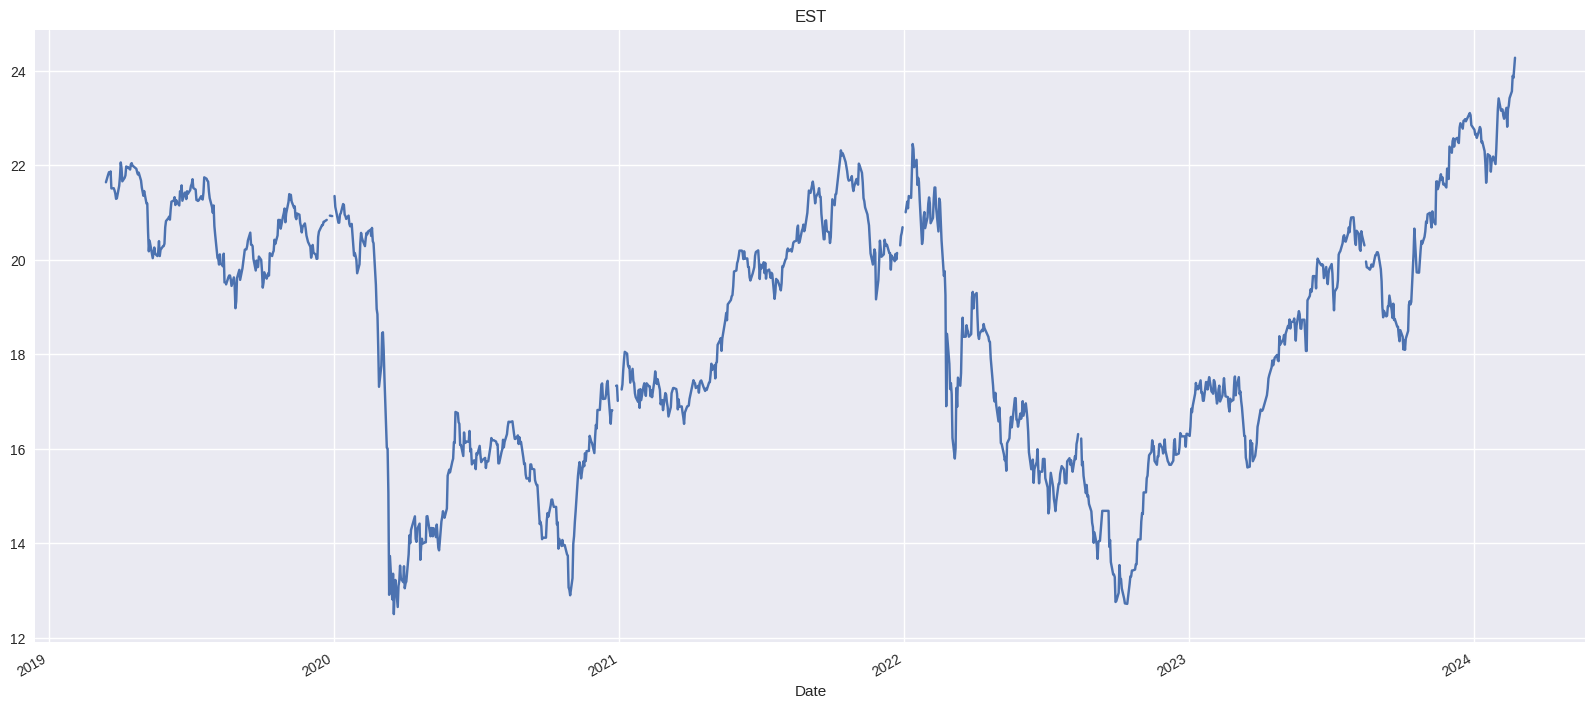

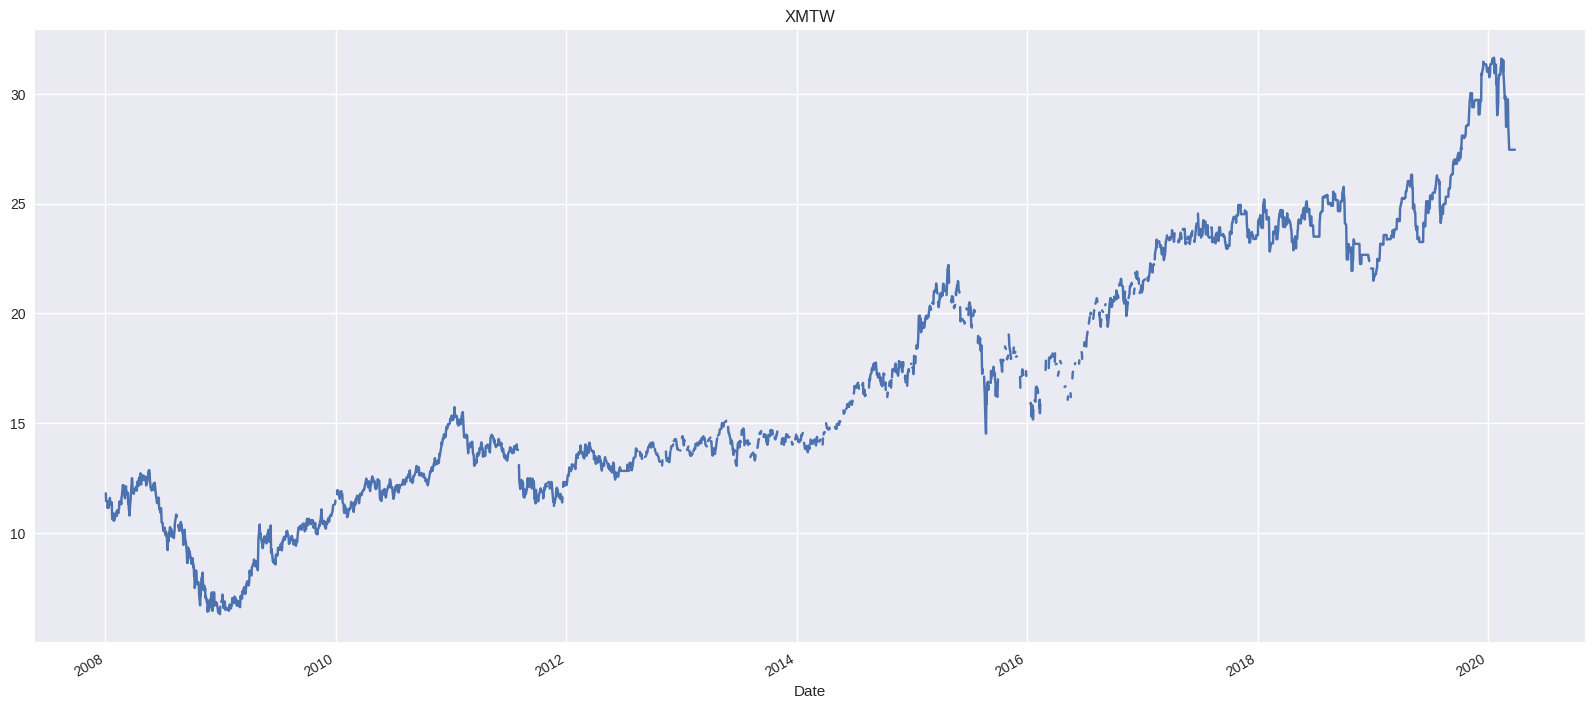

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

CSCA -> da 3-2010

SW2CHB -> da 1-2017




In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "CSCA" in dati.columns:
  dati["CSCA"].loc[:pd.to_datetime("2010-03-01")]=np.nan
if "SW2CHB" in dati.columns:
  dati["SW2CHB"].loc[:pd.to_datetime("2017-01-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

Ticker
CSSPX     0.162323
EXS1      0.074668
SJPA      0.090407
UKGBPB    0.083575
SW2CHB    0.091424
R2US      0.103286
CSCA      0.058341
C40       0.079391
SAUS      0.085350
FLXK      0.100294
BRA       0.081077
CN1       0.115885
XMEX      0.076555
EST       0.055913
XMTW      0.074801
dtype: float64

<Axes: xlabel='Ticker', ylabel='Ticker'>

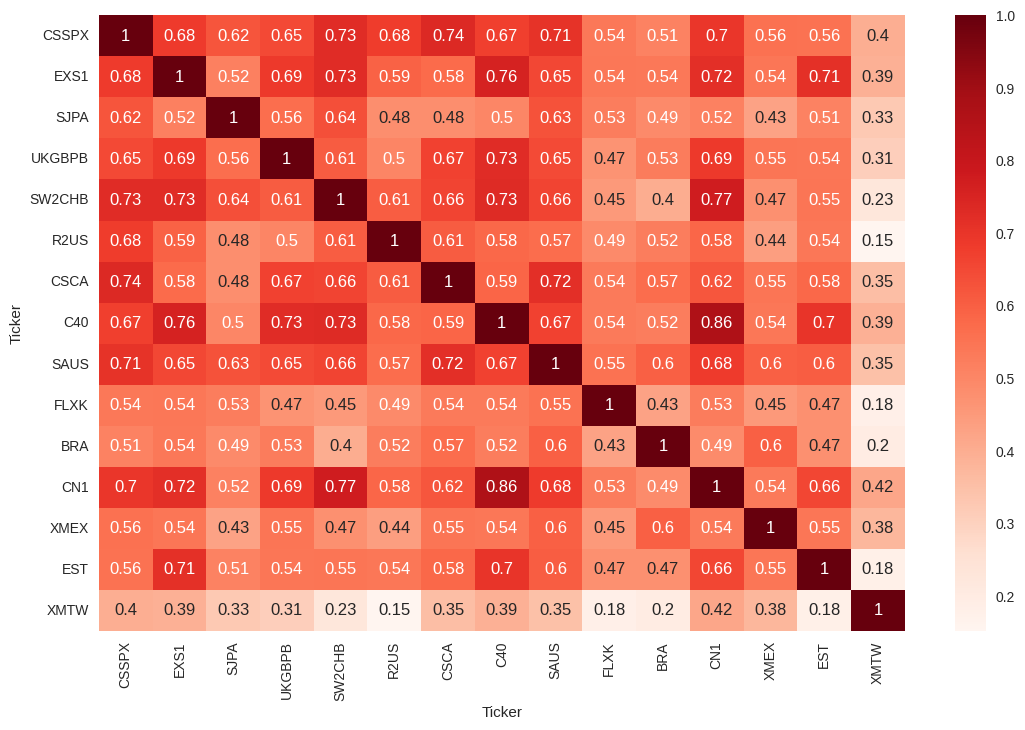

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 210.0
3 2730.0
4 32760.0
5 360360.0
6 3603600.0
7 32432400.0
8 259459200.0
9 1816214400.0
10 10897286400.0
11 54486432000.0
12 217945728000.0
13 653837184000.0
14 1307674368000.0


<ipython-input-37-db9c0b8d2220>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x=np.math.factorial(len(dati.columns))
<ipython-input-37-db9c0b8d2220>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(i,x/np.math.factorial(len(dati.columns)-i))


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


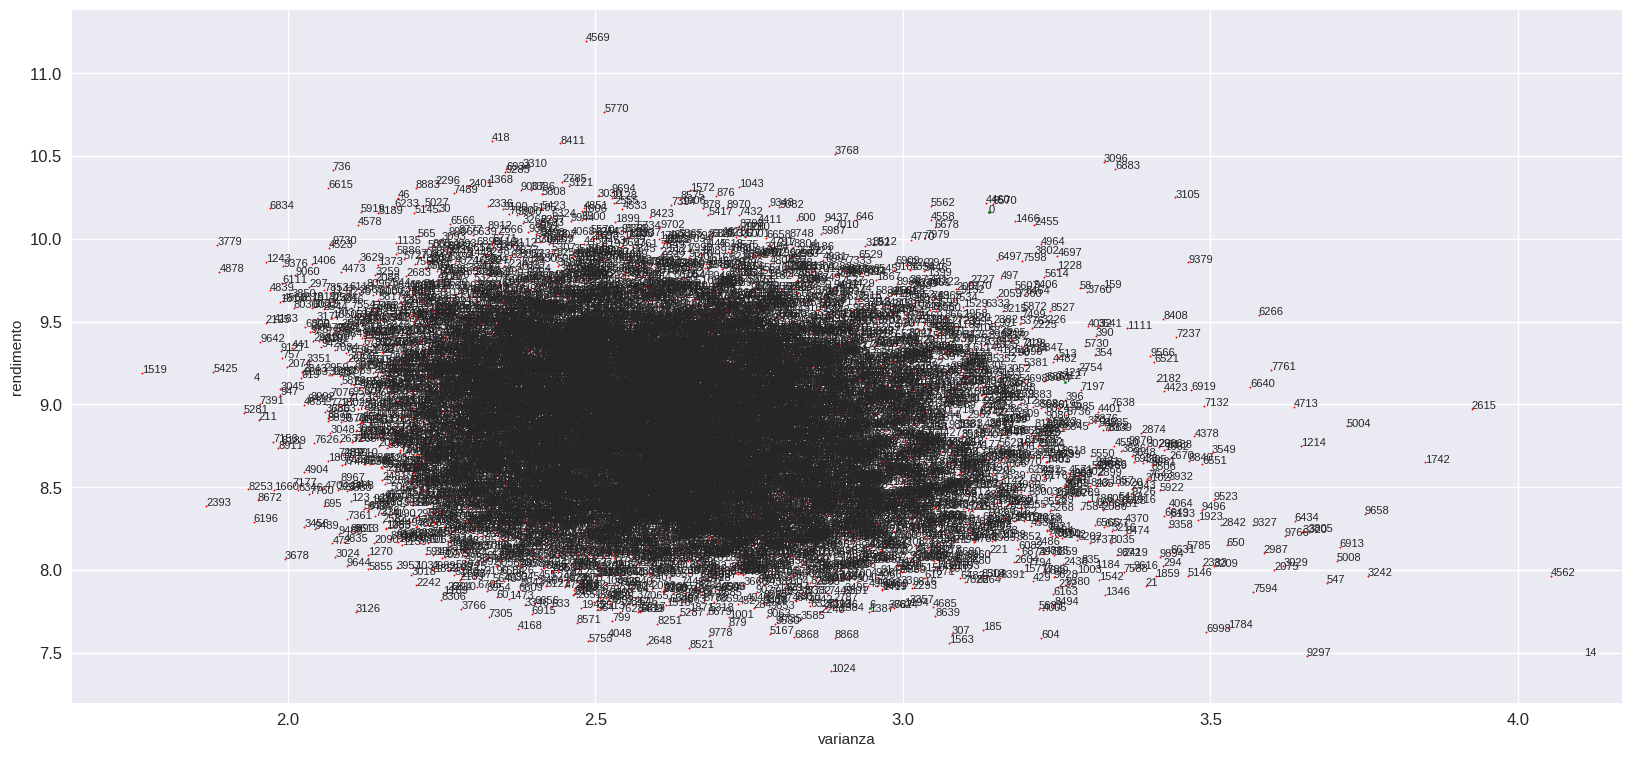

In [ ]:
ax = tabella.loc[len(dati.columns):].plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella.loc[:len(dati.columns)].plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares Core S&P 500  \
0    16.232309   2.630595      6.170585                 100.0   
1     7.466758   4.722218      1.581197                   0.0   
2     9.040661   3.035803      2.978013                   0.0   
3     8.357466   2.731229      3.059965                   0.0   
4     9.142367   1.944223      4.702323                   0.0   
5    10.328633   4.885155      2.114290                   0.0   
6     5.834135   3.927341      1.485518                   0.0   
7     7.939096   5.036191      1.576409                   0.0   
8     8.535024   4.405228      1.937476                   0.0   
9    10.029355   5.682922      1.764824                   0.0   
10    8.107748  12.390276      0.654364                   0.0   
11   11.588480   4.579654      2.530427                   0.0   
12    7.655545   5.526327      1.385286                   0.0   
13    5.591280   6.235954      0.896620                   0.0   
14    7.480117   4.106892      1.821357                   0.0   

    iShares Core DAX  iShares Core MSCI Japan IMI  UBS ETF (LU) MSCI UK  \
0                0.0                          0.0                   0.0   
1              100.0                          0.0                   0.0   
2                0.0                        100.0                   0.0   
3                0.0                          0.0                 100.0   
4                0.0                          0.0                   0.0   
5                0.0                          0.0                   0.0   
6                0.0                          0.0                   0.0   
7                0.0                          0.0                   0.0   
8                0.0                          0.0                   0.0   
9                0.0                          0.0                   0.0   
10               0.0                          0.0                   0.0   
11               0.0                          0.0                   0.0   
12               0.0                          0.0                   0.0   
13               0.0                          0.0                   0.0   
14               0.0                          0.0                   0.0   

    UBS ETF (LU) MSCI Switzerland 20/35  SPDR Russell 2000 US Small Cap  \
0                                   0.0                             0.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             0.0   
4                                 100.0                             0.0   
5                                   0.0                           100.0   
6                                   0.0                             0.0   
7                                   0.0                             0.0   
8                                   0.0                             0.0   
9                                   0.0                             0.0   
10                                  0.0                             0.0   
11                                  0.0                             0.0   
12                                  0.0                             0.0   
13                                  0.0                             0.0   
14                                  0.0                             0.0   

    iShares MSCI Canada  Amundi CAC 40  iShares MSCI Australia  \
0                   0.0            0.0                     0.0   
1                   0.0            0.0                     0.0   
2                   0.0            0.0                     0.0   
3                   0.0            0.0                     0.0   
4                   0.0            0.0                     0.0   
5                   0.0            0.0                     0.0   
6                 100.0            0.0                     0.0   
7                   0.0          

In [ ]:
tabella.loc[7888]

rendimento                              9.445885
varianza                                2.570884
quasi Sharpe                            3.674177
iShares Core S&P 500                   12.785773
iShares Core DAX                       12.830151
iShares Core MSCI Japan IMI            12.376363
UBS ETF (LU) MSCI UK                    5.229198
UBS ETF (LU) MSCI Switzerland 20/35     0.117945
SPDR Russell 2000 US Small Cap         12.773994
iShares MSCI Canada                     1.487645
Amundi CAC 40                          10.032990
iShares MSCI Australia                  2.363978
Franklin FTSE Korea                     3.196443
Lyxor MSCI Brazil                      10.551918
Amundi MSCI Nordic                      2.183453
Xtrackers MSCI Mexico                   0.676927
Lyxor MSCI Eastern Europe ex Russia     2.197356
Xtrackers MSCI Taiwan                  11.195867
Name: 7888, dtype: float64

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(4569,
 rendimento                             11.193859
 varianza                                2.485066
 quasi Sharpe                            4.504451
 iShares Core S&P 500                   21.892066
 iShares Core DAX                        0.158762
 iShares Core MSCI Japan IMI             2.668176
 UBS ETF (LU) MSCI UK                    0.377959
 UBS ETF (LU) MSCI Switzerland 20/35    16.533869
 SPDR Russell 2000 US Small Cap          1.483227
 iShares MSCI Canada                     3.121020
 Amundi CAC 40                           3.282067
 iShares MSCI Australia                  4.526145
 Franklin FTSE Korea                    18.939733
 Lyxor MSCI Brazil                       1.378032
 Amundi MSCI Nordic                     23.571304
 Xtrackers MSCI Mexico                   0.019543
 Lyxor MSCI Eastern Europe ex Russia     1.887212
 Xtrackers MSCI Taiwan                   0.160886
 Name: 4569, dtype: float64)

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(1519,
 rendimento                              9.190025
 varianza                                1.762770
 quasi Sharpe                            5.213402
 iShares Core S&P 500                    6.212444
 iShares Core DAX                        0.471735
 iShares Core MSCI Japan IMI            14.891119
 UBS ETF (LU) MSCI UK                   15.219221
 UBS ETF (LU) MSCI Switzerland 20/35    15.550675
 SPDR Russell 2000 US Small Cap         13.481902
 iShares MSCI Canada                     4.911021
 Amundi CAC 40                           0.252128
 iShares MSCI Australia                  0.338719
 Franklin FTSE Korea                     4.852452
 Lyxor MSCI Brazil                       0.271750
 Amundi MSCI Nordic                      3.141809
 Xtrackers MSCI Mexico                   2.103103
 Lyxor MSCI Eastern Europe ex Russia     1.284142
 Xtrackers MSCI Taiwan                  17.017780
 Name: 1519, dtype: float64)

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(3779,
 rendimento                              9.964466
 varianza                                1.884840
 quasi Sharpe                            5.286639
 iShares Core S&P 500                   15.687421
 iShares Core DAX                        0.533111
 iShares Core MSCI Japan IMI             3.428605
 UBS ETF (LU) MSCI UK                   14.870788
 UBS ETF (LU) MSCI Switzerland 20/35    13.780008
 SPDR Russell 2000 US Small Cap         12.324172
 iShares MSCI Canada                     4.132006
 Amundi CAC 40                           2.984841
 iShares MSCI Australia                  1.284156
 Franklin FTSE Korea                     9.412644
 Lyxor MSCI Brazil                       0.049595
 Amundi MSCI Nordic                      3.956773
 Xtrackers MSCI Mexico                   1.083788
 Lyxor MSCI Eastern Europe ex Russia     0.879725
 Xtrackers MSCI Taiwan                  15.592367
 Name: 3779, dtype: float64)

# Analisi su ETF per asset class

In [ ]:
etf=[["iShares MSCI North America","INAA"],["iShares STOXX Europe 600","EXSA"],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC"],["iShares MSCI China A","36BZ"],
     ["Vanguard USD Treasury Bond","VDTA"],
     ["Xtrackers Eurozone Government Bond","XGLE"],["iShares Euro Inflation Linked Government Bond","IBCI"],["Xtrackers II EUR Corporate Bond","XBLC"],
     ["Invesco Physical Gold","SGLD"],["Invesco Bloomberg Commodity","CMOD"],["ETC Group Physical Bitcoin","BTCE"],
     ["iShares Developed Markets Property Yield","IWDP"]]

nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]

In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BTCE.MI', '36BZ.MI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
7 Failed downloads:
ERROR:yfinance:['SGLD.F', 'BTCE.F', 'CMOD.F', 'IWDP.F', 'VDTA.F', 'INAA.F', 'XBLC.F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
9 Failed downloads:
ERROR:yfinance:['XBLC.PA', 'EXSA.PA', '36BZ.PA', 'VDTA.PA', 'XGLE.PA', 'EMXC.PA', 'SGLD.PA', 'CMOD.PA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['INAA.PA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-03-19 -> 2024-02-24)')


In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati

Ticker           INAA       EXSA       EMXC    36BZ       VDTA        XGLE  \
Date                                                                         
2005-11-21        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-22        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-23        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-24        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-25        NaN        NaN        NaN     NaN        NaN         NaN   
...               ...        ...        ...     ...        ...         ...   
2024-02-19  86.209999  48.695000  23.584999  3.7070  23.150000  212.949997   
2024-02-20  85.220001  48.645000  23.504999  3.7035  23.115000  213.660004   
2024-02-21  85.059998  48.544998  23.469999  3.7560  23.075001  212.470001   
2024-02-22  86.720001  49.009998  23.635000  3.7820  23.040001  212.850006   
2024-02-23  87.050003  49.165001  23.540001  3.7885  23.110001  214.059998   

Ticker            IBCI        XBLC        SGLD       CMOD       BTCE  \
Date                                                                   
2005-11-21  155.800003         NaN         NaN        NaN        NaN   
2005-11-22  155.800003         NaN         NaN        NaN        NaN   
2005-11-23  157.600006         NaN         NaN        NaN        NaN   
2005-11-24  158.500000         NaN         NaN        NaN        NaN   
2005-11-25  159.100006         NaN         NaN        NaN        NaN   
...                ...         ...         ...        ...        ...   
2024-02-19  223.839996  149.630005  180.800003  19.986000  44.891998   
2024-02-20  224.119995  149.910004  181.059998  19.812000  44.321999   
2024-02-21  222.630005  149.419998  180.649994  19.983999  43.832001   
2024-02-22  223.339996  149.639999  180.399994  19.962000  44.127998   
2024-02-23  224.500000  149.990005  181.289993  19.809999  43.613998   

Ticker           IWDP  
Date                   
2005-11-21        NaN  
2005-11-22        NaN  
2005-11-23        NaN  
2005-11-24        NaN  
2005-11-25        NaN  
...               ...  
2024-02-19  20.379999  
2024-02-20  20.295000  
2024-02-21  20.365000  
2024-02-22  20.434999  
2024-02-23  20.395000  

[4567 rows x 12 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4567 entries, 2005-11-21 to 2024-02-23
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INAA    4086 non-null   float64
 1   EXSA    4070 non-null   float64
 2   EMXC    1183 non-null   float64
 3   36BZ    2259 non-null   float64
 4   VDTA    1278 non-null   float64
 5   XGLE    3816 non-null   float64
 6   IBCI    4560 non-null   float64
 7   XBLC    2645 non-null   float64
 8   SGLD    2320 non-null   float64
 9   CMOD    1807 non-null   float64
 10  BTCE    705 non-null    float64
 11  IWDP    4140 non-null   float64
dtypes: float64(12)
memory usage: 592.9 KB


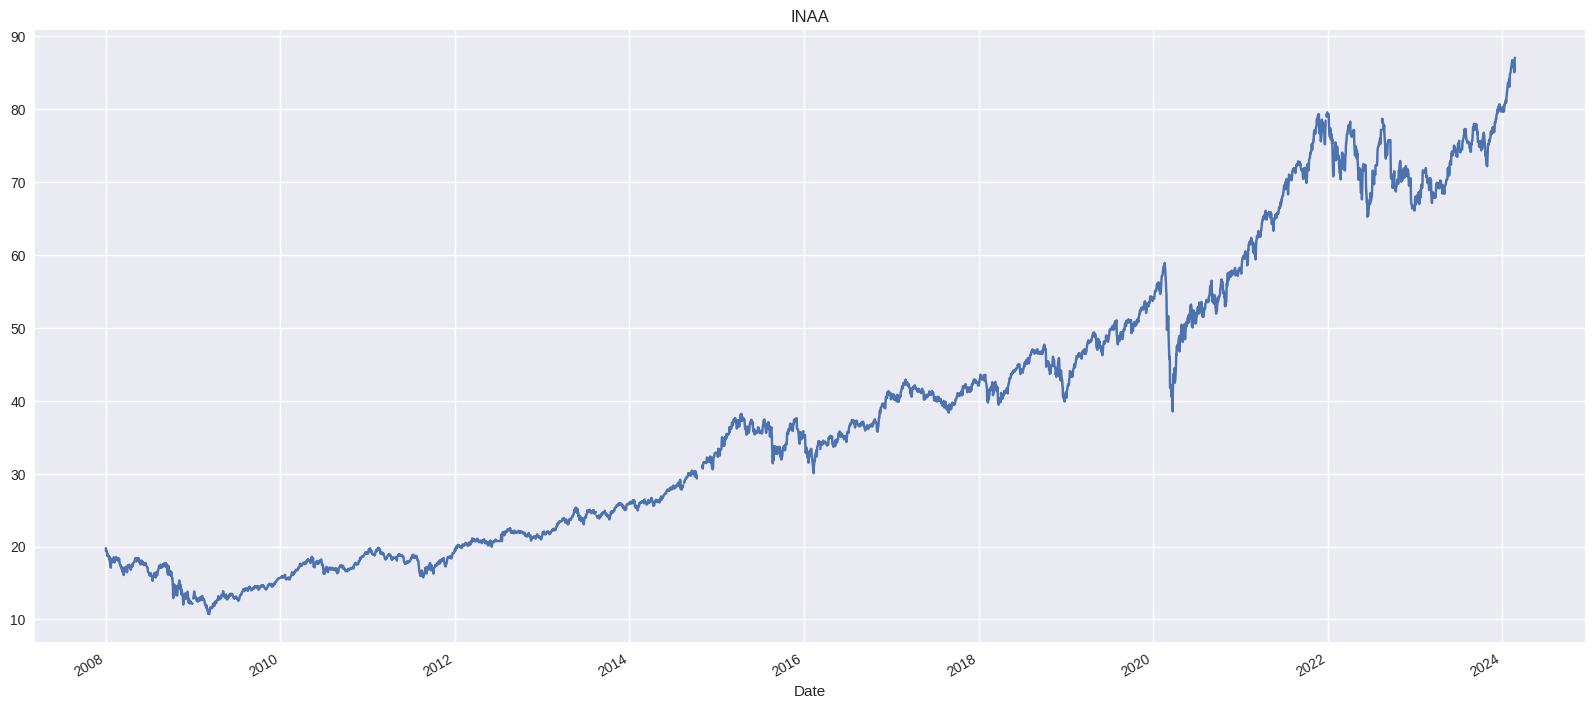

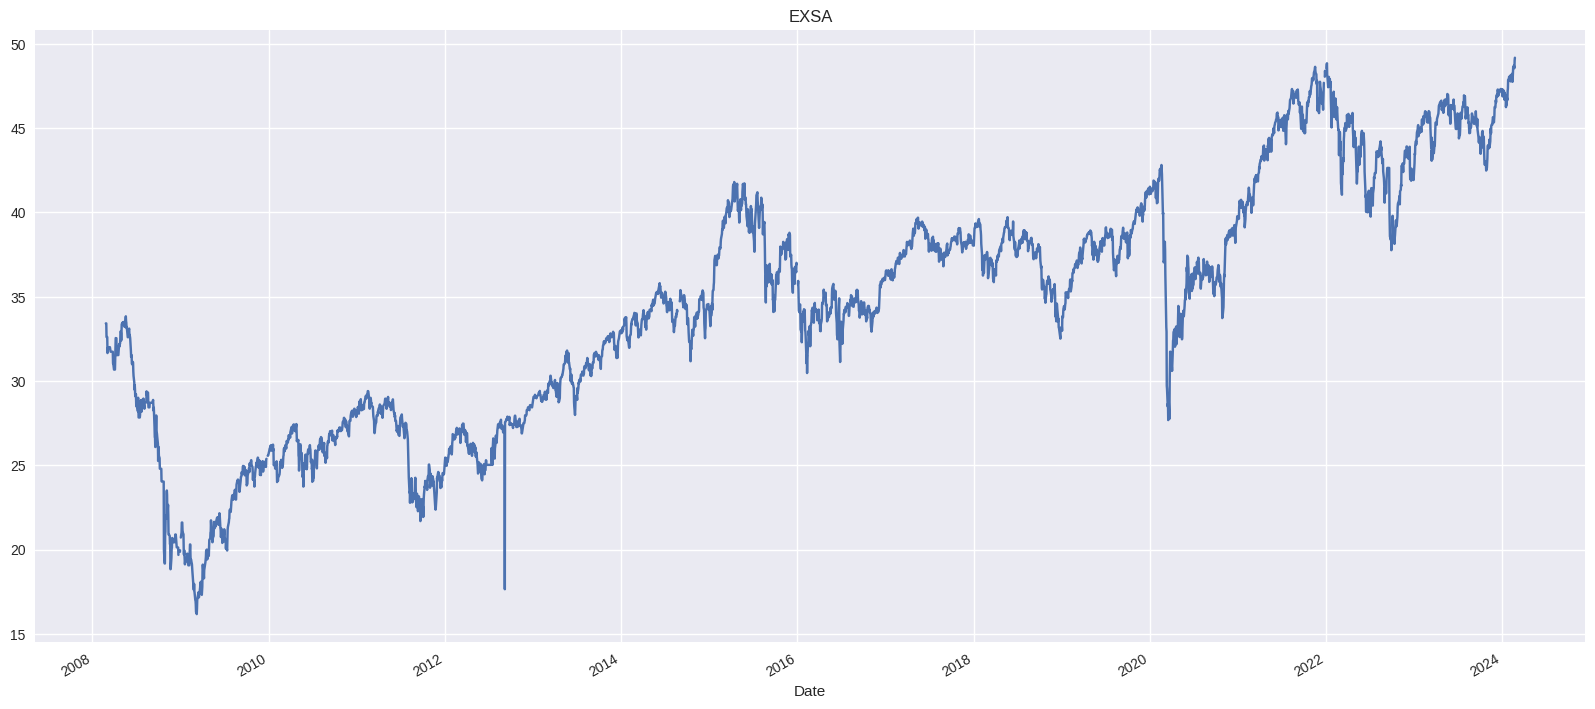

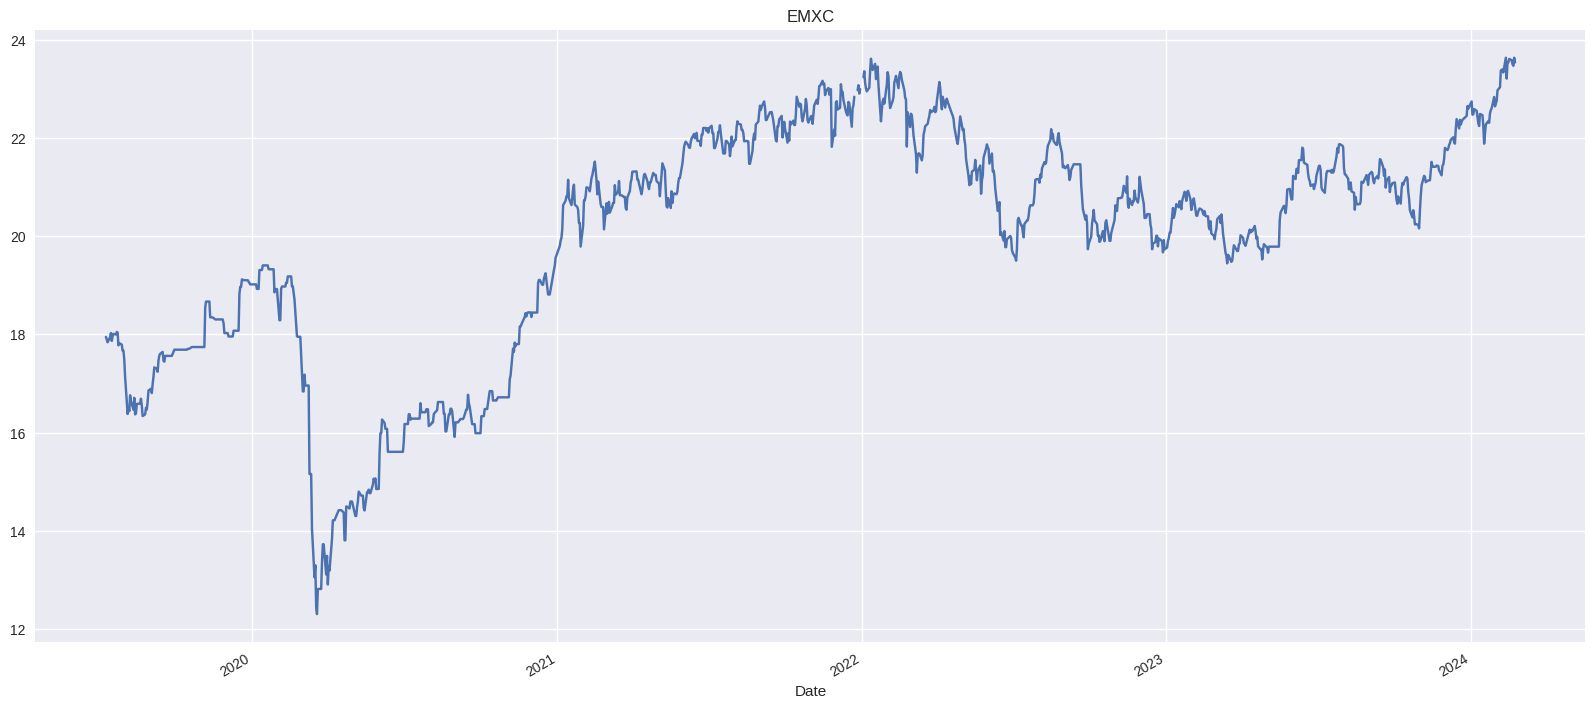

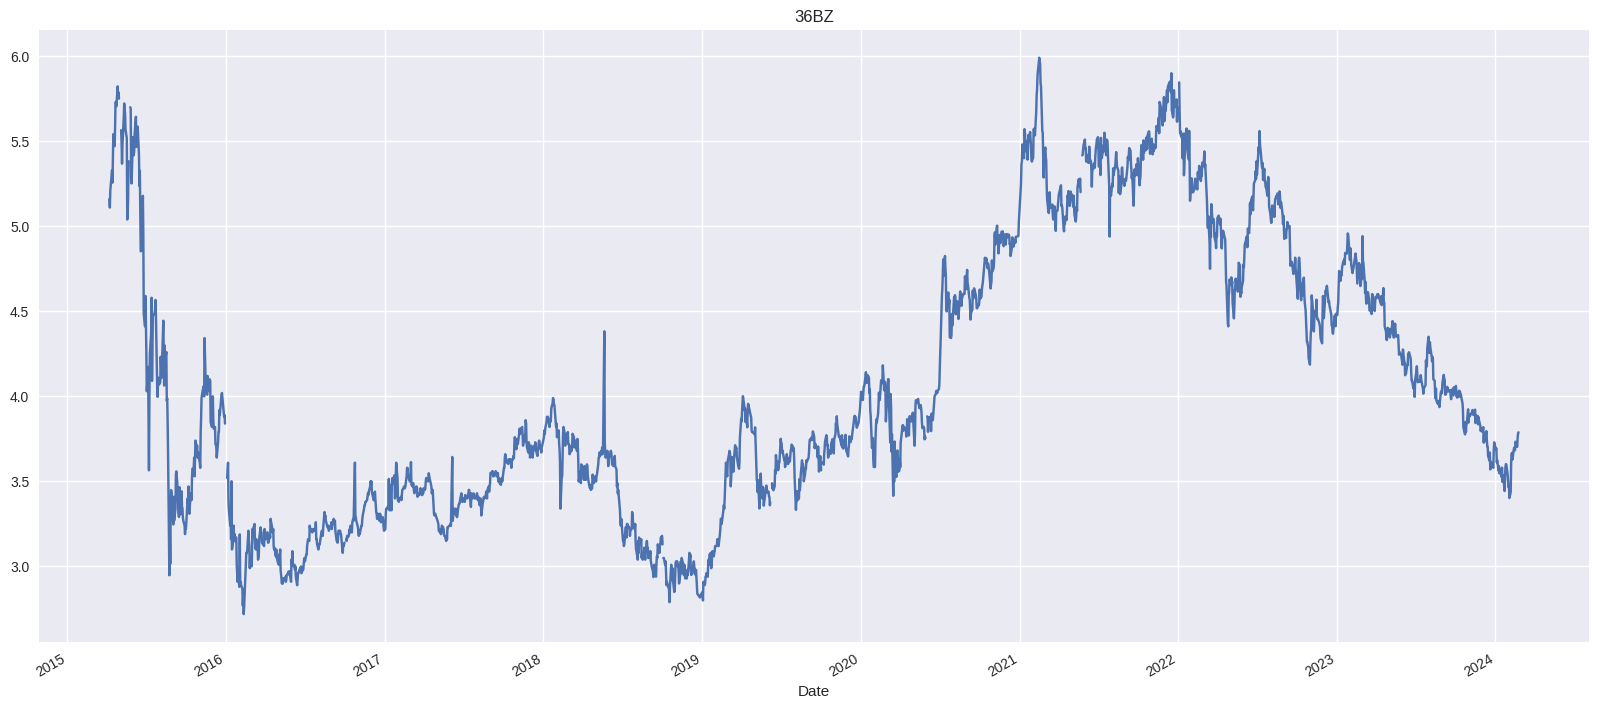

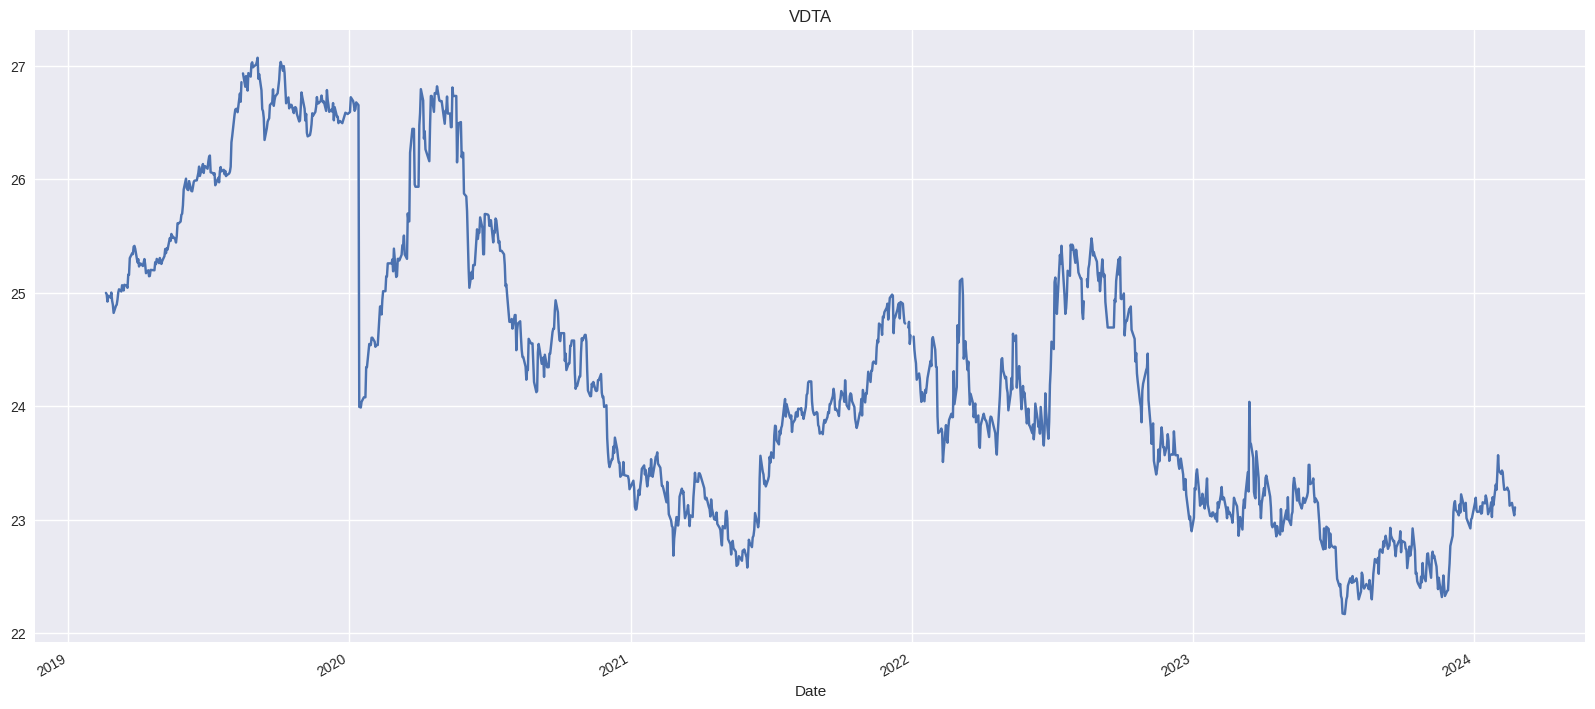

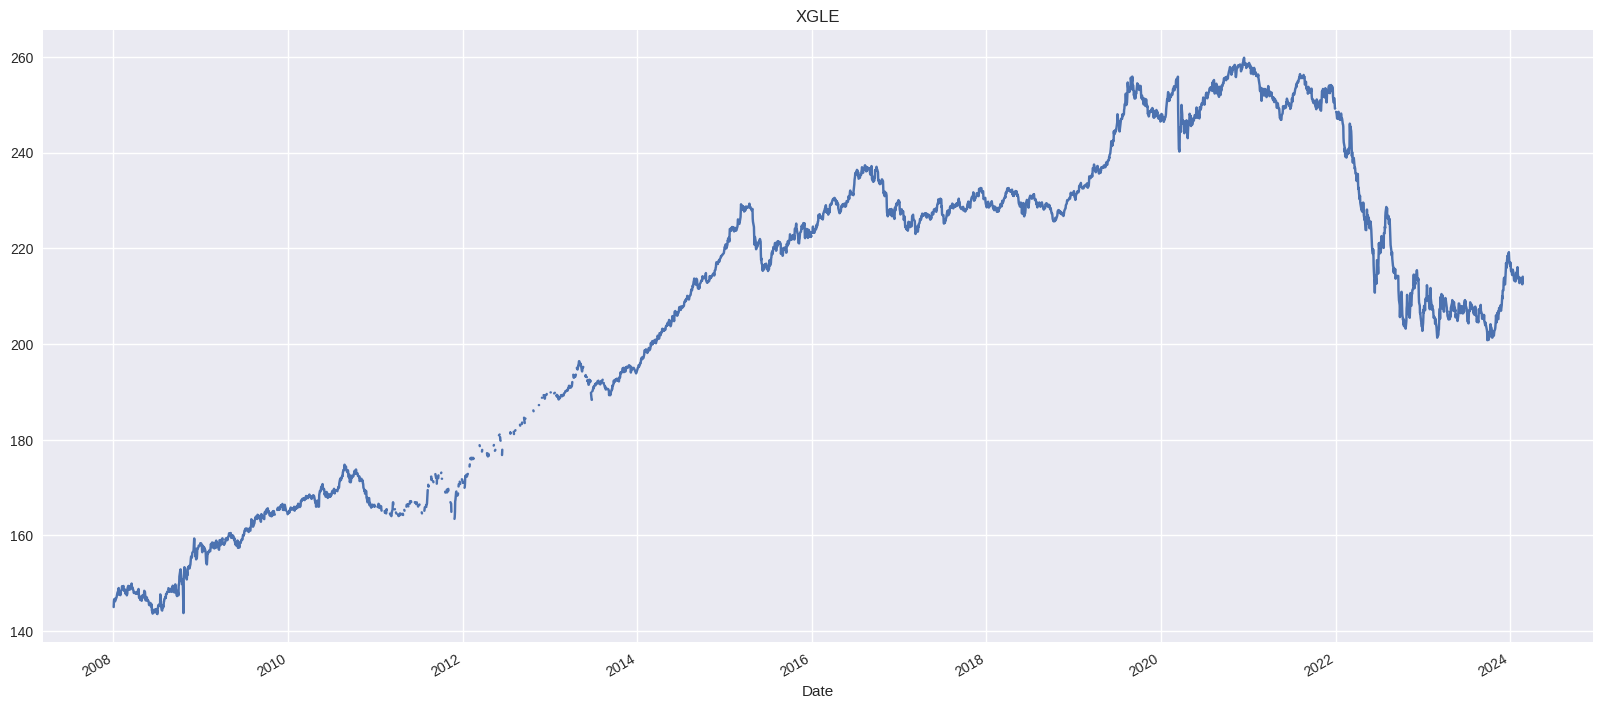

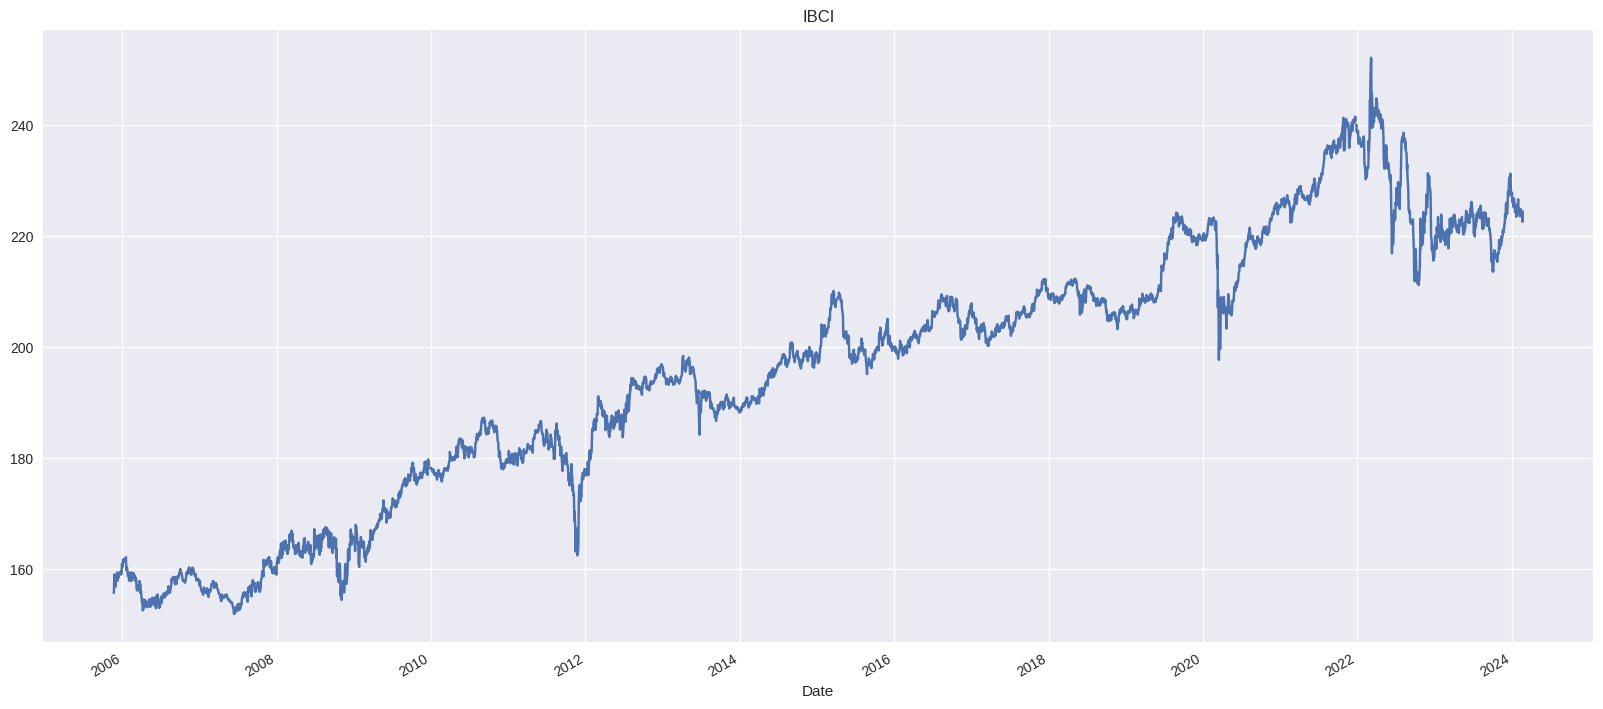

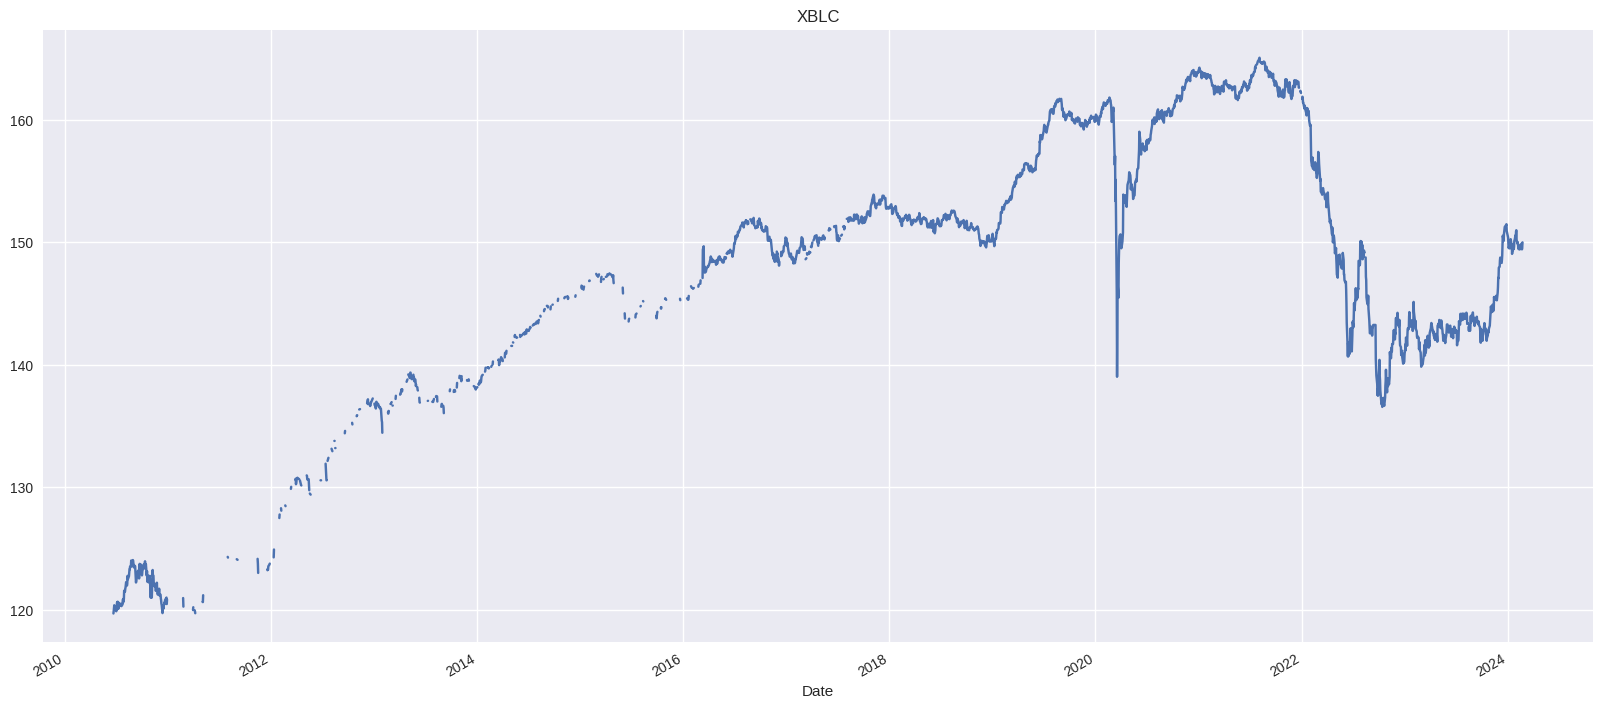

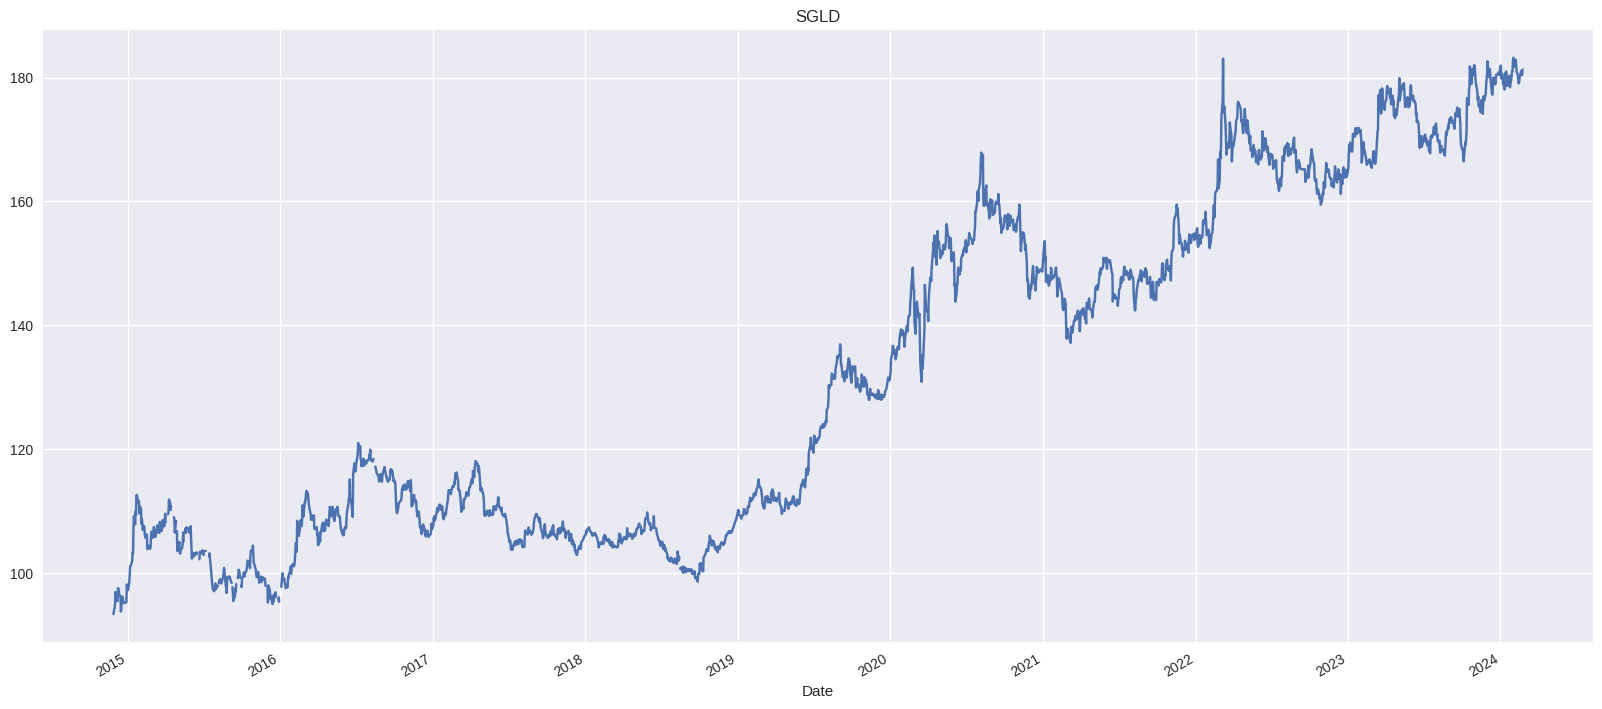

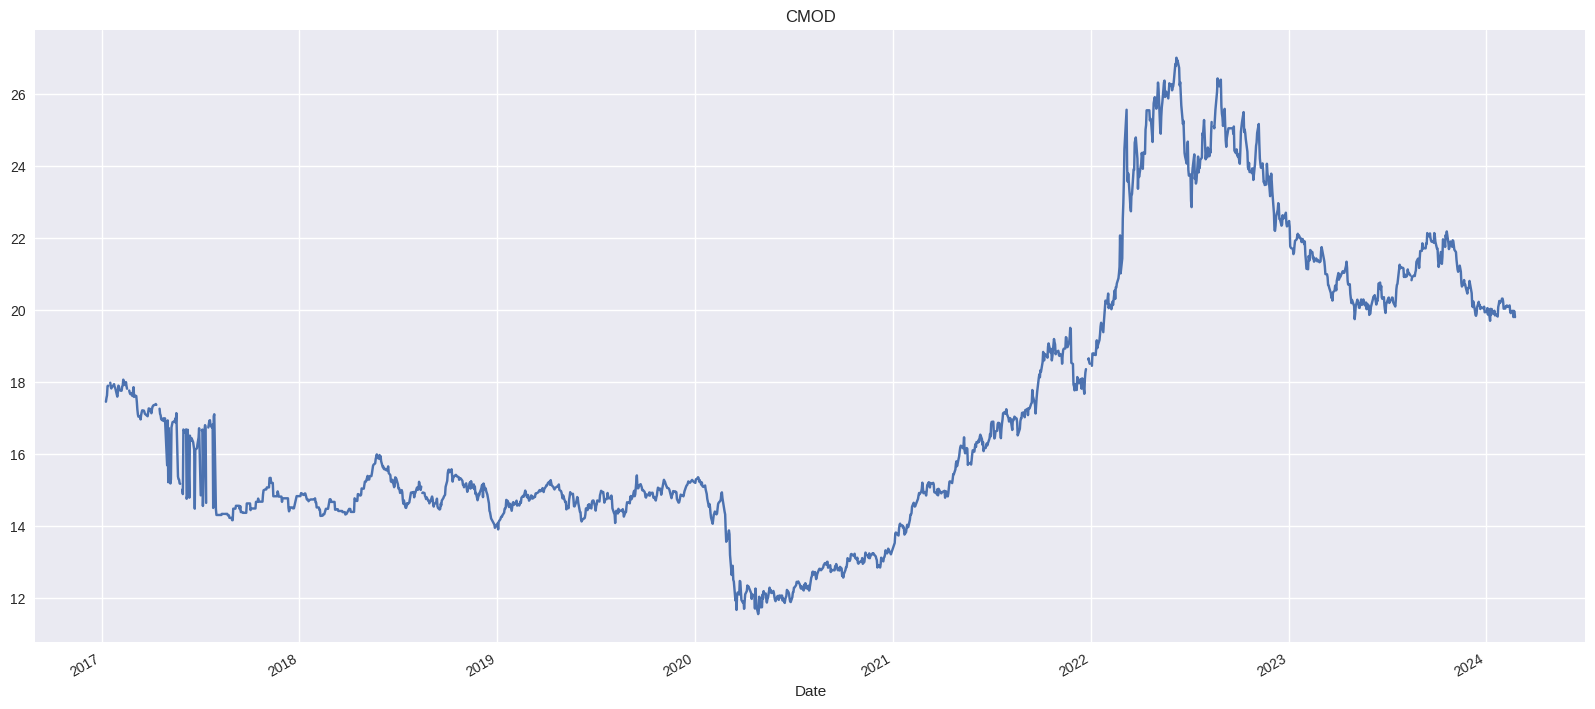

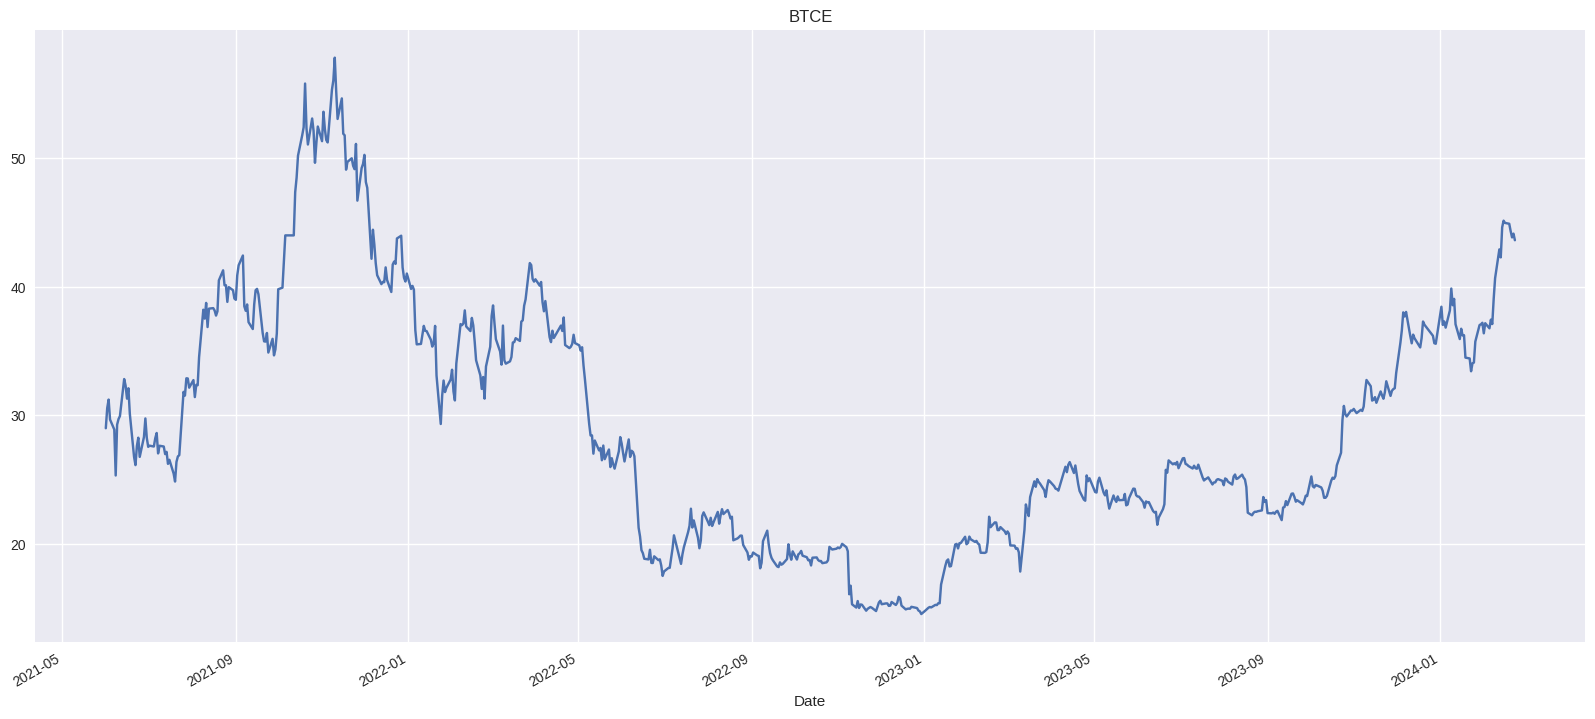

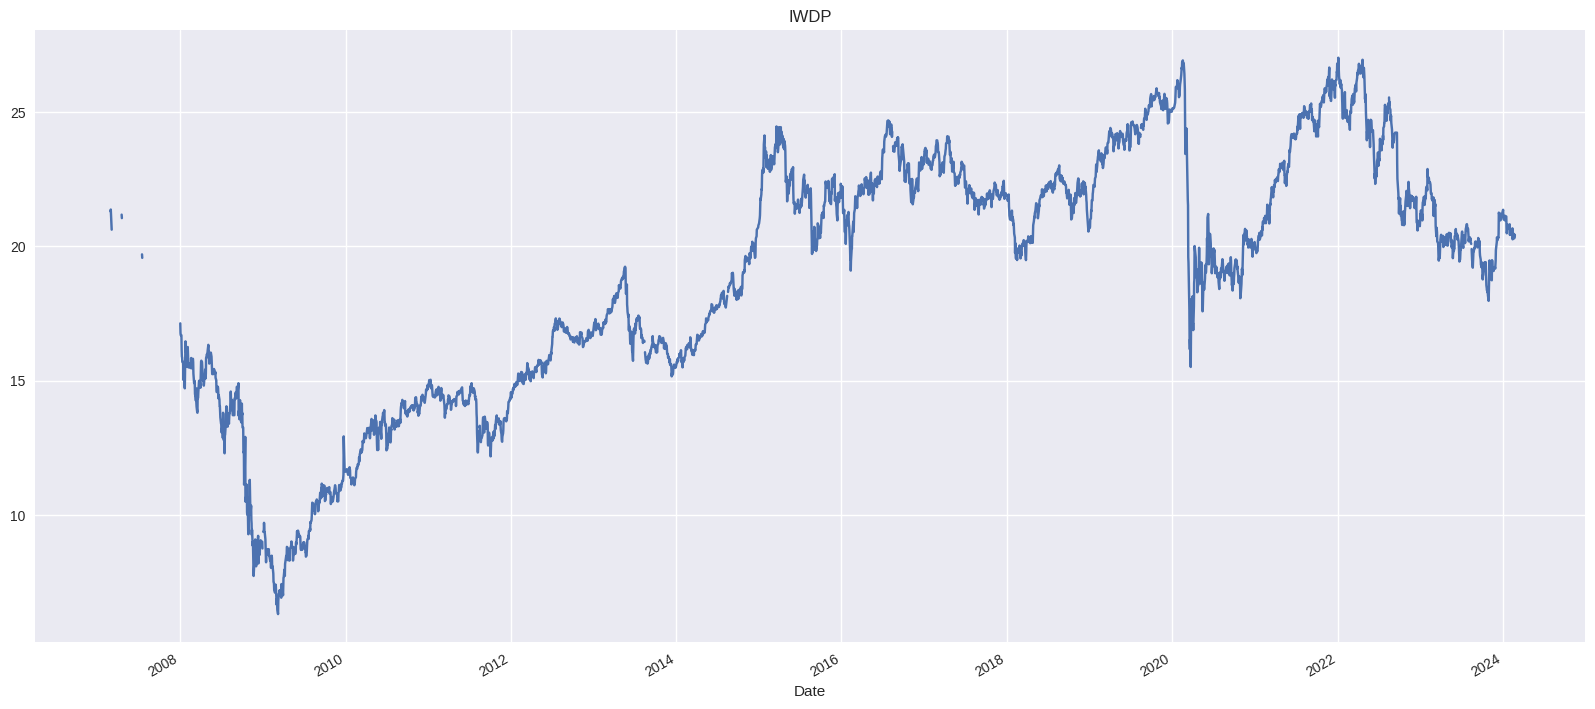

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

EXSA -> da 1-2013

CMOD -> da 9-2017



In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "EXSA" in dati.columns:
  dati["EXSA"].loc[:pd.to_datetime("2013-01-01")]=np.nan
if "CMOD" in dati.columns:
  dati["CMOD"].loc[:pd.to_datetime("2017-09-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

Ticker
INAA    0.114367
EXSA    0.062291
EMXC    0.076491
36BZ    0.037587
VDTA   -0.011217
XGLE    0.025653
IBCI    0.022736
XBLC    0.017427
SGLD    0.082711
CMOD    0.061386
BTCE    0.368814
IWDP    0.018306
dtype: float64

<Axes: xlabel='Ticker', ylabel='Ticker'>

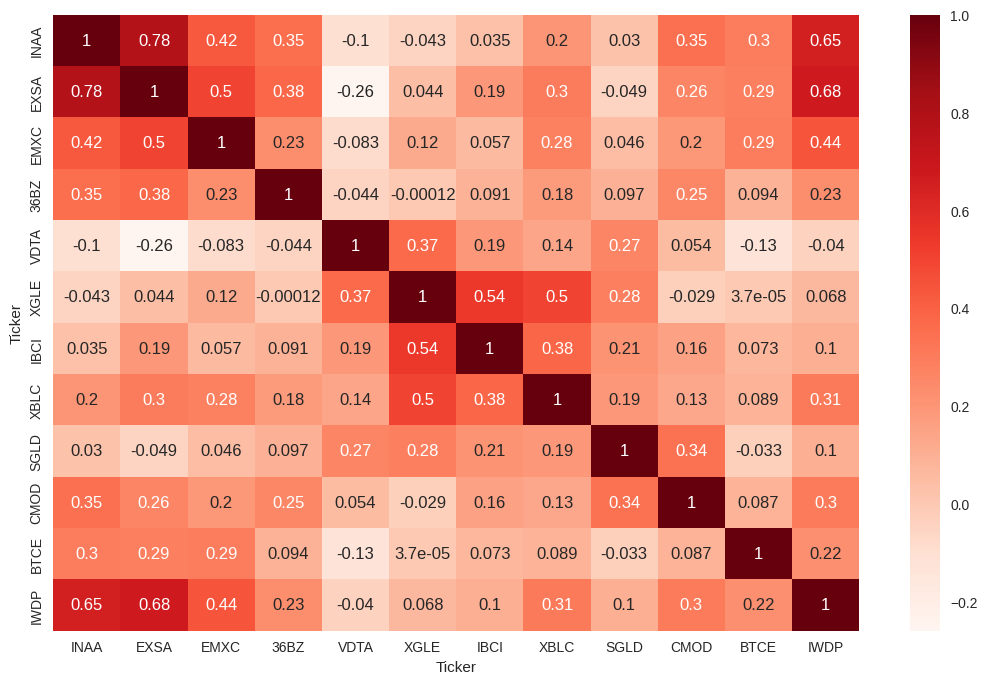

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 132.0
3 1320.0
4 11880.0
5 95040.0
6 665280.0
7 3991680.0
8 19958400.0
9 79833600.0
10 239500800.0
11 479001600.0


<ipython-input-57-db9c0b8d2220>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x=np.math.factorial(len(dati.columns))
<ipython-input-57-db9c0b8d2220>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(i,x/np.math.factorial(len(dati.columns)-i))


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


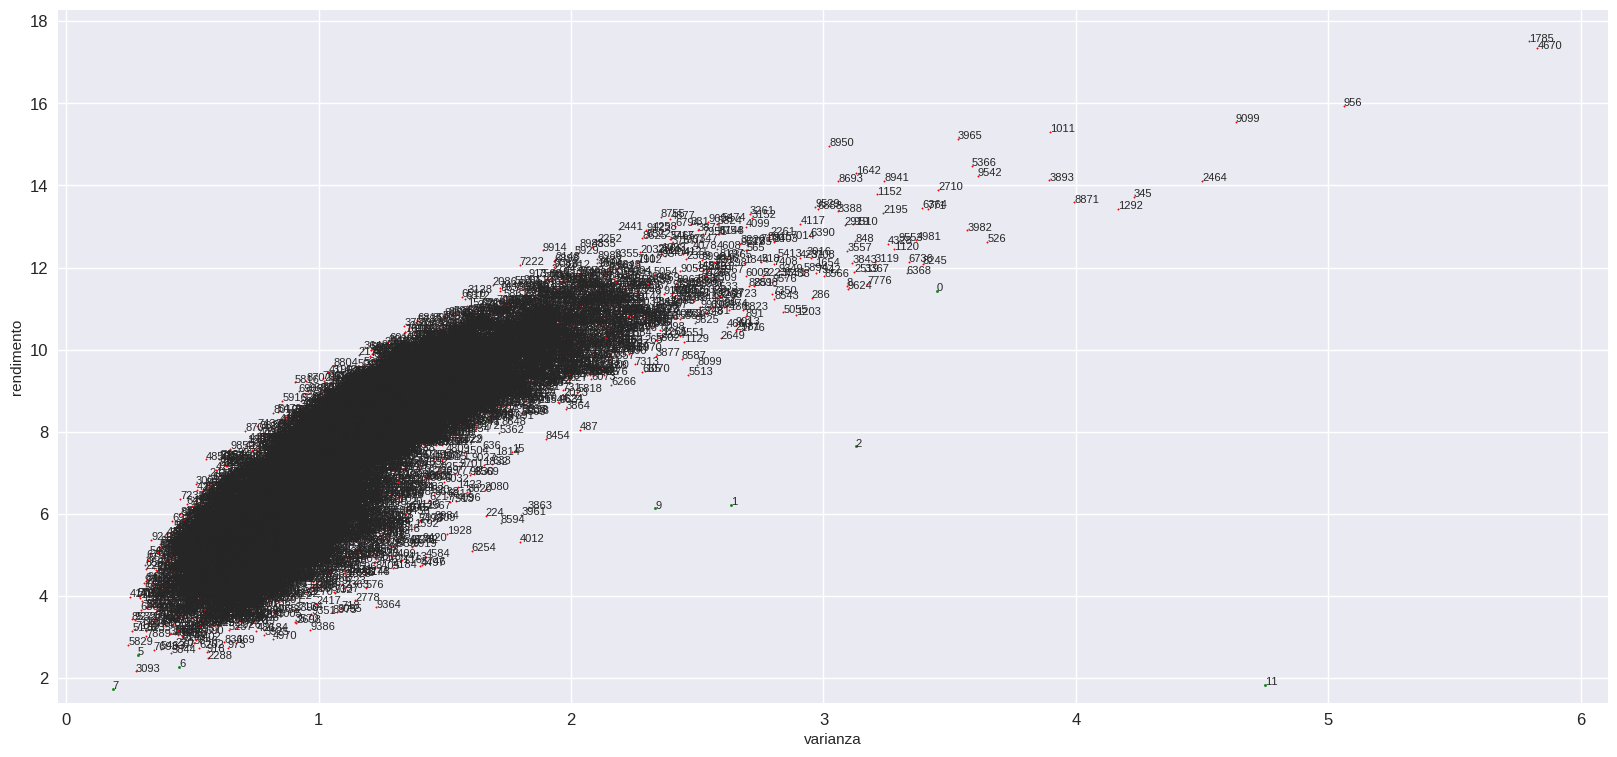

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares MSCI North America  \
0    11.436716   3.449288      3.315675                       100.0   
1     6.229083   2.634845      2.364117                         0.0   
2     7.649105   3.128401      2.445053                         0.0   
3     3.758715   6.286285      0.597923                         0.0   
4    -1.121682   0.834083     -1.344809                         0.0   
5     2.565337   0.283843      9.037876                         0.0   
6     2.273632   0.447725      5.078184                         0.0   
7     1.742691   0.183987      9.471825                         0.0   
8     8.271085   1.662605      4.974774                         0.0   
9     6.138587   2.333600      2.630523                         0.0   
10   36.881417  33.531365      1.099908                         0.0   
11    1.830626   4.748566      0.385511                         0.0   

    iShares STOXX Europe 600  Lyxor MSCI Emerging Markets Ex China  \
0                        0.0                                   0.0   
1                      100.0                                   0.0   
2                        0.0                                 100.0   
3                        0.0                                   0.0   
4                        0.0                                   0.0   
5                        0.0                                   0.0   
6                        0.0                                   0.0   
7                        0.0                                   0.0   
8                        0.0                                   0.0   
9                        0.0                                   0.0   
10                       0.0                                   0.0   
11                       0.0                                   0.0   

    iShares MSCI China A  Vanguard USD Treasury Bond  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                  100.0                         0.0   
4                    0.0                       100.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   

    Xtrackers Eurozone Government Bond  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
5                                100.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   
9                                  0.0   
10                                 0.0   
11                                 0.0   

    iShares Euro Inflation Linked Government Bond  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
5                                             0.0   
6                                           100.0   
7                                             0.0   
8                                             0.0   
9                                             0.0   
10                                            0.0   
11                                            0.0   

    Xtrackers II EUR Corporate Bond  Invesco Physical Gold  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                

In [ ]:
tabella.loc[8083]

rendimento                                        3.447097
varianza                                          0.349100
quasi Sharpe                                      9.874226
iShares MSCI North America                        0.699376
iShares STOXX Europe 600                         16.979809
Lyxor MSCI Emerging Markets Ex China              1.683011
iShares MSCI China A                              8.741654
Vanguard USD Treasury Bond                        7.871748
Xtrackers Eurozone Government Bond               18.145434
iShares Euro Inflation Linked Government Bond    21.004542
Xtrackers II EUR Corporate Bond                  19.959321
Invesco Physical Gold                             2.718138
Invesco Bloomberg Commodity                       0.894776
ETC Group Physical Bitcoin                        0.986969
iShares Developed Markets Property Yield          0.315223
Name: 8083, dtype: float64

In [ ]:
tabella["rendimento"].idxmax(),tabella.loc[tabella["rendimento"].idxmax()]

(1785,
 rendimento                                       17.511084
 varianza                                          5.796661
 quasi Sharpe                                      3.020891
 iShares MSCI North America                       14.388100
 iShares STOXX Europe 600                          7.231360
 Lyxor MSCI Emerging Markets Ex China              1.791940
 iShares MSCI China A                              0.452681
 Vanguard USD Treasury Bond                        1.290776
 Xtrackers Eurozone Government Bond                8.229040
 iShares Euro Inflation Linked Government Bond     1.376380
 Xtrackers II EUR Corporate Bond                   9.176512
 Invesco Physical Gold                             6.020106
 Invesco Bloomberg Commodity                       3.218222
 ETC Group Physical Bitcoin                       38.003484
 iShares Developed Markets Property Yield          8.821400
 Name: 1785, dtype: float64)

In [ ]:
tabella["varianza"].idxmin(),tabella.loc[tabella["varianza"].idxmin()]

(5829,
 rendimento                                        2.820643
 varianza                                          0.246256
 quasi Sharpe                                     11.454087
 iShares MSCI North America                        2.079504
 iShares STOXX Europe 600                          6.920258
 Lyxor MSCI Emerging Markets Ex China              7.091128
 iShares MSCI China A                              1.311760
 Vanguard USD Treasury Bond                       24.788109
 Xtrackers Eurozone Government Bond               22.195237
 iShares Euro Inflation Linked Government Bond     4.368388
 Xtrackers II EUR Corporate Bond                  22.257715
 Invesco Physical Gold                             3.122597
 Invesco Bloomberg Commodity                       2.928620
 ETC Group Physical Bitcoin                        0.826466
 iShares Developed Markets Property Yield          2.110218
 Name: 5829, dtype: float64)

In [ ]:
tabella["quasi Sharpe"].idxmax(),tabella.loc[tabella["quasi Sharpe"].idxmax()]

(9245,
 rendimento                                        5.377431
 varianza                                          0.337723
 quasi Sharpe                                     15.922586
 iShares MSCI North America                        5.512924
 iShares STOXX Europe 600                          7.896092
 Lyxor MSCI Emerging Markets Ex China              1.743205
 iShares MSCI China A                              2.861875
 Vanguard USD Treasury Bond                        3.596222
 Xtrackers Eurozone Government Bond               29.408177
 iShares Euro Inflation Linked Government Bond    10.497725
 Xtrackers II EUR Corporate Bond                  10.276082
 Invesco Physical Gold                            22.400483
 Invesco Bloomberg Commodity                       2.805267
 ETC Group Physical Bitcoin                        2.289272
 iShares Developed Markets Property Yield          0.712676
 Name: 9245, dtype: float64)

# Il mio portafoglio

In [ ]:
etf=[["iShares MSCI North America","INAA"],["iShares STOXX Europe 600","EXSA"],
     ["Lyxor MSCI Emerging Markets Ex China","EMXC"],["iShares MSCI China A","36BZ"],
     ["Vanguard USD Treasury Bond","VDTA"],
     ["Xtrackers Eurozone Government Bond","XGLE"],["iShares Euro Inflation Linked Government Bond","IBCI"],["Xtrackers II EUR Corporate Bond","XBLC"],
     ["Invesco Physical Gold","SGLD"],["Invesco Bloomberg Commodity","CMOD"],["ETC Group Physical Bitcoin","BTCE"],
     ["iShares Developed Markets Property Yield","IWDP"]]

nomi=list(np.array(etf)[:,0])
tickers=list(np.array(etf)[:,1])
tickersMI=[t + ".MI" for t in tickers]
tickersF=[t + ".F" for t in tickers]
tickersPA=[t + ".PA" for t in tickers]

In [ ]:
datiMI=yf.download(tickersMI)["Adj Close"]
datiF=yf.download(tickersF)["Adj Close"]
datiPA=yf.download(tickersPA)["Adj Close"]

[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BTCE.MI', '36BZ.MI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
7 Failed downloads:
ERROR:yfinance:['SGLD.F', 'BTCE.F', 'INAA.F', 'CMOD.F', 'VDTA.F', 'XBLC.F', 'IWDP.F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  12 of 12 completed
ERROR:yfinance:
9 Failed downloads:
ERROR:yfinance:['XBLC.PA', 'EXSA.PA', '36BZ.PA', 'VDTA.PA', 'EMXC.PA', 'XGLE.PA', 'SGLD.PA', 'CMOD.PA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['INAA.PA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-03-19 -> 2024-02-24)')


In [ ]:
# rimetto a posto le colonne che non ho capito perché me le scombina
datiMI=datiMI.reindex(tickersMI, axis=1)
datiPA=datiPA.reindex(tickersPA, axis=1)
datiF=datiF.reindex(tickersF, axis=1)
# cambio i nomi alle colonne mettendoli uguali
datiMI.rename(columns = dict(zip(tickersMI, tickers)),inplace=True)
datiF.rename(columns = dict(zip(tickersF, tickers)),inplace=True)
datiPA.rename(columns = dict(zip(tickersPA, tickers)),inplace=True)
# stesso indice per tutti!
dati = datiMI.reindex( index=datiMI.index.union(datiPA.index).union(datiF.index) )
datiPA = datiPA.reindex( index=dati.index )
datiF = datiF.reindex( index=dati.index )

In [ ]:
# BRA.F non è BRA.MI.... 'azzo di tickers e chi li ha inventati!
if "BRA" in tickers:
  datiF["BRA"]=np.nan

# mi vergogno di questo pezzo qui sotto...
for i in dati.index:
  for c in dati:
    if np.isnan(dati[c].loc[i]):
      if not np.isnan(datiF[c].loc[i]):
        dati[c].loc[i] = datiF[c].loc[i]
      elif not np.isnan(datiPA[c].loc[i]):
        dati[c].loc[i] = datiPA[c].loc[i]
dati

Ticker           INAA       EXSA       EMXC    36BZ       VDTA        XGLE  \
Date                                                                         
2005-11-21        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-22        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-23        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-24        NaN        NaN        NaN     NaN        NaN         NaN   
2005-11-25        NaN        NaN        NaN     NaN        NaN         NaN   
...               ...        ...        ...     ...        ...         ...   
2024-02-19  86.209999  48.695000  23.584999  3.7070  23.150000  212.949997   
2024-02-20  85.220001  48.645000  23.504999  3.7035  23.115000  213.660004   
2024-02-21  85.059998  48.544998  23.469999  3.7560  23.075001  212.470001   
2024-02-22  86.720001  49.009998  23.635000  3.7820  23.040001  212.850006   
2024-02-23  87.050003  49.165001  23.540001  3.7885  23.110001  214.059998   

Ticker            IBCI        XBLC        SGLD       CMOD       BTCE  \
Date                                                                   
2005-11-21  155.800003         NaN         NaN        NaN        NaN   
2005-11-22  155.800003         NaN         NaN        NaN        NaN   
2005-11-23  157.600006         NaN         NaN        NaN        NaN   
2005-11-24  158.500000         NaN         NaN        NaN        NaN   
2005-11-25  159.100006         NaN         NaN        NaN        NaN   
...                ...         ...         ...        ...        ...   
2024-02-19  223.839996  149.630005  180.800003  19.986000  44.891998   
2024-02-20  224.119995  149.910004  181.059998  19.812000  44.321999   
2024-02-21  222.630005  149.419998  180.649994  19.983999  43.832001   
2024-02-22  223.339996  149.639999  180.399994  19.962000  44.127998   
2024-02-23  224.500000  149.990005  181.289993  19.809999  43.613998   

Ticker           IWDP  
Date                   
2005-11-21        NaN  
2005-11-22        NaN  
2005-11-23        NaN  
2005-11-24        NaN  
2005-11-25        NaN  
...               ...  
2024-02-19  20.379999  
2024-02-20  20.295000  
2024-02-21  20.365000  
2024-02-22  20.434999  
2024-02-23  20.395000  

[4567 rows x 12 columns]

In [ ]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4567 entries, 2005-11-21 to 2024-02-23
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INAA    4086 non-null   float64
 1   EXSA    4070 non-null   float64
 2   EMXC    1183 non-null   float64
 3   36BZ    2259 non-null   float64
 4   VDTA    1278 non-null   float64
 5   XGLE    3816 non-null   float64
 6   IBCI    4560 non-null   float64
 7   XBLC    2645 non-null   float64
 8   SGLD    2320 non-null   float64
 9   CMOD    1807 non-null   float64
 10  BTCE    705 non-null    float64
 11  IWDP    4140 non-null   float64
dtypes: float64(12)
memory usage: 592.9 KB


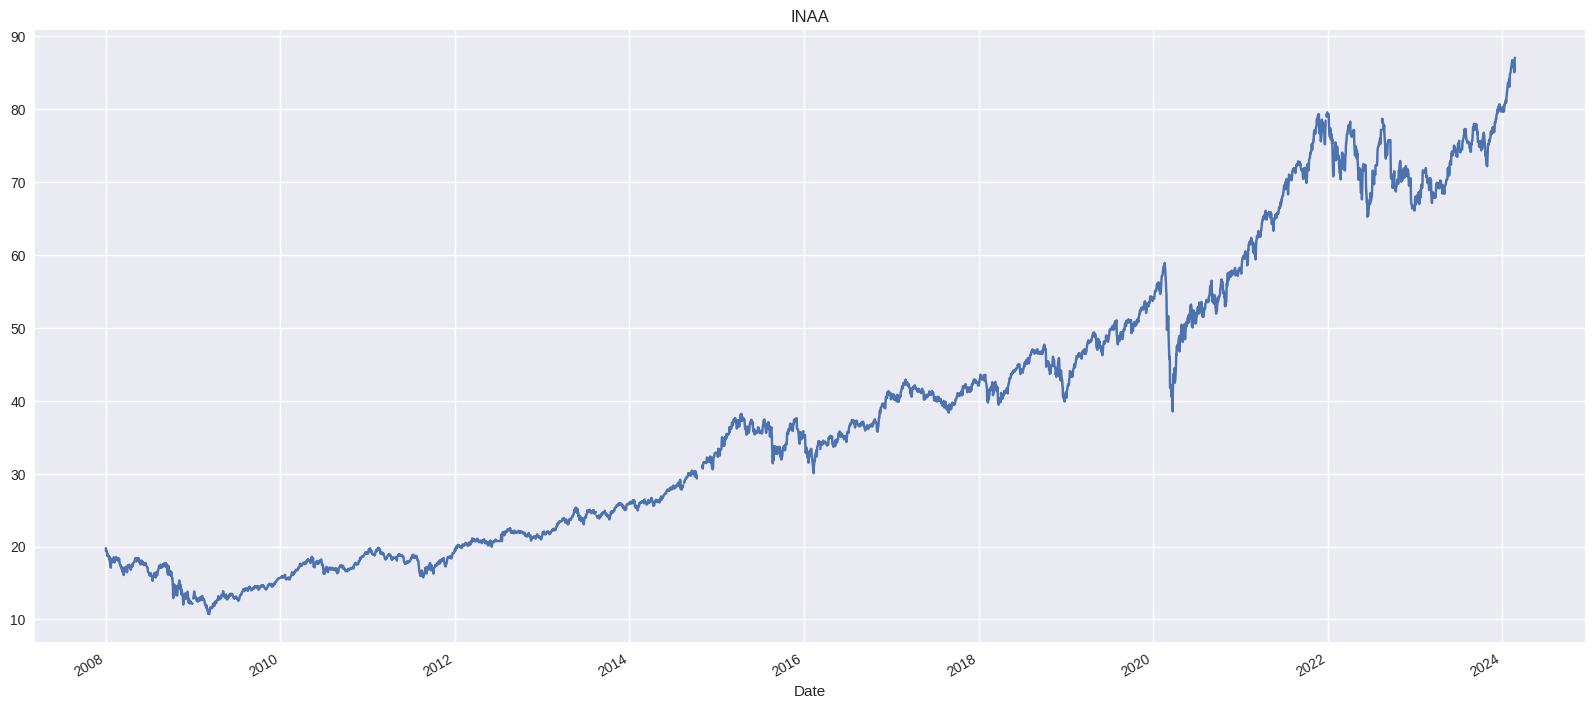

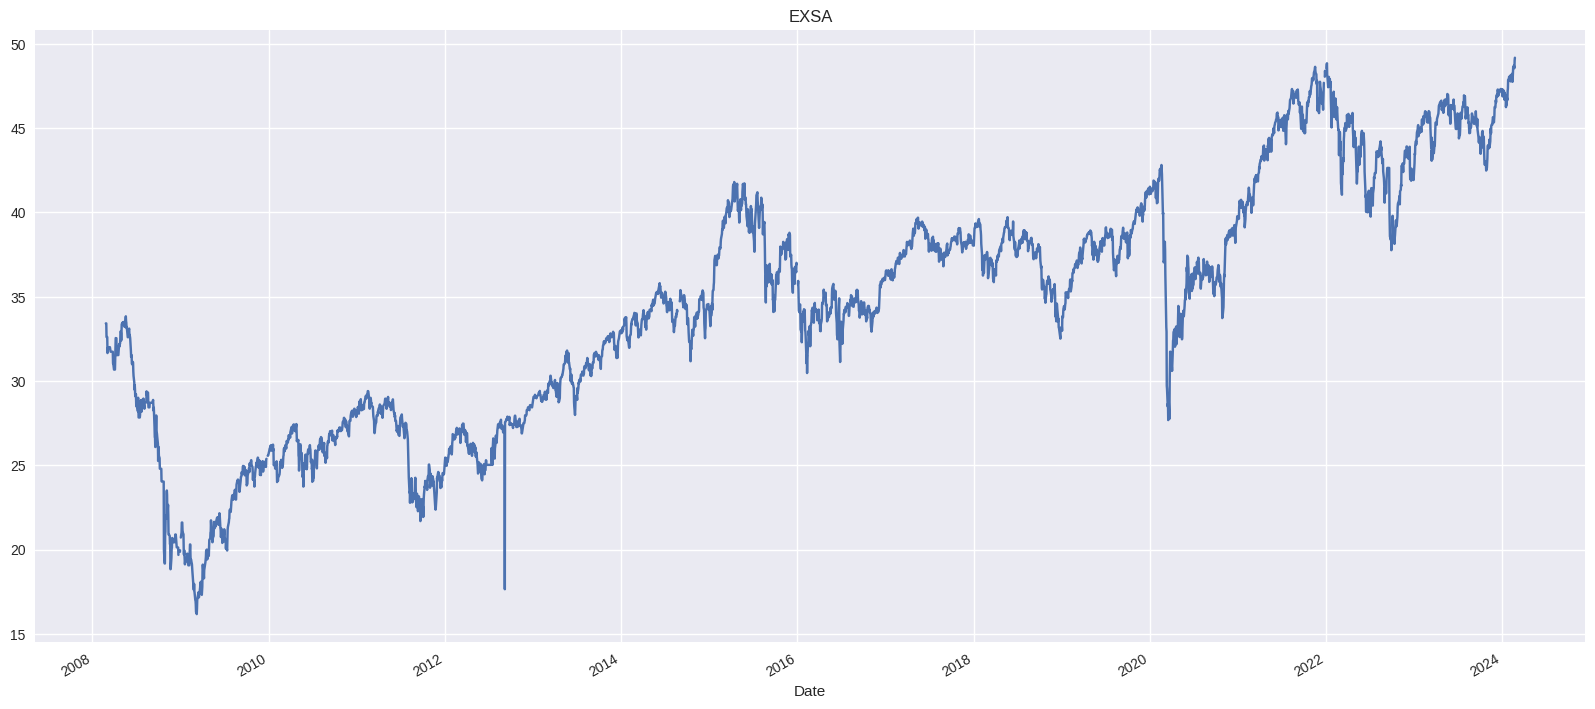

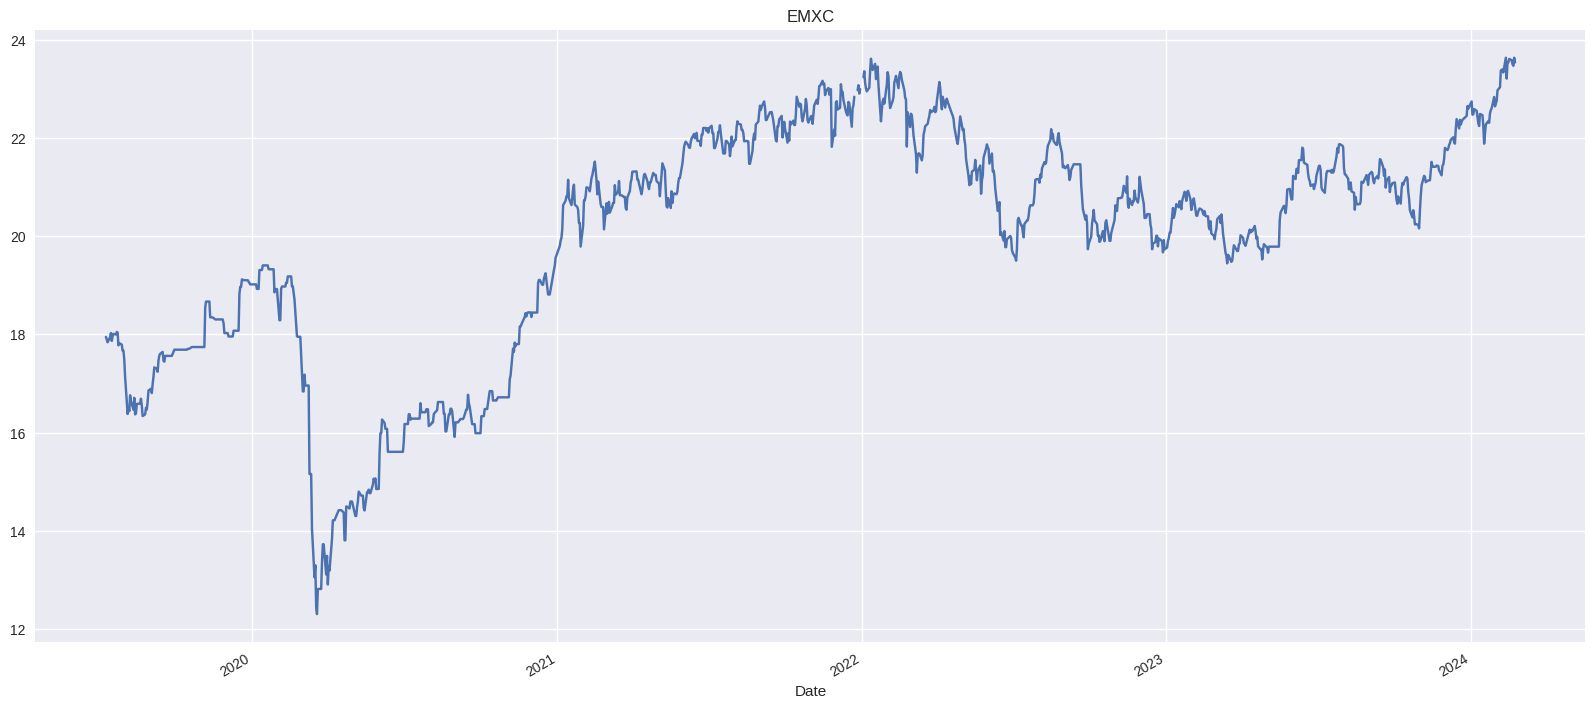

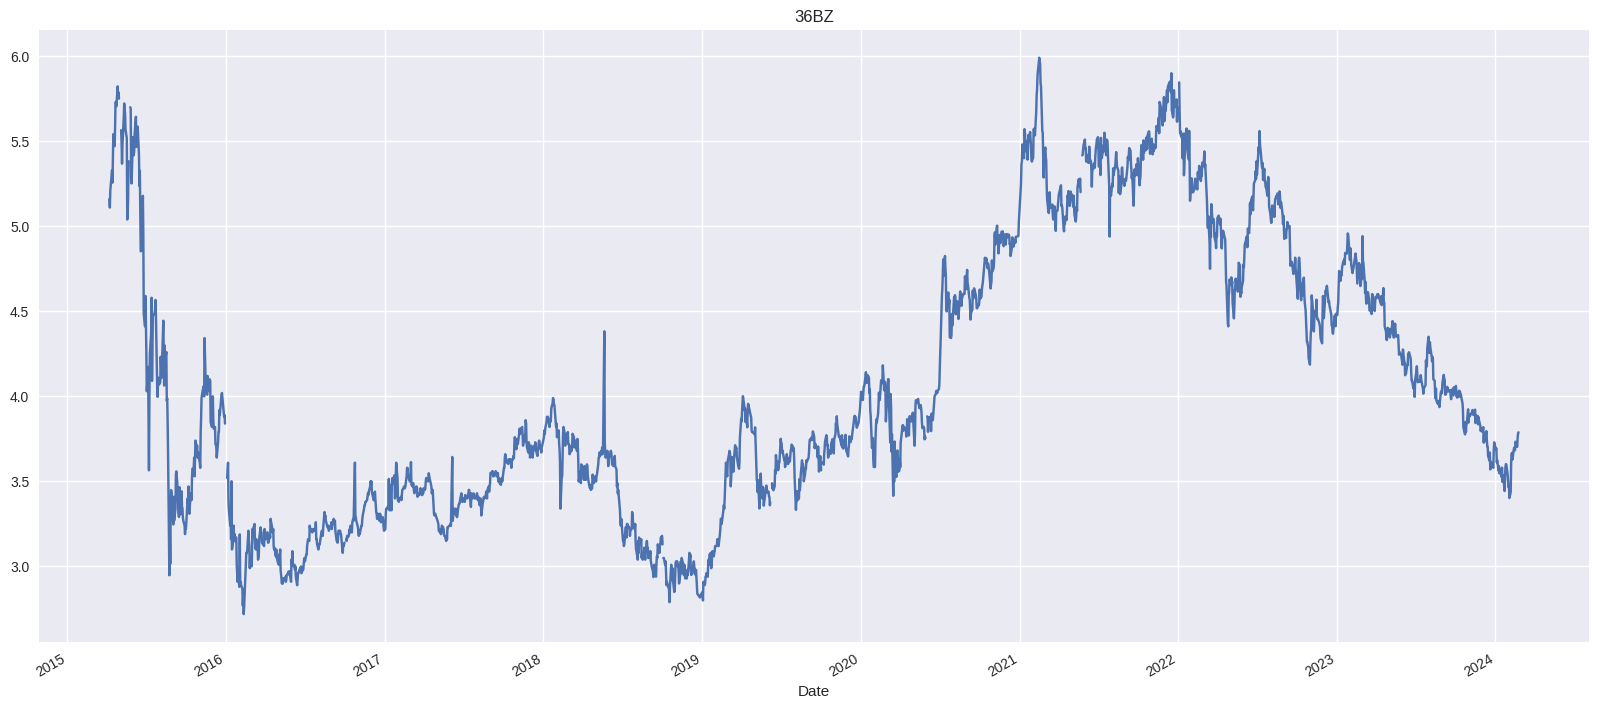

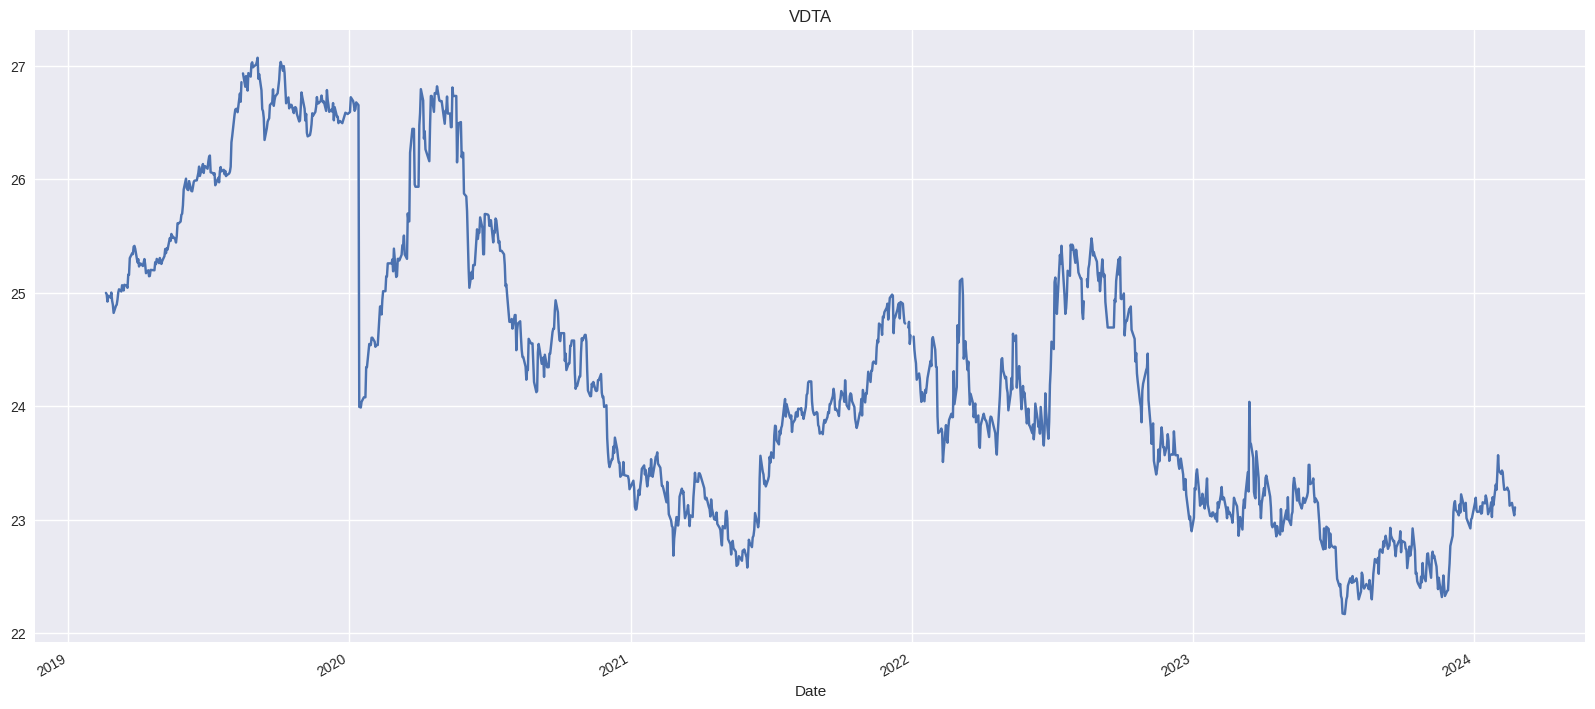

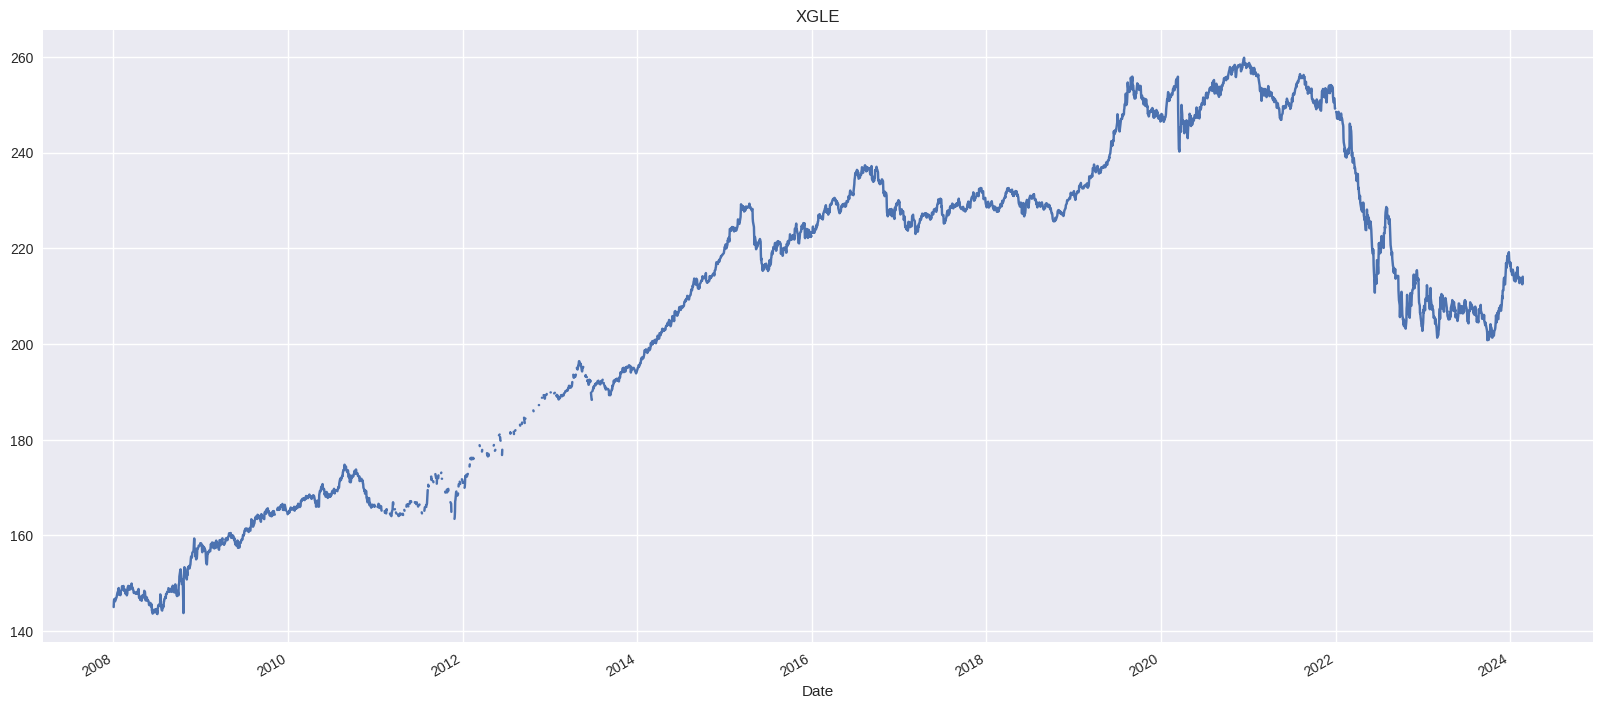

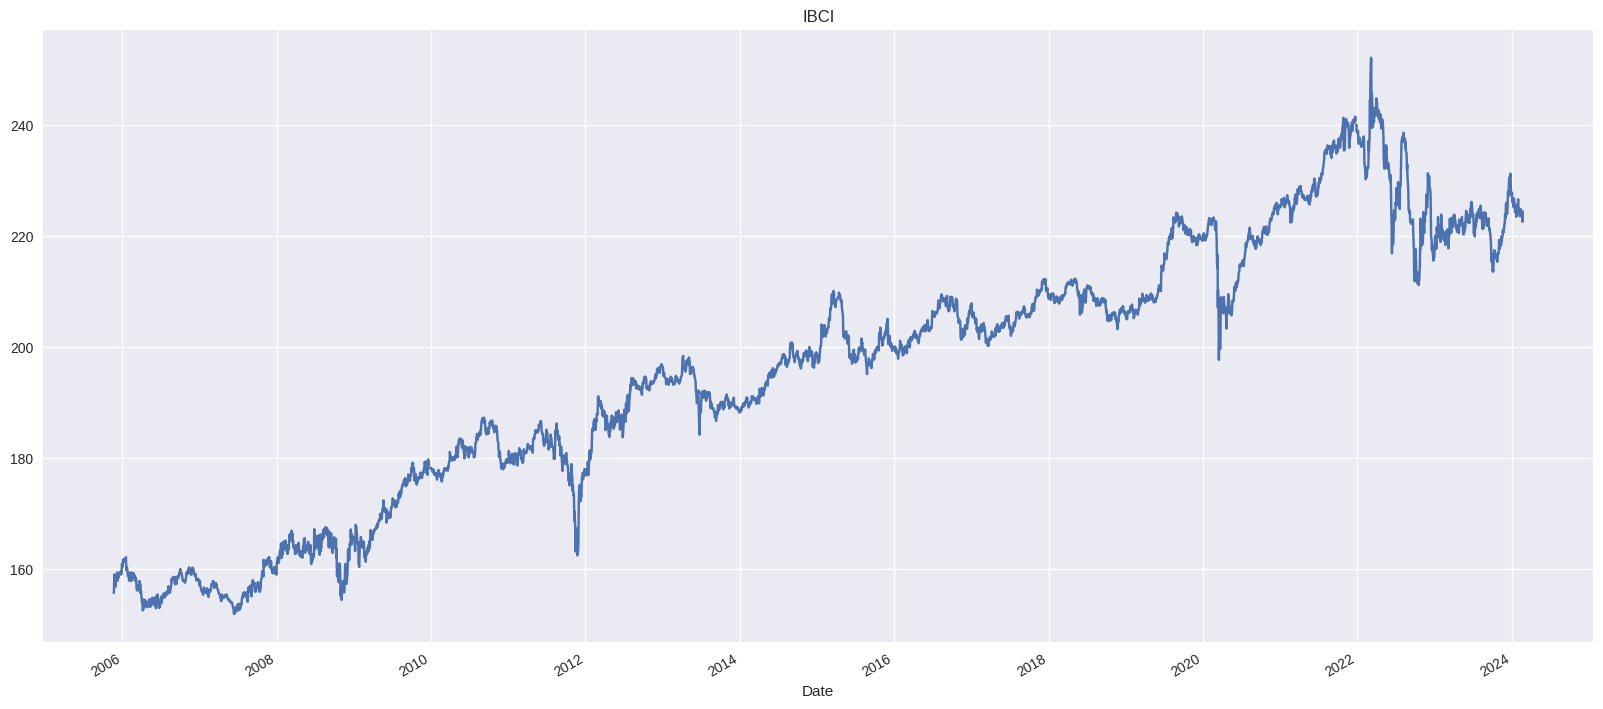

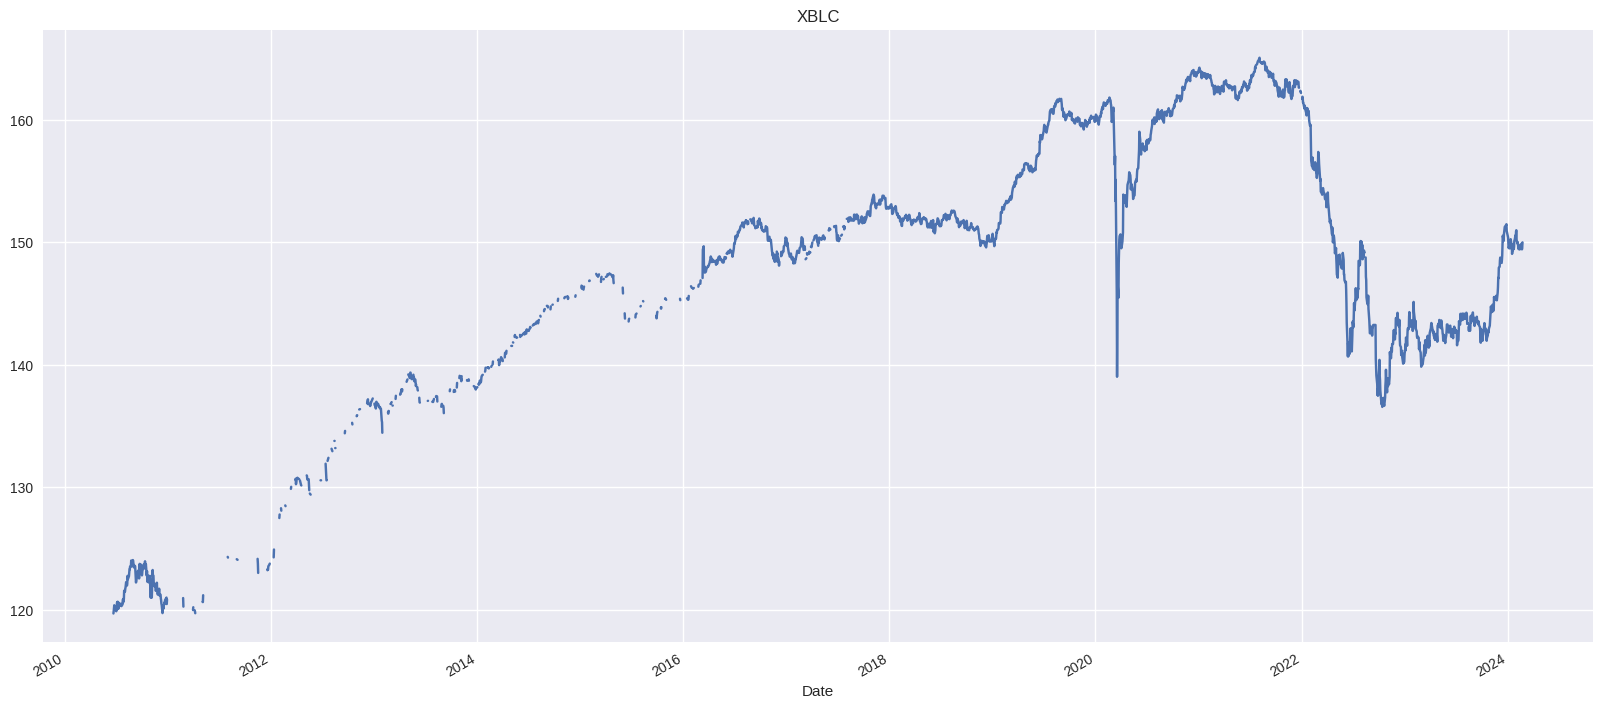

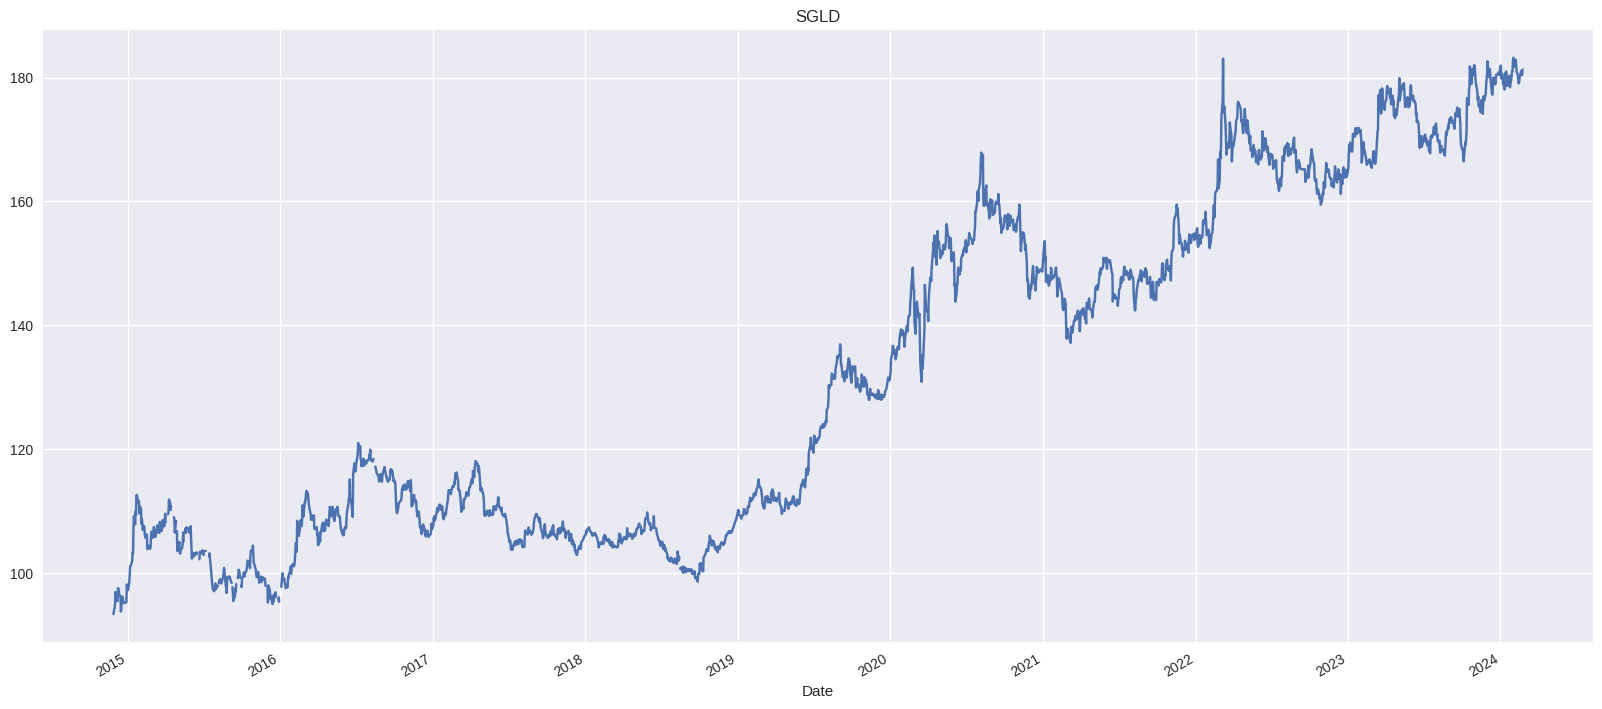

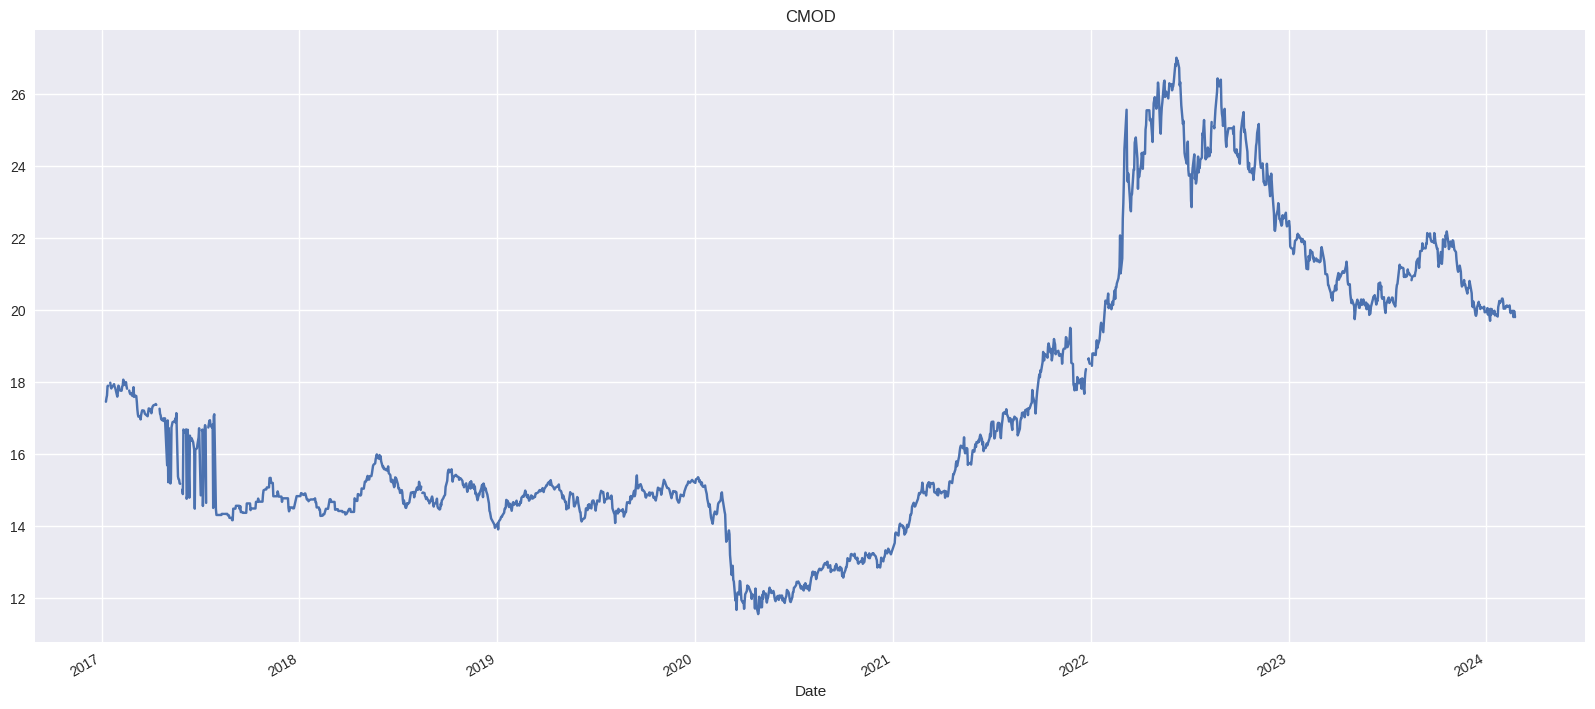

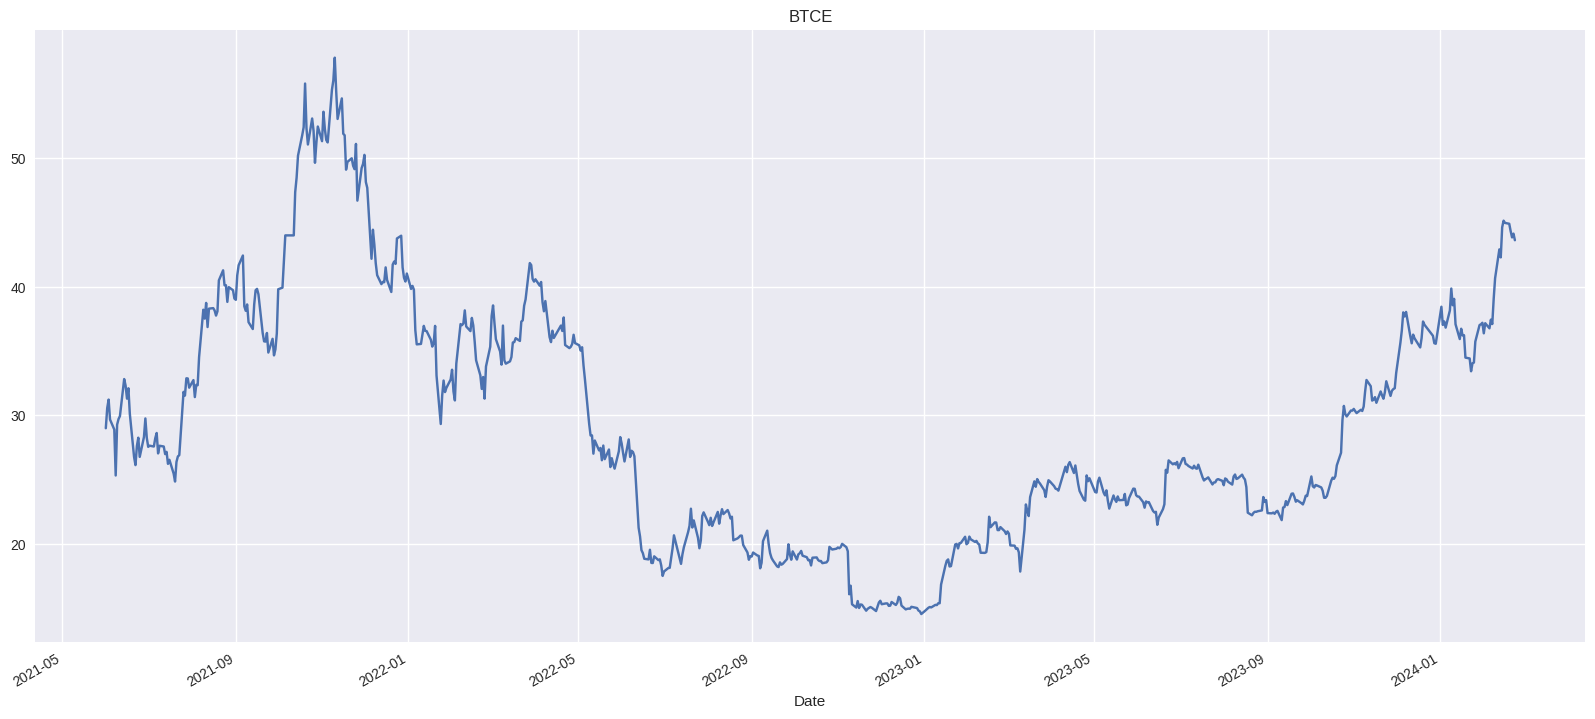

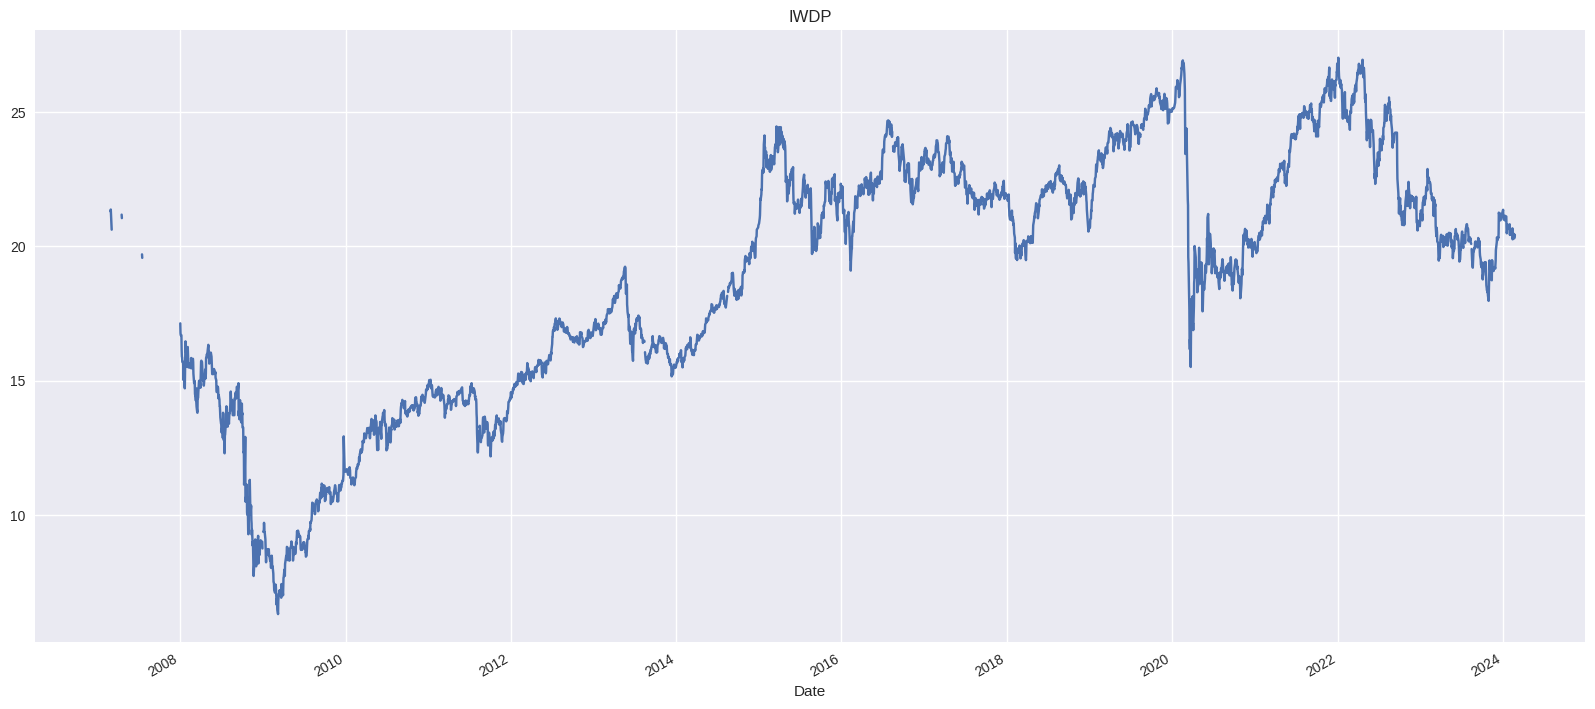

In [ ]:
for c in dati.columns:
  plt.figure()
  plt.title(c)
  dati[c].plot(figsize=(20,9))
  plt.show()

36BZ -> da 6-2018

EXSA -> da 1-2013

CMOD -> da 9-2017



In [ ]:
if "36BZ" in dati.columns:
  dati["36BZ"].loc[:pd.to_datetime("2018-06-01")]=np.nan
if "EXSA" in dati.columns:
  dati["EXSA"].loc[:pd.to_datetime("2013-01-01")]=np.nan
if "CMOD" in dati.columns:
  dati["CMOD"].loc[:pd.to_datetime("2017-09-01")]=np.nan

In [ ]:
# riempio i missing di al massimo una settimana
dati.ffill(limit=5,inplace=True)

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

Ticker
INAA    0.114367
EXSA    0.062291
EMXC    0.076491
36BZ    0.037587
VDTA   -0.011217
XGLE    0.025653
IBCI    0.022736
XBLC    0.017427
SGLD    0.082711
CMOD    0.061386
BTCE    0.368814
IWDP    0.018306
dtype: float64

<Axes: xlabel='Ticker', ylabel='Ticker'>

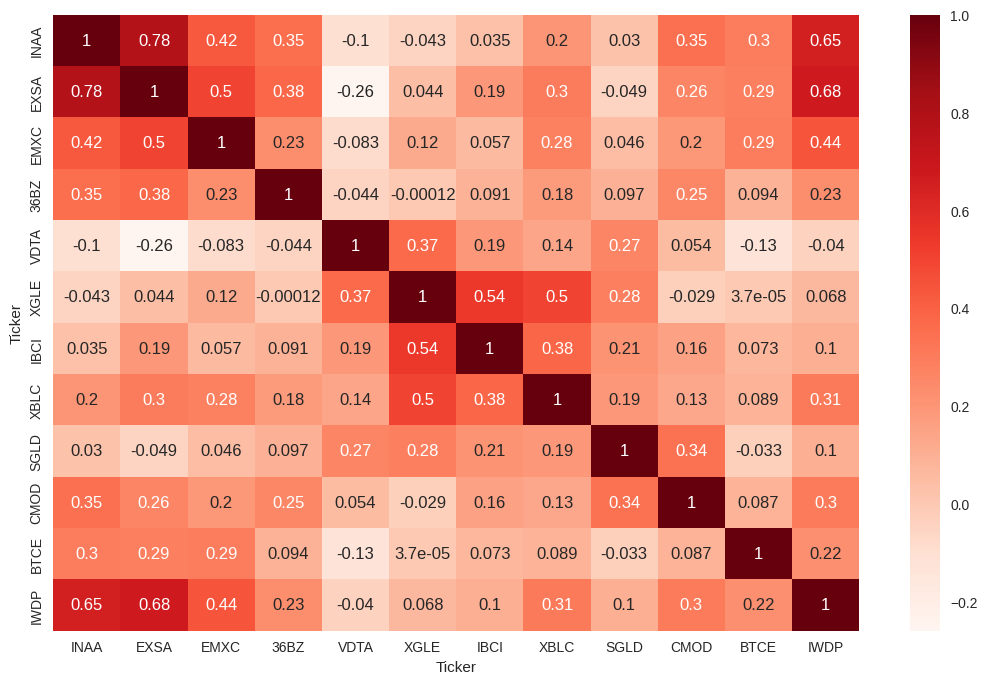

In [ ]:
plt.figure(figsize=(13,8))
#seaborn.set(font_scale=1.2)
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
# se io volessi analizzare tutti i portafogli equally weighted di N etf, quanti casi dovrei analizzare?
x=np.math.factorial(len(dati.columns))
for i in range(2,len(dati.columns)):
  print(i,x/np.math.factorial(len(dati.columns)-i))

2 132.0
3 1320.0
4 11880.0
5 95040.0
6 665280.0
7 3991680.0
8 19958400.0
9 79833600.0
10 239500800.0
11 479001600.0


<ipython-input-75-db9c0b8d2220>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x=np.math.factorial(len(dati.columns))
<ipython-input-75-db9c0b8d2220>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(i,x/np.math.factorial(len(dati.columns)-i))


In [ ]:
quante=10000
cov = rendimenti.cov()*100*253
medie = ((rendimenti.mean()+1)**253-1)*100
tabella = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
tabella1 = pd.DataFrame(columns=["rendimento","varianza","quasi Sharpe"]+nomi)
for k in range(len(dati.columns)):
  w = np.zeros(len(dati.columns))
  w[k]=1.00
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella1.loc[k]=[rend,vol,rend/vol]+list(w*100)
for k in range(quante):
#  w = np.random.random(len(dati.columns))
  w=np.random.normal(1,0.2,len(dati.columns))
  w[w>1]=w[w>1]-1
  w = w/sum(w)
  rend = np.dot(medie,w)
  vol = np.dot(w,np.dot(cov,w))
  tabella.loc[k]=[rend,vol,rend/vol]+list(w*100)
  if k%1000==0:
    print(k)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


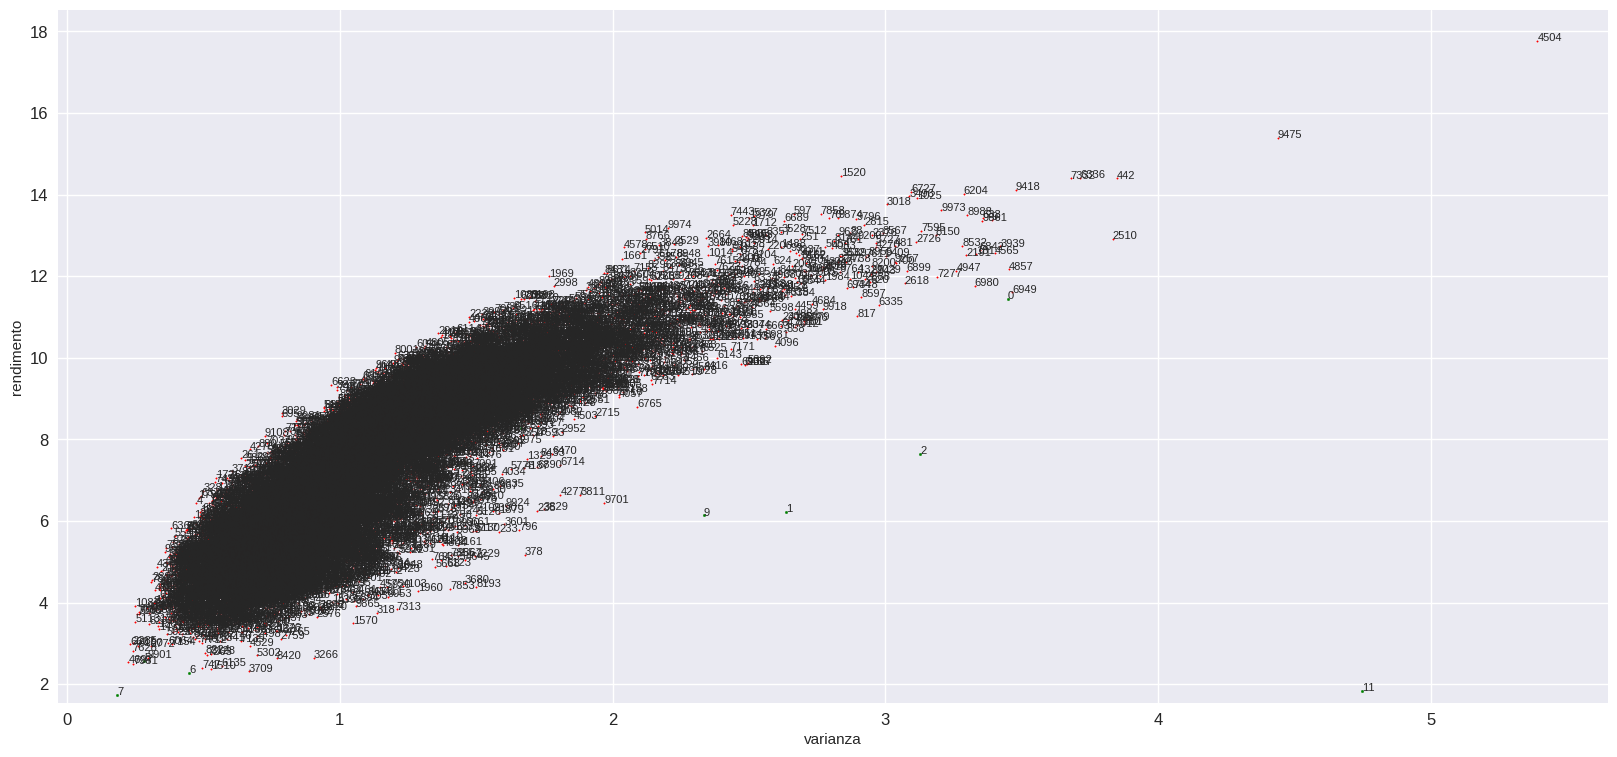

In [ ]:
ax = tabella.plot.scatter(x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=1,color="r")
axes = plt.gca()
x=axes.get_xlim()
y=axes.get_ylim()
tabella1.plot.scatter(ax=ax,x="varianza",y="rendimento", figsize=(20,9),fontsize=12,s=3,color="g",xlim=x,ylim=y)
for i in tabella.index:
    plt.annotate(i,xy=(tabella.loc[i,"varianza"],tabella.loc[i,"rendimento"]),size=8)
for i in tabella1.index:
    plt.annotate(i,xy=(tabella1.loc[i,"varianza"],tabella1.loc[i,"rendimento"]),size=8)

In [ ]:
tabella1

rendimento   varianza  quasi Sharpe  iShares MSCI North America  \
0    11.436716   3.449288      3.315675                       100.0   
1     6.229083   2.634845      2.364117                         0.0   
2     7.649105   3.128401      2.445053                         0.0   
3     3.758715   6.286285      0.597923                         0.0   
4    -1.121682   0.834083     -1.344809                         0.0   
5     2.565337   0.283843      9.037876                         0.0   
6     2.273632   0.447725      5.078184                         0.0   
7     1.742691   0.183987      9.471825                         0.0   
8     8.271085   1.662605      4.974774                         0.0   
9     6.138587   2.333600      2.630523                         0.0   
10   36.881417  33.531365      1.099908                         0.0   
11    1.830626   4.748566      0.385511                         0.0   

    iShares STOXX Europe 600  Lyxor MSCI Emerging Markets Ex China  \
0                        0.0                                   0.0   
1                      100.0                                   0.0   
2                        0.0                                 100.0   
3                        0.0                                   0.0   
4                        0.0                                   0.0   
5                        0.0                                   0.0   
6                        0.0                                   0.0   
7                        0.0                                   0.0   
8                        0.0                                   0.0   
9                        0.0                                   0.0   
10                       0.0                                   0.0   
11                       0.0                                   0.0   

    iShares MSCI China A  Vanguard USD Treasury Bond  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                  100.0                         0.0   
4                    0.0                       100.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   

    Xtrackers Eurozone Government Bond  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
5                                100.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   
9                                  0.0   
10                                 0.0   
11                                 0.0   

    iShares Euro Inflation Linked Government Bond  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
5                                             0.0   
6                                           100.0   
7                                             0.0   
8                                             0.0   
9                                             0.0   
10                                            0.0   
11                                            0.0   

    Xtrackers II EUR Corporate Bond  Invesco Physical Gold  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                

In [ ]:
tabella1["rendimento"].idxmax(),tabella1.loc[tabella1["rendimento"].idxmax()]

(10,
 rendimento                                        36.881417
 varianza                                          33.531365
 quasi Sharpe                                       1.099908
 iShares MSCI North America                         0.000000
 iShares STOXX Europe 600                           0.000000
 Lyxor MSCI Emerging Markets Ex China               0.000000
 iShares MSCI China A                               0.000000
 Vanguard USD Treasury Bond                         0.000000
 Xtrackers Eurozone Government Bond                 0.000000
 iShares Euro Inflation Linked Government Bond      0.000000
 Xtrackers II EUR Corporate Bond                    0.000000
 Invesco Physical Gold                              0.000000
 Invesco Bloomberg Commodity                        0.000000
 ETC Group Physical Bitcoin                       100.000000
 iShares Developed Markets Property Yield           0.000000
 Name: 10, dtype: float64)

In [ ]:
tabella1["varianza"].idxmin(),tabella1.loc[tabella1["varianza"].idxmin()]

(7,
 rendimento                                         1.742691
 varianza                                           0.183987
 quasi Sharpe                                       9.471825
 iShares MSCI North America                         0.000000
 iShares STOXX Europe 600                           0.000000
 Lyxor MSCI Emerging Markets Ex China               0.000000
 iShares MSCI China A                               0.000000
 Vanguard USD Treasury Bond                         0.000000
 Xtrackers Eurozone Government Bond                 0.000000
 iShares Euro Inflation Linked Government Bond      0.000000
 Xtrackers II EUR Corporate Bond                  100.000000
 Invesco Physical Gold                              0.000000
 Invesco Bloomberg Commodity                        0.000000
 ETC Group Physical Bitcoin                         0.000000
 iShares Developed Markets Property Yield           0.000000
 Name: 7, dtype: float64)

In [ ]:
tabella1["quasi Sharpe"].idxmax(),tabella1.loc[tabella1["quasi Sharpe"].idxmax()]

(7,
 rendimento                                         1.742691
 varianza                                           0.183987
 quasi Sharpe                                       9.471825
 iShares MSCI North America                         0.000000
 iShares STOXX Europe 600                           0.000000
 Lyxor MSCI Emerging Markets Ex China               0.000000
 iShares MSCI China A                               0.000000
 Vanguard USD Treasury Bond                         0.000000
 Xtrackers Eurozone Government Bond                 0.000000
 iShares Euro Inflation Linked Government Bond      0.000000
 Xtrackers II EUR Corporate Bond                  100.000000
 Invesco Physical Gold                              0.000000
 Invesco Bloomberg Commodity                        0.000000
 ETC Group Physical Bitcoin                         0.000000
 iShares Developed Markets Property Yield           0.000000
 Name: 7, dtype: float64)

# Cose che non servono vanno qui sotto